In [58]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [59]:
!pip install spacy

Defaulting to user installation because normal site-packages is not writeable


In [60]:
!pip install textract

Defaulting to user installation because normal site-packages is not writeable


In [61]:
!python -m spacy download en_core_web_md

Defaulting to user installation because normal site-packages is not writeable
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_md-3.6.0/en_core_web_md-3.6.0-py3-none-any.whl (42.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [62]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [63]:
import os
import re
import nltk
import spacy
import string
import textract
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import seaborn as sns

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords
import re
from nltk import word_tokenize
#nlp=spacy.load('en_core_web_sm')
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sanjy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanjy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sanjy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sanjy\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [64]:
df=pd.read_csv('D:\exclerintsp2\Resume_clf\Resume (1).csv')
df

,Raw,Category
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft
1,Classification: Internal\n\nClassification: In...,PeopleSoft
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft
4,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft
5,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft
6,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft
7,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft
8,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft
9,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft


In [65]:
df.isnull().sum()

Raw         0
Category    0
dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Raw       52 non-null     object
 1   Category  52 non-null     object
dtypes: object(2)
memory usage: 960.0+ bytes


In [67]:
df.shape

(52, 2)

In [68]:
tokens =df.Raw.map(word_tokenize)

In [69]:
df=[x.strip() for x in df.Raw] #strip() removing trailing and leading
df=[x for x in df if x] #remove empty strings coz there are considereed as false
df[0:52]



['Anubhav Kumar Singh\t\t\n\n\n\nCore Competencies:\n\n\n\nScripting\t\t: Shell Scripting\n\n\n\nApplication\t\t: PeopleSoft HCM, FINANCIALS\n\n\n\nOperating System\t: Linux ,Windows\n\n\n\nWeb/App Servers\t: Weblogic, Tuxedo\n\n\n\nRDBMS\t\t: Oracle\n\n\n\nRepository \t\t: Github\n\n\n\nCore Competencies:\n\n\n\nScripting\t\t: Shell Scripting\n\n\n\nApplication\t\t: PeopleSoft HCM, FINANCIALS\n\n\n\nOperating System\t: Linux ,Windows\n\n\n\nWeb/App Servers\t: Weblogic, Tuxedo\n\n\n\nRDBMS\t\t: Oracle\n\n\n\nRepository \t\t: Github\n\n\n\n  To work in a globally competitive environment on \n\n  challenging assignments that shall yield the \n\n  twin benefits of the job satisfaction and a steady-paced \n\n  professional growth.\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n \n\n\n\n\n\n Professional Experience\n\n\n\n 06/2019 - Current\tHCL\t\t\t\t\t\t\t\t\t\t\n\n\t\t\tCurrent Role: System Admin Offshore\n\n\t\t\tSkills : Shell Scripting, Linux , PeopleSoft Administration , Github\n\n\n\nMana

In [70]:
df1=' '.join(df)
df1

'Anubhav Kumar Singh\t\t\n\n\n\nCore Competencies:\n\n\n\nScripting\t\t: Shell Scripting\n\n\n\nApplication\t\t: PeopleSoft HCM, FINANCIALS\n\n\n\nOperating System\t: Linux ,Windows\n\n\n\nWeb/App Servers\t: Weblogic, Tuxedo\n\n\n\nRDBMS\t\t: Oracle\n\n\n\nRepository \t\t: Github\n\n\n\nCore Competencies:\n\n\n\nScripting\t\t: Shell Scripting\n\n\n\nApplication\t\t: PeopleSoft HCM, FINANCIALS\n\n\n\nOperating System\t: Linux ,Windows\n\n\n\nWeb/App Servers\t: Weblogic, Tuxedo\n\n\n\nRDBMS\t\t: Oracle\n\n\n\nRepository \t\t: Github\n\n\n\n  To work in a globally competitive environment on \n\n  challenging assignments that shall yield the \n\n  twin benefits of the job satisfaction and a steady-paced \n\n  professional growth.\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n \n\n\n\n\n\n Professional Experience\n\n\n\n 06/2019 - Current\tHCL\t\t\t\t\t\t\t\t\t\t\n\n\t\t\tCurrent Role: System Admin Offshore\n\n\t\t\tSkills : Shell Scripting, Linux , PeopleSoft Administration , Github\n\n\n\nManag

In [71]:
para='''Raw	Category
"Anubhav Kumar Singh



Core Competencies:



Scripting		: Shell Scripting



Application		: PeopleSoft HCM, FINANCIALS



Operating System	: Linux ,Windows



Web/App Servers	: Weblogic, Tuxedo



RDBMS		: Oracle



Repository 		: Github



Core Competencies:



Scripting		: Shell Scripting



Application		: PeopleSoft HCM, FINANCIALS



Operating System	: Linux ,Windows



Web/App Servers	: Weblogic, Tuxedo



RDBMS		: Oracle



Repository 		: Github



  To work in a globally competitive environment on

  challenging assignments that shall yield the

  twin benefits of the job satisfaction and a steady-paced

  professional growth.

























 Professional Experience



 06/2019 - Current	HCL

			Current Role: System Admin Offshore

			Skills : Shell Scripting, Linux , PeopleSoft Administration , Github



Managing PeopleSoft HCM and PeopleSoft FSCM production environments along with support environments installed on Linux and Windows OS.

Involved in Day to Day activities such as Project Migration, Database Refresh, System admin changes, Tax updates etc.

Troubleshooting of various servers like application servers, Web Servers, Process Scheduler Servers.

Applying Tuxedo and WebLogic Middleware CPU patches for various applications.

Working on shell scripting used as integration method for exchange of files to external systems

Installation and troubleshooting of 2-tier setup as per requirement.

Reviewing Vulnerabilities reported by Security Teams.

Renewal of SSL in Weblogic.

Vulnerability remediation whenever a vulnerability is report by RMIS team.

Worked on PUM (PeopleSoft Update Manager) and installation through DPK.

Working Knowledge of Ansible and Docker.

Developing new Shell scripts and troubleshooting Shell Script failures.





 07/2017- 06/2019	TechMahindra

			Role/Project: Application Support through Automation/Devops Tools and PeopleSoft Admin

			Skills : Shell Scripting, Linux , PeopleSoft Administration, Jenkins, Ansible



			Project 1: People Tools 8.55 Upgrade & HCM 9.2 Application Upgrade

			Project 2: Migration of Applications from NTT Cloud and On-premises to AWS Cloud



Worked on shell scripting for various application requirement.

Working on Ansible and Jenkins to automated start/stop and various activities of application.

Basic knowledge of Docker.

Applying SSL certificates on new released applications.

Worked on Elastic Search Configuration in PeopleSoft.

Gained knowledge in AWS Resources..

Strong understanding of Unix architecture/Command and trouble shooting in Unix/Linux platform.

Efficient in using Configuration Management & Deployment Tool like Ansible.

Good experience in job scheduling via crontab and IBM Tivoli Workload Scheduler (TWS).

Having good knowledge in automation using shell scripting

Continuous integration management using Jenkins, installing and configuring Jenkins.

Responsible for writing Ansible playbook to perform various task

Managed administration tasks installation, configuration, applications, troubleshooting, and performance related issue.

Applying Tuxedo and WebLogic CPU patches for various applications.

Working on Vulnerabilities reported by Security Teams.

Reviewing the platform certification information of products, platforms, database servers, web and application servers, browsers, and other products for PeopleTools 8.55.

Server Migration to AWS (Amazon Web Service).

Installation of PeopleSoft server components Application Servers, Process Scheduler Servers, Tuxedo, Web logic Servers for New release PeopleTools on Unix/Linux Servers.

Applying latest patch to PeopleTools.

Installing and configuring Change assistant for various upgrade passes.

Creating and running PeopleTools Upgrade Job for PeopleTools 8.55 Upgrade.

Setting up Performance monitor.

Creating new app, web and process scheduler domains post upgrade on new Linux severs.

Troubleshooting common Domain boot problems.

Identifying and configuring source and target databases in CA for HCM 9.2 application upgrade.

Working with HCM PUM Images.

Creating Change packages using PUM and applying to Source/Target databases as per requirement.

Creating application upgrade job using change assistant.





 09/2015 - 07/2017	SRDT Pvt Ltd. (SRM GROUP)

			Role/Project: PeopleSoft application and Database Admin

			Skills : PeopleSoft Administration, Weblogic, Tuxedo, App designer, PUM, PeopleTools 					Upgrade, PeopleSoft Campus Application Upgrade.



Maintaining 7 Production Environments with 21 supporting environments installed on Windows server 2008 R2 and Oracle 11g.

Possess through knowledge and experience in PeopleSoft architecture, administering PeopleSoft server components Application Servers, Process Scheduler Servers, Tuxedo, Web logic Servers, PIA (PeopleSoft Internet Architecture), Integration Broker, Report Nodes, application issues and technical issues.

PeopleSoft Skills with experience in Migrations & Production support of PS Applications

Exposure in applying PeopleSoft Bundle Updates through Change Assistant.

Exposure in working on both Windows & UNIX/Linux Environments with Oracle database.

Working knowledge of integration broker.

Refreshed Testing, DEV and Pre-PROD from PROD environments.

Experience in Troubleshooting of various servers like application servers, Web Servers, Process Scheduler Servers.

Experienced in providing 24/7 support on production and development environments.

Installation of Database Servers, Web servers and Application Server and PeopleSoft Application (HRMS 9.2,FSCM9.2, CS9.0, CS 9.2,HRMS 9.2) and People Tool (8.53,8.54, 8.55)

Installed and Configured SES (Secure Enterprise Search) for HRMS Instance.

Experience in Installing Oracle Policy Automation, Oracle Policy Modelling and creating OPA Database in existing database (Oracle)

Implemented Single Sign On between PeopleSoft Applications.

Implemented PeopleSoft Interaction Hub to integrate external content and information with PeopleSoft applications.

Upgraded People Tool 8.53 to 8.54 for Campus 9.0Production Environment.

Upgraded People Tool 8.53 to 8.55 for Finance 9.2 Testing Environment.

Upgraded application CS 9.0 to 9.2.

Configured PUM (PeopleSoft Update Manager) for every new Image.

Applying Tax Updates, BUGS and Tailored Change Packages through PUM.

Upgraded Oracle Database 11.2.0.1 to 11.2.0.4 using DBUA.

Created Instances on People Tools 8.55 to provide Testing environments.

Prepared Upgrade Status reports and sheets.

Co-ordinated and provided support for offshore projects.

Imported Self Signed Certificate into WebLogic to provide secure port access of Instances.

Set up of Terminal Server to provide a Central access of People Tools for Technical/Developers.

Created tickets to development team and followed up with them to get the resolution for any error occurred.





			Projects:



		Client: DRDO

		Project: Single Sign On

		Role: PeopleSoft Admin

		Environment: People Tool 8.50, HRMS 9.1, FSCM 9.1



		Description:

		Single sign-on (SSO) is a property of access control of multiple related, but independent software 			systems. With this property a user logs in with a single ID and password to gain access to a 			connected system or systems without using different usernames or passwords.





		Client: NetApp

		Project: Support and Maintenance

		Role: PeopleSoft Admin/L2 Support

		Environment: PeopleTool 8.49, HRMS 8.9



		Description:

		Handled IB related issue.

		Clear process scheduler cache as per weekly maintenance process.

		Handled PSADMIN related activities.





 11/2013 - 05/2015	ACS



 Personal Details





Father’s name

Rajeev Kumar Singh

Date of Birth

11/09/1990

Sex

Male

Language (Read And Write)

Hindi, English

Ready to relocate

Yes

Education

B.Tech in Electrical & Electronic Engineering 2012"	PeopleSoft
"Classification: Internal

Classification: Internal



		Murali



		Experience Summary



I have 6 years of experience working in PeopleSoft Administration and performing various infrastructure related activities in PeopleSoft environments.



Installed and configured PeopleSoft 9.0,9.1,9.2 Web server, Application server, Database server and Process scheduler

server on Windows, UNIX and Linux platforms.

Creating Domains for Web server, Application server and Process scheduler server.

Applied Patches Manually and applied Maintenance Packs through Change Assistant tool.

Experience in DPKs installations.

Applying TAX UPDATES and fixes using PUM

Migrating projects from one environment to another environment using Application Designer and also through CAPI, STAT tools.

Performed Single sign on (SSO)Implementation.

Experience in running Compare Reports between pre and Post Migrations.

Experience in setting up Client Workstation for Developers and Testers.

Involved in Configuration of Integration Broker setting up Between the Modules for sending the Messages.

Involved 24/7 production Support to Client.

Involved in Running Audit Reports (DDDAUDIT AND SYSAUDIT) for Integrity Checks.

Experience in Configuration and Setup the REN server.

Configured and Maintained Report Nodes settings.

Checked and Clear Cache for the servers.

Involved in Troubleshooting of the servers like Application server, web server and Process scheduler server.

Worked on Peopletools Upgrade PT8.52 to PT8.55 and 8.55 to 8.57.

Installing and configuring Elastic Search 6.1.2



		Career Profile:

	Dates

Organization

Role

	22nd  Mar 2021 – 25th May 2021

L N T INFOTECH

PeopleSoft Administrator



		Client :Sembcorp , Brazil



Description:

This project involved active production support in the fields of HRMS 9.2. Additionally also involved in maintenance and enhancement of the system.



Responsibility:





 Installation and setup of People Soft HCM & ELM 9.2 on Oracle.

 Creating database user, assigning roles & privileges to the users.

 Maintaining various People Soft instances.

 Debugging and resolving issues related to application server\web server\process    scheduler.

 Weekly\monthly database maintains.

Performed People tools upgrade from 8.55.14 to 8.57.05.

Performing Post refresh Activities.



	Dates

Organization

Role

	9th Nov 2018 –  19TH Mar 2021

Regency Technologies

PeopleSoft Administrator





		Client :Wipro, IND

Platforms : People Tools 8.56, People Soft HCM 9.2.



Description:

This project involved active production support in the fields of HRMS 9.2. Additionally also involved in maintenance and enhancement of the system.



Responsibility:

 Installation and setup of People Soft HCM 9.2 on Oracle.

 Creating database user, assigning roles & privileges to the users.

 Maintaining various People Soft instances.

 Debugging and resolving issues related to application server\web server\process    scheduler.

 Weekly\monthly database maintains.

 Creating and modifying data mover scripts.

 Migrating projects using CAPI.

 Applying Patches.

 Setting up a PeopleSoft Reporting environment for reporting.

 Interacting with the client for various Production related issues.

Applying TAX UPDATES using PUM.

Performing Post refresh Activities.





	Dates

Organization

Role

	9th  Nov 2015 –  30th Nov 2017

DXC Technologies (Formerly known as CSC)

PeopleSoft Administrator





 Project Title :People Soft HCM Production Support and Enhancement

Client : ASG, USA

Platforms : People Tools 8.52,8.54 People Soft HCM 9.0,9.2 DB2

AIX 5.1.



Description:

This project involved active production support in the fields of HRMS 9.0. Additionally also involved in maintenance and enhancement of the system.



Responsibility:



 Installation and setup of People Soft HCM 9.0,9.1 on DB2.

 Creating database user, assigning roles & privileges to the users.

 Maintaining various People Soft instances.

 Debugging and resolving issues related to application server\web server\process    scheduler.

 Weekly\monthly database maintains.

 Creating and modifying data mover scripts.

Migrating projects using STAT,CAPI.

 Applying Patches.

 Setting up a PeopleSoft Reporting environment for reporting.

 Interacting with the client for various Production related issues.

Applying TAX UPDATES using PUM.

Performing Post refresh Activities.











		Technology

Operating Systems

 All Windows Platforms, Linux

ERP and Tools

PeopleSoft HRMS 9.0, PeopleTools 8.47,8.48, 8.50, 8.52, Putty, sql, TOAD, Beyond Compare.



RDBMS

Oracle 10g,11g

Scheduling Tool

Autosys

Version Control Tool

CAPI , STAT

Languages

C, C++, SQL














		Personal Details



											Date of Birth

											15-08-1982

											Nationality

											Indian













Date:



Place:  Hyderabad"	PeopleSoft
"SIRAZUDDIN M

	Bangalore, INDIA





SIRAZUDDIN M

	Bangalore, INDIA





























PROFILE SUMMARY



I have overall 6.8 years’ experience as PeopleSoft Administrator. Installed PeopleTools 8.55 from the scratch including its products.

Experience in Peopletools 8.51, 8.54.08, 8.55.07&Application 9.0 and 9.2 (HRMS/FSCM). Deterministic approach towards problem solving & troubleshooting.

Proficient in Integration Broker.

Upgraded FSCM and HCM applications to PeopleTools 8.55.07 from PeopleTools 8.54.08.



EDUCATION



Graduated B-Tech in Electronics and Communication Engg. from M.V.G.R College of Engineering, Vizianagaram(JNTUK) with an aggregate of 68.93%.

Achieved 90% marks in 12th standard. Scored 86% in 10th standard.



ACHIEVEMENTS

Awarded Bravo in 2015 Q3, 2016 Q1 and Pat on Back in Q2, 2016, Q1, 2017 in Techahindra.

Awarded Associate of the month award and Innovator of the month (1 time). Awarded spot and pat on back in Capgemini



WORK EXPERIENCE

CAPGEMINI (MAY’19 – TILL NOW)

Production support for 5 finance environment and their respective non production environments.



Project Experience:

Project Name 				: AXA

Role					: Consultant

Environment				: Windows Server 2012 R2



COGNIZANT TECHNOL OGY SOL UT IONS (AUGUS T ' 1 8 – APRIL’19)

Voya Financial Insurance US client project which deals with support and managing Finance applications.



Project Experience:

Project Name 				: Voya Financials

Role					: Associate

Environment				: Windows Server 2012 R2



 TECH MAHINDRA LIMIT ED (JULY ' 1 4 - AUGUS T ' 18)



PeopleSoft 9.2 Implemented for HR and FIN application. PeopleSoft 9.2 Implementation project includes 10 PeopleSoft applications, interfaces with third-party applications and interfaces with live production PeopleSoft 9.2 environment in SDLC.



Project Experience: Project Name

Role Environment




: CIO COMMON

: Software Engineer

: SOLARIS, Windows Server 2008R2





RESPONSIBILITIES:

Provided administrative supports for PEOPLESOFT tools version 8.51, 8.54, 8.55.25, 8.56.10 and application HRMS 9.0, 9.2 & Financials/SCM 9.0, 9.2 modules on Windows and UNIX OS

Creation of indexes for tables from application designer.

PeopleSoft Database Setup, troubleshooting issues and other daily PeopleSoft admin activities

Configured PeopleSoft application server, process scheduler & web server domains, setup Master Scheduler.

Installing Oracle Tuxedo, Weblogic, Java, Application Disk (FSCM and HCM) and Oracle database on UNIX and Windows servers from scratch

Installed PeopleTools 8.55 for HCM and FSCM with a demo database. Upgraded FSCM application to Peopletools 8.55 from PeopleTools 8.54.08. Applied patch 8.55.07 in FSCM

Configured Report Nodes. Bouncing of App, Web and Process schedulers and clearing cache

Performed pre-refresh and post refresh activity during Database cloning activity.

Recompilation of COBOL source codes

Worked on project migrations using Application Designer and Change Assistant.

Applied image 15, 16, 25 and 37 on FSCM 9.2 using PUM and change assistant. Good hands-on experience in application designer, data mover, and change assistant. Well aware of PIA (PeopleSoft Internet Architecture).



Configuring Integration broker and report nodes

Creating UDM file transfer Interfaces and monitoring them

Deploying gnupg keys and certificates in servers.

Installed and configured Elastic search.

TOOLS USED:

PeopleTools 8.54.08, 8.56.10, 8.55.25, Application Designer, Data Mover

Toad, Sqldeveloper, Microsoft SQL Management Studio 2014

Oracle 11g, Oracle 12c, Microsoft SQL server 2014

Filezilla, Winscp, PCOMM, TWS, Service now, Silva



TRAINING & CERTIFICATIONS

Oracle Cloud Infrastructure Architect Associate

Oracle Cloud Infrastructure Architect Professional"	PeopleSoft
"PeopleSoft Admin

VARKALA VIKAS



Career Objective:



I have total 4.2 Years’ Experience in PeopleSoft Admin and PeopleSoft DBA. I hope to enhance my skill set while adding value to the business, to enable implementation of solutions, which aid the company’s objectives, understanding and anticipating the needs, interests and motivations of the clients and to deliver on time, budget and to quality, delivering value through improving agility, quality and reliability



Professional Summary:



	Having 4.2 years of experience in PeopleSoft implementation, Support, People Tools Upgrades, configuration, migrations, maintenance and administration of Application Server Domains, Process Scheduler Servers, Web Server Domains, PUM and Elastic search.

	Involved in various Tools and Application Upgrades.

	Experience in driving Infrastructure Hardware Upgrades, Disaster Recovery Activities.

	Configured https and secure web server (SSL) administration.

	Monitor system by developing and maintaining monitoring Shell scripts

	Experience in Oracle Database Administration for 11gR2, 12cR1 and 12cR2

	Experience in Health Check for all the PeopleSoft Environments

	Experience in PeopleSoft Database Refreshes from Production to Development and Testing Environments

	Experience in Performance and Tuning of Application Servers, Web Servers

	Experience in Windows Administration

	Implemented PeopleSoft Internet Architecture (PIA) on Demo, Test, Development and Production instances.

	Extensively involved in resolving Performance issues.

	Experience in PeopleSoft Installations of PeopleTools 8.56,8.57 HCM 9.2, WebLogic 12cr2 Tuxedo 12cR2 and People Books 8.56,8.57 Windows 2012R2

	In depth experience on PeopleSoft Update Manager (PUM) for applying PeopleTools patches, Application Bundles on PeopleTools and HRMS 9.2 and FSCM 9.2 Applications

	In Depth Experience in Integration Broker setup.

	Experience in Secure Socket Layer (SSL) implementation on PeopleSoft.

	Proficiency in creation and configuration and administration of Application Server Domains, Process scheduler Domains, Web Server Domains

	Experience in Reconfiguration of Application Server Domains, Process Scheduler Server Domains and Web Server domains.

	Experience in Project Migrations using Application Designer and Data Migrations using Data Mover

	Experience in generating Pre-compare reports and Post Compare Reports between various environments.



	Experience in setting up client Work Station for developers and testers.

	Experience in resolving developer issues like resetting passwords, locking and unlocking user accounts.

	Maintain the workflow of PeopleSoft users.

	Worked on applying Patches, Bundles and Tax Updates using Change Assistant and

PeopleSoft Update Manager (PUM)

	Installing and Configuring Change Assistant to apply bundles and tax-updates.

	Involved in setup configuration of Integration Broker in Financials and HCM Applications.

	Maintaining integrity and internal consistency of the database using DDDAUDIT, SYSAUDIT, ALTERAUDIT reports periodically.

	Experience on clearing the cache of all servers such as Application Server Domains, Web Server Domains and Process Scheduler servers on a regular basis.

	Monitor the log files to find out bottleneck of the status of servers

	Maintaining and troubleshooting various servers like Application Server domains, Process Scheduler Domains and Web Server Domains

	Regularly involved in doing Database Cloning and Refreshing on PeopleSoft Instances.

	Experience in Installing COBOL Software and compilation.

	Experience in Tuning of Application Server Domains, Process Scheduler Domains and Web Server Domains.

	In Depth Experience in PeopleSoft Database Performance and Tuning

	Experience in Data Guard (DR) support

	Experience in Database patching.

	Experience in PeopleSoft Database Refreshes using RMAN.

	Good team player and a proven individual contributor





Area of Technical Skills:



TECHNOLOGY

TOOLS

ERP TOOLS

People Tools 8.57,8.56,8.55/8.54/8.53,Change Assistant, Integration Broker, Application Designer, Configuration Manager, PeopleSoft Update Manager (PUM) , SES and Data Mover.



PeopleSoft HRMS/FSCM/CRM 9.0/9.1/9.2

APPLICATION SERVER

Tuxedo 10.3.6/12c R1/12c R2

WEB SERVER

WebLogic10.3/12c R1/12.1.3,12.2.1.3,12.2.1.4

OPERATING SYSTEMS

Windows Server 2012 R2/2008 R2/2003 Oracle Enterprise Linux 5.5/6.5/7

HP-UX 11.31

DATABASE

Oracle 12cR1/12cR2

Educational Qualification:

B.SC from Osmania university in 2017.



Professional experience:

	Worked as PeopleSoft Administrator/ PeopleSoft DBA with Progile infotech Pvt LTD from July 2017 to till date.

Project Experience and Achievement’s:









		Client	:	Hartford Insurance Group, Hartford, CT.

		Project	:	Install, Configure and Production Support of PeopleSoft Applications and Databases.

		Environment	:	People Tools 8.57,8.56,8.55 HRMS9.2, FSCM9.2, Oracle 12c,

Tuxedo 12cR2, Oracle WebLogic 12cR2, Windows Server 2012 R2, Oracle Enterprise Linux 5,6.

		Role	:	PeopleSoft Admin/PeopleSoft DBA

		Duration	:	July 2017 to till date



Roles and Responsibilities:



	Monitoring the day-to-day working of the system.

	Build Verification Test – To check proper installation and running of all PeopleSoft components, processes and reports.

	Object Migration between different instances involving compare reports, building objects etc.

	Involved in Implementation of PeopleSoft Internet Architecture (PIA) including Application Servers, Web Servers and Batch Servers.

	Handled Security Management tasks like creating new user profiles, roles, permission lists and granting privileges.

	Handled Application Management tasks like Applying Patches & Fixes.

	Configured workstation for PeopleSoft developers on their VM's for accessing PeopleTools like Application designer, Data Mover, Administrating Application Server and Process Scheduler Server using PSAdmin utility



	Migration of all PeopleSoft projects to DEV, TEST and PROD instances.

	Analysis of production issues raised by clients and providing solutions.

	Report Node configurations.

	Worked on Project Migrations and Data Migrations.

	Generating Compare Reports.

	Downloading Patches, Tax updates & applied to the environments and maintains the customizations for the PeopleSoft.

	Experience in applying Patches, Bundles and Tax Updates using Change Assistant and

PeopleSoft Update Manager (PUM)

	Installing and Configuring Change Assistant to apply Change packages and tax-updates.

	Appling Patches for Demo, Dev, Test and Production Environments.

	Configuring and monitoring Process Scheduler and troubleshooting various issues related.



	Involved in the Performance of the databases and application by creating multiple domains across the instances

			Troubleshooting  of  Application  Server  Domains,  Process Scheduler Domains	and	Web Server Domains

	Configure Https and secure web server (SSL) administration

	Setup load Balancer configuration and application server clustering setups / Master Process scheduler set up for high availability systems

	Performed data migration using data pump and data mover utilities

	Load balancing of Application server & Web server.

	Setup Application Security using User Profiles, Roles and Permission lists.

	Refreshing PeopleSoft test environment for synchronisation to production.

		Maintaining   integrity   and   internal   consistency   of   the   database	using DDDAUDIT, SYSAUDIT, ALTERAUDIT reports periodically.

	Involved in 24/7 Production Support to clients.

	Checked and cleared the application server cache on a regular basis as a maintenance process.

	Installed People Books and configured the Web Server to access People Books.

	Configured and maintained Report Nodes and Settings.

	Generating compare reports between various environments.

	Documenting all support issues with their resolutions and feedback.





."	PeopleSoft
"PeopleSoft Administration



Vivekanand Sayana



Career Objective:



With my valid expertise of 7.5 years in PeopleSoft, I hope to enhance my skill set while adding value to the business, to enable implementation of solutions, which aid the company’s objectives, understanding and anticipating the needs, interests and motivations of the clients and to deliver on time, budget and to quality, delivering value through improving agility, quality and reliability



Professional Summary:



Over 7.5 years of experience in PeopleSoft implementation, Support, configuration, migrations, maintenance and administration of Application Server Domains, Process Scheduler Servers, Web Server Domains, PeopleTools Upgrades, Application Updates, PUM, SES and Elastic Search.

Experience in integration activities between various PeopleSoft Financials, HRMS, EPM and FSCM environments.

Extensively involved in resolving Performance issues.

Experience in driving Infrastructure Hardware Upgrades, Disaster Recovery Activities.

Experience in Health Check for all the PeopleSoft Environments

Experience in PeopleSoft Database Refreshes from Production to Development and Testing Environments

Experience in Performance and Tuning of Application Servers, Web Servers

Performed 3 full life cycle implementations in PeopleSoft.

Implemented PeopleSoft Internet Architecture (PIA) on Demo, Test, Development and Production instances.

Experience in PeopleSoft Implementation on PeopleTools 8.56, FSCM 9.2, Web Logic 12.2.1, Tuxedo 12.2.2 and Oracle 12c R2 on Oracle Enterprise Linux 7 and Windows 2012 R2.

Experience in PeopleSoft Installations of PeopleTools 8.55, HCM 9.2, WebLogic 12.1.3,

Tuxedo 12.1.3 and People Books 8.55 on Oracle Enterprise Linux 6 and Windows 2012R2

Experience in PeopleSoft Installations of PeopleTools 8.54, HCM 9.2, Weblogic 12.1.2, Tuxedo 12.1.0 and People books 8.54 on windows 2012 R2 and Oracle Enterprise Linux 6.

Experience in PeopleSoft Installations of PeopleTools 8.53, FSCM 9.2, Weblogic 10.3.6, Tuxedo 10.3 and People Books 8.53 on windows 2008 R2 and Oracle Enterprise Linux 5.4

Experience in PeopleSoft Installations of PeopleTools 8.50, HCM 9.1,Weblogic 10.3, Tuxedo 10.3, Oracle 10g R2 and People Books 8.50 on Windows Server 2003 and Oracle Enterprise Linux 5.

In depth experience on PeopleSoft Update Manager (PUM) for applying PeopleTools patches, Application Bundles on PeopleTools 8.53, 8.54 and HRMS 9.2 and FSCM 9.2 Applications, Using DPK’s to deploy PUM latest Images and DPK’s to Install, Middle tier, App Tier and PeopleTools.

In Depth Experience in Integration Broker Troubleshooting.

Proficiency in creation and configuration and administration of Application Server Domains, Process scheduler Domains, Web Server Domains

Experience in Reconfiguration of Application Server Domains, Process Scheduler Server Domains and Web Server domains.

Experience in Project Migrations using Application Designer and Data Migrations using Data Mover

Experience in generating Pre-compare reports and Post Compare Reports between various environments.

Experience in setting up client Work Station for developers and testers.

Experience in resolving developer issues like resetting passwords, locking and unlocking user accounts.

Maintain the workflow of PeopleSoft users.

Worked on applying Patches, Bundles and Tax Updates using Change Assistant and PeopleSoft Update Manager (PUM)

Installing and Configuring Change Assistant to apply bundles and tax-updates.

Involved in setup configuration of Integration Broker in Financials and HCM Applications.

Maintaining integrity and internal consistency of the database using DDDAUDIT, SYSAUDIT, ALTERAUDIT reports periodically.

Experience in load balancing of Application server domains and Process Scheduler Servers.

Experience on clearing the cache of all servers such as Application Server Domains, Web Server Domains and Process Scheduler servers on a regular basis.

Monitor the log files to find out bottleneck of the status of servers

Experience in Troubleshooting of Data mover while installing PeopleSoft.

Maintaining and troubleshooting various servers like Application Server domains, Process Scheduler Domains and Web Server Domains

Experience in Tuning of Application Server Domains, Process Scheduler Domains and Web Server Domains.

Strong communication, collaboration, team building and inter-personal skills

Good team player and a proven Individual contributor



Area of Technical Skills:



                  TECHNOLOGY

                  TOOLS

ERP TOOLS

People Tools 8.56/8.55/8.54/8.53/8.50,Change Assistant, Integration Broker, Application Designer, Configuration Manager, PeopleSoft Update Manager (PUM) , SES and Data Mover.

APPLICATIONS

PeopleSoft HRMS/FSCM/CRM 9.0/9.1/9.2

APPLICATION SERVER

Tuxedo 8.1/10.3.6/12c R1/12c R2

WEB SERVER

Web Logic 8.1/10.3/12c R1/12.1.3

OPERATING SYSTEMS

Windows Server 2012 R2/2008 R2/2003

Redhat Enterprise Linux 5/6

Oracle Enterprise Linux 5.5/6/7

DATABASE

Oracle 10gR2/11gR2/12cR1/12cR2

Educational Qualification:



MBA (HR & Marketing) from KBN College, Nagarjuna University, Vijayawada in 2011.



B.Sc (Bachelor of Science) from SRR & CVR College, Nagarjuna University, Vijayawada in 2009.

Professional experience:



	Worked as PeopleSoft Systems Administrator in Capgemini Technology Services India Limited from Feb 2020 to Sept 2020.

	Worked as PeopleSoft Systems Administrator in Cognizant Technology Solutions India Pvt Ltd from Oct 2017 to Sept 2019.

	Worked as Associate - PeopleSoft Administrator with A&A Innovative Solutions Pvt. Ltd from Jan 2013 to Oct 2017.



Project Experience and Achievement’s



Client			: 	Disney (Fox Entertainment) & Allegis



Environment 		:	HCM, FSCM & ELM 9.2, People Tools 8.56, Oracle 12c,

                                                WebLogic 12.2.1, Tuxedo 12.2.2, Red Hat Enterprise Linux 6.



Role			:           Sr. PeopleSoft Admin/PeopleSoft DBA



Duration                     :           Feb 2020  to Sept 2020





Roles and Responsibilities:



Involved in PeopleTools upgrade from PeopleTools 8.55 to 8.57

Involved in Application update from FSCM 9.2.017 to FSCM 9.2.032

Strong experience on PeopleSoft PUM server installation and troubleshooting.

Applying fixes, patches and bundles for PeopleSoft FSCM92 and HRMS92 using PeopleSoft PUM.

Worked intensively on performance tuning of PIA architecture based on load testing and up scaling architecture to support the expected load

Created a dedicated Integration Broker gateway as message volume was high and for easy maintenance.

Redesigned and Configured High availability and load balancing for existing PeopleSoft
Internet Architecture.

Responsible for the daily maintenance and troubleshooting of complex hosted solutions
Monitoring the day-to-day working of the system.

Handled Application Management tasks like Applying Patches & Fixes.

Load balancing of Application server & Web server, Performed Database Refreshes, Imports, Exports and Backups.

Object Migration between different instances involving compare reports, building objects etc.

Monitoring Application servers, web servers and process scheduler errors

Check the reports for status Blocked, queued, processing, no success etc. Error Log Attached, Check the Reports Ran to Success

Perform Remote call test

Check the integration broker

Check the Server Disk space, Load level, PeopleSoft ping under acceptable level

Status of Housekeeping activities (Checking and Cleaning up the logs)

Daily perform Project Migrations and Data Migrations.

Generate Compare Reports between various environments.

Checked and cleared cache on all servers such as Application Servers, Web Servers, and Process Scheduler Servers on a regular basis as a maintenance process.

Maintain the workflow of PeopleSoft users.

Download Updates and Fixes and apply to the environments and maintain the customizations for the PeopleSoft.

Download PeopleSoft Update Image and Apply to the Applications.

Applied Patches and Tax Updates.

Installed and Configured Change Assistant to apply PUM image.

Maintaining integrity and internal consistency of the database using DDDAUDIT, SYSAUDIT, ALTERAUDIT reports periodically.

Performed Jolt failover and load balancing of Application Server Domains and Process Scheduler Servers Domains.

Involved in the Performance of the databases and application by creating multiple domains across the instances.

Monitor the log files to find out bottleneck of the status of servers

Troubleshoot of Data mover while installing PeopleSoft.

Troubleshooting of Process Scheduler servers if the jobs are stacked on a Queue.

Maintain and troubleshoot various servers like Application Servers, Process Scheduler Servers and Web Servers.

	 Involved in doing Refreshing on PeopleSoft instances weekly twice or thrice.

	Documenting all support issues with their resolutions and feedback.





Client			: 	Inter-Continental Hotels Group



Environment 	:	FSCM 9.2, People Tools 8.56, Oracle 12c,

                                                WebLogic 12.2.1, Tuxedo 12.2.2, Red Hat Enterprise Linux 6.



Role	:           Sr. PeopleSoft Admin/PeopleSoft DBA



Duration                     :           Oct 2017 to Sept 2019





Roles and Responsibilities:



Involved in PeopleTools upgrade from PeopleTools 8.54 to 8.55

Involved in Application update from FSCM 9.2.006 to FSCM 9.2.016

Strong experience on PeopleSoft PUM server installation and troubleshooting.

Applying fixes, patches and bundles for PeopleSoft FSCM92 and HRMS92 using PeopleSoft PUM.

Perform Remote call test

Check the integration broker

Check the Server Disk space, Load level, PeopleSoft ping under acceptable level

Status of Housekeeping activities (Checking and Cleaning up the logs)

Daily perform Project Migrations and Data Migrations.

Generate Compare Reports between various environments.

Checked and cleared cache on all servers such as Application Servers, Web Servers, and Process Scheduler Servers on a regular basis as a maintenance process.

Maintain the workflow of PeopleSoft users.

Download Updates and Fixes and apply to the environments and maintain the customizations for the PeopleSoft.

Download PeopleSoft Update Image and Apply to the Applications.

Applied Patches and Tax Updates.

Installed and Configured Change Assistant to apply PUM image.

Maintaining integrity and internal consistency of the database using DDDAUDIT, SYSAUDIT, ALTERAUDIT reports periodically.

Performed Jolt failover and load balancing of Application Server Domains and Process Scheduler Servers Domains.

Involved in the Performance of the databases and application by creating multiple domains across the instances

Monitor the log files to find out bottleneck of the status of servers

Setup Master/Slave load balance for pub/sub services

Worked intensively on performance tuning of PIA architecture based on load testing and up scaling architecture to support the expected load

Created a dedicated Integration Broker gateway as message volume was high and for easy maintenance.

Redesigned and Configured High availability and load balancing for existing PeopleSoft
Internet Architecture.

Responsible for the daily maintenance and troubleshooting of complex hosted solutions
Monitoring the day-to-day working of the system.

Handled Application Management tasks like Applying Patches & Fixes.

Load balancing of Application server & Web server, Performed Database Refreshes, Imports, Exports and Backups.

Object Migration between different instances involving compare reports, building objects etc.

Monitoring Application servers, web servers and process scheduler errors

Check the reports for status Blocked, queued, processing, no success etc. Error Log Attached, Check the Reports Ran to Success

Troubleshoot of Data mover while installing PeopleSoft.

Troubleshooting of Process Scheduler servers if the jobs are stacked on a Queue.

Maintain and troubleshoot various servers like Application Servers, Process Scheduler Servers and Web Servers.

	 Involved in doing Refreshing on PeopleSoft instances weekly twice or thrice.

	Generating weekly status reports on all support issues to delivery manager

	Documenting all support issues with their resolutions and feedback.





Client			: 	Baylor Scott and White



Environment	:           HRMS 9.2, People Tools 8.55, Oracle 12c,

                                                WebLogic 12.1.2, Tuxedo 12.1.1, Red Hat Enterprise Linux 6.



Role	:           Sr. PeopleSoft Admin/PeopleSoft DBA



Duration                     :           Jun 2013 to Oct 2017



Roles and Responsibilities:



Strong experience on PeopleSoft PUM server installation and troubleshooting.

Applying fixes and patches bundles for PeopleSoft FSCM92 and HRMS92 using PeopleSoft PUM.

Setup Master/Slave load balance for pub/sub services

Worked intensively on performance tuning of PIA architecture based on load testing and up scaling architecture to support the expected load

Created a dedicated Integration Broker gateway as message volume was high and for easy maintenance.

Redesigned and Configured High availability and load balancing for existing PeopleSoft
Internet Architecture.

Responsible for the daily maintenance and troubleshooting of complex hosted solutions
Monitoring the day-to-day working of the system.

Handled Application Management tasks like Applying Patches & Fixes.

Load balancing of Application server & Web server, Performed Database Refreshes, Imports, Exports and Backups.

Object Migration between different instances involving compare reports, building objects etc.

Monitoring Application servers, web servers and process scheduler errors

Check the reports for status Blocked, queued, processing, no success etc. Error Log Attached, Check the Reports Ran to Success

Perform Remote call test

Check the integration broker

Check the Server Disk space, Load level, PeopleSoft ping under acceptable level

Status of Housekeeping activities (Checking and Cleaning up the logs)

Daily perform Project Migrations and Data Migrations.

Generate Compare Reports between various environments.

Checked and cleared cache on all servers such as Application Servers, Web Servers, and Process Scheduler Servers on a regular basis as a maintenance process.

Maintain the workflow of PeopleSoft users.

Download Updates and Fixes and apply to the environments and maintain the customizations for the PeopleSoft.

Download PeopleSoft Update Image and Apply to the Applications.

Applied Patches and Tax Updates.

Installed and Configured Change Assistant to apply PUM image.

Perform setup of Integration Broker between various environments for HRMS and FSCM.

Maintaining integrity and internal consistency of the database using DDDAUDIT, SYSAUDIT, ALTERAUDIT reports periodically.

Performed Jolt failover and load balancing of Application Server Domains and Process Scheduler Servers Domains.

Involved in the Performance of the databases and application by creating multiple domains across the instances

Monitor the log files  to find out bottleneck of the status of servers

Troubleshoot of Data mover while installing PeopleSoft.

Troubleshooting of Process Scheduler servers if the jobs are stacked on a Queue.

Maintain and troubleshoot various servers like Application Servers, Process Scheduler Servers and Web Servers.

	 Involved in doing Refreshing on PeopleSoft instances weekly twice or thrice.

	Generating weekly status reports on all support issues to delivery manager

	Documenting all support issues with their resolutions and feedback."	PeopleSoft
"Hari Narayana

















PROFESSIONAL SUMMARY

Having 4.6 years of experience in PeopleSoft application enhancement, implementation, Data conversion, Support and Upgrade projects. Well experienced on People tools and having Functional knowledge HCM and FSCM Applications.

Skill







People Tools

Application Designer, Application Engine, People Code, Application Packages

PeopleSoft Application

FSCM and HCM Applications

FSCM Modules

Procurement, PO, AP, AR, Billing and GL

HCM Modules

Recruiting, Performance Management, WAF, Benefits

Interfaces

Component Interface and File Layout

Other Languages

C, C++

Database

Oracle, SQL Server, DB2

Operating System

Windows, UNIX





EDUCATION







Bachelor of Technology (B-Tech) from JNTU-K

	   Currently Working as a People Soft Consultant in Randstad, Hyderabad





RELEVANT EXPERIENCE

PeopleSoft Consultant – Randstad, Hyderabad, Andhra Pradesh, India (June 2020 to till date)

Project:  Randstad (Enhancements)

Client:    Randstad Staffing

Responsibilities:

	Analyze the requirement documents to understand the customer business requirement.

	Provide the technical approach for each FDD assign me.

	Customize the system applications and designed many objects from scratch.

	Write people code to implement the business logic.

	Design custom Application engine programs to process the data.

	Design Application engine programs to send notifications.

	Responsible to prepare unit test cases and technical design documents.

	Responsible to support SIT and UAT.



Environment: People Tools (Application Designer, Application Engine, People Code, Component Interface, Application Packages), PeopleSoft HCM, Oracle, Windows.











Technical Associate – Verizon, Hyderabad, Andhra Pradesh, India (Dec 2018 to May-2020)

Project:  Verizon Wireless (Development)

Client:    Verizon

Responsibilities:

	Analyze the requirement documents to understand the customer business requirement.

	Provide the technical approach for each FDD assign me.

	Customize the system applications and designed many objects from scratch.

	Write people code to implement the business logic.

	Design custom Application engine programs to process the data.

	Design Application engine programs to send notifications.

	Implemented component interface program to load data into people soft.

	Used file layout in inbound programs.

	Responsible to prepare unit test cases and technical design documents.

	Responsible to support SIT and UAT.



Environment: People Tools (Application Designer, Application Engine, People Code, Component Interface, Application Packages), PeopleSoft FSCM 9.1, Oracle, Windows.





Software Engineer – HSBC, Hyderabad, India (Aug 2016 to Nov 2018)

Project:  HSBC (Upgrade Project)

Client:    HSBC Bank

Responsibilities:

	Analysis and Understand the Source and Target system business process.

	Compare the objects between source and targets and identify the changes.

	Retrofit all the objects based on compare reports.

	Unit testing and prepare unit Test cases on each retrofit.

	Design and Development new modifications required by customer.

	Prepared Technical design documents on each retrofit and enhancement.

	Add new text catalogues for various languages.

	Responsible for overseeing the Quality procedures related to the project.

Responsible for move objects from Development to SIT Environment



Environment: People Tools (Application Designer, Application Engine, People Code), PeopleSoft HCM 9.1, DB2, Windows, UNIX.









Page 1 of 3

Page 1 of 3







Page 1 of 3

Page 1 of 3

© 2012 Ciber, Inc.  All rights reserved.

© 2012 Ciber, Inc.  All rights reserved."	PeopleSoft
"Murali

















PROFESSIONAL SUMMARY

Having 4.6 years of experience in PeopleSoft application enhancement, Support and Upgrade projects. Well experienced on People tools and having Functional knowledge HCM and FSCM Applications.

Skill







People Tools

Application Designer, Application Engine, People Code, Application Packages

PeopleSoft Application

FSCM and HCM Applications

FSCM Modules

Procurement, PO, AP, AR, Billing and GL

HCM Modules

Recruiting, Performance Management, WAF, Benefits

Interfaces

Component Interface and File Layout

Other Languages

C, C++

Database

Oracle, SQL Server, DB2

Operating System

Windows, UNIX





EDUCATION





Master of computer applications, Vinayaka Missions University, Chennai, Tamilnadu, India (3year program- 2010).



RELEVANT EXPERIENCE

Senior Consultant – Randstad, Hyderabad, Andhra Pradesh, India (June 2020 to till date)



Project:  Randstad (Enhancements)

Client:    Randstad Staffing

Responsibilities:

	Analyze the requirement documents to understand the customer business requirement.

	Provide the technical approach for each FDD assign me.

	Customize the system applications and designed many objects from scratch.

	Write people code to implement the business logic.

	Design custom Application engine programs to process the data.

	Design Application engine programs to send notifications.

	Responsible to prepare unit test cases and technical design documents.

	Responsible to support SIT and UAT.



Environment: People Tools (Application Designer, Application Engine, People Code, Component Interface, Application Packages), PeopleSoft HCM, Oracle, Windows.











Sr. Technical Associate – Verizon, Hyderabad, Andhra Pradesh, India (Dec 2018 to May-2020)



Project:  Verizon Wireless (Development)

Client:    Verizon

Responsibilities:

	Analyze the requirement documents to understand the customer business requirement.

	Provide the technical approach for each FDD assign me.

	Customize the system applications and designed many objects from scratch.

	Write people code to implement the business logic.

	Design custom Application engine programs to process the data.

	Design Application engine programs to send notifications.

	Implemented component interface program to load data into people soft.

	Used file layout in inbound programs.

	Responsible to prepare unit test cases and technical design documents.

	Responsible to support SIT and UAT.



Environment: People Tools (Application Designer, Application Engine, People Code, Component Interface, Application Packages), PeopleSoft FSCM 9.1, Oracle, Windows.



Senior Software Engineer – HSBC, Hyderabad, India (Aug 2016 to Nov 2018)



Project:  HSBC (Upgrade Project)

Client:    HSBC Bank

Responsibilities:

	Analysis and Understand the Source and Target system business process.

	Compare the objects between source and targets and identify the changes.

	Retrofit all the objects based on compare reports.

	Unit testing and prepare unit Test cases on each retrofit.

	Design and Development new modifications required by customer.

	Prepared Technical design documents on each retrofit and enhancement.

	Add new text catalogues for various languages.

	Responsible for overseeing the Quality procedures related to the project.

Responsible for move objects from Development to SIT Environment



Environment: People Tools (Application Designer, Application Engine, People Code), PeopleSoft HCM 9.1, DB2, Windows, UNIX.











Page 1 of 3

Page 1 of 3







Page 1 of 3

Page 1 of 3

© 2012 Ciber, Inc.  All rights reserved.

© 2012 Ciber, Inc.  All rights reserved."	PeopleSoft
"Priyabrata Hota





CAREER OBJECTIVE



Pursuing Peoplesoft Executive role, having an overall experience of 3.6 Years in Financial Supply Chain Management and processes include Modification, Testing, and Supporting in PeopleSoft FSCM modules.



 PROFESSIONAL SKILL



Functional: Purchasing, Inventory, Billing, Sound knowledge Account Payable, Sound knowledge in Peoplesoft Security

Technical: PS Query, Basic knowledge in Peoplesoft Security, Application Designer, Peoplecode, SQL

TOOLS: People Tools, ORACLE SQL Developer

Database: ORACLE



PROFESSIONAL SUMMARY

Project # 1

Module:   Accounts Payables

Client	: Accounts Team Aptara



Role	: Developer

Technologies Used	: Crystal Reports, People Tools, Application Designer, Reporting Tools





Application Designer: By using this tool we have created page which contains run control record and that page add in the component and register the component so that its reflected in the PIA(pure internet architecture)

People Tools:          we have created a permission list by the help of people Tools and that permission                list to a separate role so that selected user can access the page.

 we have also created a process to run the crystal through this tools so that the output will visible through process monitor.

Reporting Tools:      we have created PS queries by the help of Reporting Tools for main report and for sub report in the crystal report.

Crystal Reports:      by this tool we can used the PS queries, formula fields, running Total fields to get the required output



Project # 2

Module:   Purchasing

Client	: Admin Team



Role	: Developer

Technologies Used	: People Tools



As for the client requirement for requisition purpose we have to create a new origin for admin so that any requisition raise through that origin it’s only for Admin purpose.

to get the requisition approval flow for admin we have created the origin for admin and add that origin in the route control profile by the help of People Tools. And that route control profile

added in the approver user ids to get the work done.





.

• Tracking the Defects to Closure and Defects Verification.

• Status meetings with Client.

• Creating Peoplesoft User id as per the User requirement

• creating Origin, route control profile, Roles for requisition.

• Handling Requisition, Purchase Order, Receipt and Inventory related issue.

• creating Billing specialist etc. as per the requirement from the user, also resolve the bug (e.g. if invoice not get printed etc.).

• Handling journal error issues (e.g. its might be combo error, amount difference, open period error or zero line error)



​FUNCTIONAL SUMMARY



Oracle PeopleSoft Application (Finance) 8.9

Modules Handled: Resource Management of FSCM

Purchasing

Inventory

Billing

Sound knowledge in Account Payable

Sound knowledge of PeopleSoft security



TECHNICAL SUMMARY



Primary Skills: PS Query, Application Designer (Field, Record, Page, Component, Menu), SQL

Secondary Skills: Peoplecode

TOOLS: People Tools, ORACLE SQL Developer

Database: ORACLE



EDUCATION

B.Tech in Electrical and Electronics Engineering, Indus college of engineering, Biju Patnaik University of Technology, Orissa from0



PERSONAL VITAE



Date of Birth	: 10th Jan 1991

Languages 	: English, Hindi, Odia

Nationality	: Indian

Gender		: Male

.



DECLARATION



I do hereby declare that the information given above is true and correct to my knowledge and belief.



Date:                                         						    	    Priyabrata Hota."	PeopleSoft
"Tanna Sujatha







OBJECTIVE

Seeking a challenging role in the area of IT to work in an organization where I can utilize my functional knowledge to provide the best solutions to the business.



PROFESSIONAL SUMMARY:



		Functional Expertise in the below PeopleSoft Finance modules

	Purchase

	Account Payables

		Experienced in working with Reporting tools like PS-query.

		End-End functional knowledge of AP & PO modules and handled various change requests from the user.



SYNOPSIS

		Energetic and result oriented professional with 3.6 years of experience in IT. Extended expertise in PeopleSoft Financials 9.2 in the area of design, maintenance and production support. Deep understanding of technology with focus on delivering business solutions. Presently working as Sr. System Engineer

		Excellent decision-making skills with a positive approach.

		Dedicated and highly ambitious to achieve personal goals as well as the organizational goals.

		Ability to build new territories and expand opportunities towards the achievement of stated targets.





EDUCATION



	BTECH from KAUSHIK COLLEGE OF ENGINEERING, Visakhapatnam in 2015 with an academic percentage of 63%.



	PUC from NARAYANA junior college Visakhapatnam in 2011 with an academic percentage of 74.2%.



	S.S.C from ZP High School, BURJA in 2009 with an academic percentage of 71.1%.



SOFTWARE PROFICIENCY



	PeopleSoft Functional:	Purchase, Account Payables, Vendor Management

	Databases:	Oracle SQL Developer.

	Reporting Tools:	PS Query



WORK HISTORY

		Company: Datum Technologies                                                   (Mar’17-Present)

		Designation: Sr. System Engineer



PROJECTS HANDLED



Project- #1:

(Jul’17 –Present)

Project Name: Datum (PeopleSoft FSCM Maintenance and Support)

	Client:	DATUM

	Role:	Sr. System Engineer

	Duration:	Jul’17– Present

	Team Size:	6members



Description:

This is a maintenance and Production Batch Support project. Maintenance involves working on the tickets which needs customization, Setup and enhancements for creating or modifying the PeopleSoft objects. Production support involves monitoring the batch jobs scheduled.

Roles and Responsibilities:

		Monitoring of Batch jobs and resolving the job failures on time.

		Unit testing and documentation as per organizational requirement.

		Documentation of process flow as per the business requirement.

		Involved in interactions with users for requirement/change gathering, UATs etc. Handling various requests from the user.





		PERSONAL DETAILS

	Date of Birth:	1st July, 1994

	Languages:	English, Telugu

	Gender:	Female

	Marital Status:	Married

	Nationality	Indian

	Present Address:	Pocharam, Hyderabad, Telangana, India.



I hereby declare that the information furnished above is true to the best of my knowledge.



Sujatha Tanna"	PeopleSoft
"C O N T A C T :



Address: Manyata Tech Park,

Nagavara, Bangalore 560045



LinIn: subha-santosh-b16698139



S K I L L S :



PeopleSoft Finance FSCM ARIBA

JAVA Full Stack Development SQL

Power BI



I N T E R E S T S :



Learning new Technologies. Planting Hybrid Species.

Cooking. Travelling Singing.



S T R E N G T H S :



Time Management. Responsible for my deliverables.

Leadership qualities.



L A N G U A G E S :



Japanese.

French (Started Learning).


SRI SUBHA SANTOSH KUMAR JOSYULA

A S S O C I A T E C O N S U L T A N T

P R O F E S S I O N A L S U M M A R Y :



I am having more than 3.2 years of experience in assistance and development for projects like ARIBA and PEOPLESOFT FINANCE . I have successfully completed TOOLS PATCH and TOOLS UPGRADE PROJECT with 0% refuse validations. I am the main Point of contact in Non Regression Testing and User Acceptance Testing. I am responsible to find solutions which makes customer satisfaction.



W O R K E X P E R I E N C E :



ASSOCIATE CONSULTANT

CapGemini - AXA | June 2018 - Till Date

Working on modules like Accounts Payable. Accounts Receivable and General Ledger, Expenses, User Profile Self Service (USS), Security along with Application Designer and SQL server .

Organised customer information and account data for business planning and customer service purposes.

Received 97% positive customer survey results. Worked on People Code and Packaging activities.

Successfully monitored the Process Monitoring for failed jobs.. Collectively worked with the team to maintain 100% SLA. Developed and implemented many JAVA scripts to make the changes as per client's requirement.





E D U C A T I O N :



BACHELOR OF TECHNOLOGY, ELECTRONICS AND COMMUNICATION

Vishnu Institute of Technology - JNTUK | 2014 - 2018 Average : 75%





A W A R D S A N D

C E R T I F I C A T I O N S :



Basic Certified Power BI Desktop Manager - Coursera 2021 Agile Software Development - 2021

Rising Star Award -CapGemini - Q4-2020

BEST TEAM AWARD | PeopleSoft Finance Team  | 2019 and 2020

OCA-8 JAVA DEVELOPER

Microsoft Office Specialist.

Japanese Language Basic Certification."	PeopleSoft
"Name: Ravali P



                                                                             Curriculum Vitae

                                          Specialization: BE (computer science and Engg)





C

A

R

EE

R



OB

JE

CT

I

V

E





C

A

R

EE

R



OB

JE

CT

I

V

E





To utilize my technical skills for achieving the target and developing the best performance in organization.









E

D

U

C

A

T

ION





E

D

U

C

A

T

ION







Degree/Course



College/Institute

University/ Board

Percentage/ CGPA



Year of Passing











 CGPACGPA











            BE



 S J B Institute of technology





VTU



6.5 CGPA





2021





         Diploma

Aryabharathi polytechnic

 Karnataka State Board of Technical Examination,

Bengaluru



60%





             2017





           SSLC

Empress girls high school



Karnataka

Secondary

Education

Board



52.8%





             2011





MANUAL TESTING SKILLS



   Strong knowledge in SDLC concepts.

   Extensive knowledge in White Box Testing.

   Good knowledge in Functional testing, Integration testing,

   Extreme Knowledge on System Testing

   Good knowledge in Adhoc Testing, Reliability testing.    Good Knowledge on Exploratory Testing    Good knowledge in STLC concepts.

   Good knowledge in Test cases and Test scenarios.

   Good knowledge in globalization testing, compatibility testing.    Through Knowledge on Regression Testing    Good  knowledge in Test plan.









S

QL



S

K

I

LL

S







Goo

d



k

n

o

w

l

e

d

g

e



o

n



RD

B

M

S



c

o

n

c

e

p

t

.







G

1

oo

d



u

n

d

e

r

s

t

a

n

d

i

n

g



i

n



F

u

n

ct

io

n

s

.







Goo

d



k

n

o

w

l

e

d

g

e



o

n



w

r

i

t

ing



Q

u

e

r

i

e

s.







Goo

d



k

n

ow

l

e

dg

e



i

n



J

o

i

n

s

.







Goo

d



k

n

o

w

l

e

d

g

e



o

n



S

u

bq

u

e

r

i

e

s.







E

xt

r

e

me



K

n

o

w

l

e

d

g

e



o

n



N

o

r

m

a

l

i

z

a

t

io

n









S

QL



S

K

I

LL

S







Goo

d



k

n

o

w

l

e

d

g

e



o

n



RD

B

M

S



c

o

n

c

e

p

t

.







G

1

oo

d



u

n

d

e

r

s

t

a

n

d

i

n

g



i

n



F

u

n

ct

io

n

s

.







Goo

d



k

n

o

w

l

e

d

g

e



o

n



w

r

i

t

ing



Q

u

e

r

i

e

s.







Goo

d



k

n

ow

l

e

dg

e



i

n



J

o

i

n

s

.







Goo

d



k

n

o

w

l

e

d

g

e



o

n



S

u

bq

u

e

r

i

e

s.







E

xt

r

e

me



K

n

o

w

l

e

d

g

e



o

n



N

o

r

m

a

l

i

z

a

t

io

n





     AGILE METHDOLOGY



   Good knowledge on Scrum Methodology.    Expertise in Sprint Planning Meeting.

   Good knowledge on Scrum Meeting

   Extreme knowledge on Sprint Retrospective Meeting

   Good knowledge on Product Backlog Meeting and Bug Triage Meeting.

   Extreme Knowledge on Normalization







JAVA SKILLS



   Good knowledge on Method Overloading and Method Overriding.

   Good understanding on Static and NonStatic.

   Good understanding on Variables.

   Good knowledge on Constructor.

   Good knowledge in Abstraction.

   Good knowledge in Encapsulation.

   Good knowledge in Inheritance.

   Good knowledge in Collections.





   ACADEMIC

	PROJECTS:-



Projects

Year of Completion

A Smart Farmland for crop prevention and animal intrusion detection using CNN

2021

Library management system

2017







	TRAINING OR COURSES:-



Training/course

Conducted by

Duration

Internship

Zerozilla

1

Month















	  INDUSTRIAL EXPOSURE:-



Industry



Skills Learned



Zerozilla Software Company, Bengaluru





WebTechnology,PHP,SQL,JAVA,Full











Stack



	 ACHIEVEMENTS:-

	     	  I’m certified in ‘Cyber Security’ Training at SJBIT in Bengaluru

     	  I’m certified in Volleyball Olympics in Distict level

      ASSIGNEMENTS



   I have identified 100 Functional Test cases on Flipkart.com

   I have identified 200 Integration Test cases on WhatsApp

   I have identified 200 Integration Test cases on  Amazon.com

   I have found 100 defects while doing FT, Usability, Camaptibility, Globalization Testing



 STRENGTHS









P

o

s

iti

v

e



t

h

in

k

in

g

.





Wi

ll

in

g

n

e

s

s



t

o



l

e

a

r

n



n

e

w



t

h

in

g

s

.







P

o

s

iti

v

e



t

h

in

k

in

g

.





Wi

ll

in

g

n

e

s

s



t

o



l

e

a

r

n



n

e

w



t

h

in

g

s

.





DATE OF BIRTH:                                     04/11/1995



GENDER:                                                     Female

FATHER NAME:                                     Fasala Reddy N

LANGUAGES KNOWN:                         English, Telugu,Kannada,Hindi





NATIONALITY:                                        Indian.



ADDRESS:                                                 Thirumaladevarahalli(v),Parthihalli(p)                                                                Kodigenahalli(H),Madhugiri(T),Tumkur(D)                                                           state: Karnataka







D

E

C

LA

R

A

T

I

O

N





D

E

C

LA

R

A

T

I

O

N





I hereby declare that all the above-mentioned information is true to the best of my knowledge.



                                                                                                                                             Your’Sincerely

                                                                                                                                                    Ravali P

Place: Bangalore"	React
"SUSOVAN  BAG

Seeking  a  challenging  position  in  the  field  of  science  and  technology  to  utilize  my  skills  for  organization  and  individual  growth  and  to  enhance  my  knowledge  from  my  academic  learning  to  give  my  best  to  the  organization.



SKILLS

CCNA -   Routing  &  Switching  subnetting

Programming:  C,   C++,Java,  HTML,CSS,  SQL



OOPS,  Algorithms,  Data  Structures,DBMS,  Networking

			OS  (Linux): Linux 	  System  Administration  with  Troubleshooting



SOFT  SKILLS

			 Leadership, 	  Collaboration,  Good  communication  and  customer  Handling  skills.



LANGUAGES

			  English(Fluent), 	  Hindi(Fluent),  Bengali(Native),  Telugu





PROJECTS



SMART  AGRICULTURE

Built  a  product  for  farmers  using  IoT  as  a  solution

AUTOMATIC  WATER  MOTOR  CONTROLLER  (2019 -   2020)

IoT,  android  and  API  technologies  combined  to  automate  work  of  water  motor  controllers  using  sensors.



BOOKSTORE  MANAGEMENT  INTERFACE: C PP  (2018  -  2019)

Manage  the  purchase  and  return  of  books  in  a  books  store.

HOTEL  MANAGEMENT  SYSTEM(DEC - 2018)

Designed  a  front  end  module  for  the  hotel  management  system  website  using  HTML,CSS  .



ONLINE  MOVIE  TICKET  BOOKING

Designed  a  fully  functioning  website  using  HTML,CSS,Javascript.`



EDUCATION  BACKGROUND

				Lovely  Professional  University 	 Punjab, 	  India.

B-Tech  in  computer  science  and   Engineering                                                                        7.22  gpa,  2020.

Sri  Chaitanya  junior  College

	 Visakhapatnam, 	  India.

Intermediate  in  MPC(AP  intermediate)

  95.4%,  2016.

	   Mrs.Mariadas 	  U.P  school(ICSE)

	      78%,2014.

			   HOBBIES :Web  Surfing,  Cricket,Carrom,Chess .



/

/"	React
"Kanumuru Deepak Reddy







CAREER OBJECTIVE:



To secure a position in a reputed organization where I can efficiently contribute my knowledge and skills to the growth of the organization and build my professional career.



ACADEMIC QUALIFICATIONS:





Qualification

Institute

Board (or) University

Year of completion

Percentage/CGPA

B.Tech (E.C.E)

Audisankara College of Engineering & Technology,Gudur.

JNTU Anantapur.

2018

77.3

Intermediate

Narayana Junior college, Naidupet.

Board of

Intermediate, AP.

2014

89.5

SSC

Navodaya High School,Naidupet

Board of Secondary education, AP.

2012

6.7



PROJECT:



Title	:Density based Traffic Control System USING ARDUINO.



Duration:4 months.



Description: Traffic congestion is a severe problem in most of the cities across the world and it has become a nightmare for the citizens. It is caused by delay in signal, inappropriate timing of traffic signalling etc. The delay of traffic light is hard coded and it does not depend on traffic. Therefore, for optimising traffic control, there is an increasing demand in systematic quick automatic system. This project is designed to develop a density based dynamic traffic signal control. The signal timing changes automatically on sensing the traffic density at the junction. The microcontroller used in this project is ARDUINO. The system contains IR sensors & ultrasonic sensors (transmitter and receiver) which will be mounted on the either side of the road on poles. It gets activated and receives the signal as the vehicles passes close by it.



EXPERIENCE:



I am carrying an experience of  2 years  from MetroLabs Services Pvt Ltd.



   ROLES AND RESPONSIBILITIES :



Over 2 years of extensive experience as a Front End Developer with solid understanding of website and application designing, development of different modules using ReactJS.

Professional understanding of Software development life cycle (SDLC) as well as various phases such as Analysis Design, Development and Testing.





Experienced in developing User Interface using HTML5, CSS3, Bootstrap, JavaScript,  DOM, ReactJS.





Experience in DOM as I used it in interacting with objects in HTML documents.



Experience in working with Express creating Restful API, URL routing, creating and handling HTTP CRUD



Good experience in using React JS components, Forms, Events, Keys, Router, Redux Store, action creator and reducer etc.



Good experience in developing draggable grid layout using react-grid-layout package.



Good knowledge on building tables/grid using react-table and ag-grid library and office-fabric-ui.



Experience in maintaining APIs and existing applications.



Write code that is cross-platform and cross-device compatible.



Converted PSD files into pure hand-written HTML and CSS pages

Effectively represent the voice of the user to influence and improve design decisions

Consult with the cross-functional team throughout development, testing, and rollout to ensure designs are understood, implemented, and communicated appropriately

Website hosting is one of the major role in my working period and according with client modifications, deletions etc.



Good communication skills, both verbal and written.



TECHNICAL EXPERTISE:



Web Technologies   	:  Html5, Css3, JavaScript, Responsive Designs,

  Bootstrap, ReactJS, JSON



Development Tools 	:   Visual Studio Code

Operating Systems   	:  Windows 10



PERSONAL DETAILS:



	Date of Birth	:	15, August,1997.

	Father’s Name	:	Mr. K.Sudhakar Reddy,

	Permanent Address	:	H.no:5-8-171/3, Bmr Nagar, Naidupet.

	Languages known	:	Telugu, Hindi & English.

	Hobbies	:	Playing cricket, Watching news.



STRENGTHS:



Punctuality

Positive attitude

Leadership

Teamwork



LANGUAGES KNOWN:



Telugu

Hindi

English







DECLARATION:



I hereby declare that all the above mention details are true to best my knowledge.







Place:

Date:										K.Deepak Reddy"	React
"HARIPRIYA BATTINA

Experience as UI Developer in Reactjs, JavaScript.

Phone: +91 9908576950

Gmail: haripriyabattini@gmai.com

Location: Visakhapatnam

JOB OBJECTIVE ● Looking for a challenging role to put my experience in various aspects of technology with an objective to be a leading source of information and guidance concerning th

technological requirements.

● Want to be a part of a reputed organization that allows me to effectively use my

technical skills in the real world for overall growth of organization and my

professional career.

WORK EXPERIENCE EDUCATION

1. Associate UI Developr

Company: Blue Yonder, Hyderabad.

● Work Done On “COPERNICUS” Project.

● The Main Moto of this project is, it is GTM (Go To Market) Portal which is specially designed for demo teams to shower case Blue Yonder Products and Features for Customers and Partners

● Technologies: HTML, CSS, React JS.

● IDE: VS Code.

● Methodologies: Agile.

JOB RESPONSIBILITIES:

● Involved Designing in Web Pages using HTML, CSS, JavaScript, React JS. ● Actively Handling the user stories raised through JIRA Tool.

● Analyzing the stories by going through the application, Identifying the solution and also providing the functionalities.

● Used JIRA as the bug tracking system to track and maintain the history of bugs on an everyday basis.

● B.Tech in Information technology from Anil Neerukonda Institute of Technology and Sciences (Affiliated to Andhra University), Visakhapatnam, in the year 2018 with 6.7 CGPA.

● Intermediate in MPC from NRI junior college, Visakhapatnam, in 2014 with a percentage of 72.2%.

● SSC from A.P.S.W.R school Pedapadu, Srikakulam in 2012 with CGPA 7.8.

ACADEMIC PROJECT

TECHNICAL SKILLS STRENGTHS

ACHIEVEMENTS DECLARATION

Project name : ONLINE RESTAURANT RESERVATION SYSTEM

Project Duration : 3 months.

Description : ""Online Restaurant Reservation System"" is a web application. This system is developed to automate day to day activities of restaurants. It is a kind of business that serves the people all over the world with ready food.

Technology used : java, HTML, MYSQL

● Programming Languages : C, Reactjs, JavaScript, SQL Server.

● Software Packages : MS Office.

● Web Technologies : HTML, CSS.

● Operating System : Windows, Ubuntu.

● Positive attitude.

● Believe in punctuality

● Teamwork

● Responsible towards work

● Extended my services as poster Coordinator in the RADIAN 2k18 event. ● Extended my services in coordinator in farewell day 2018

Isolely declare that the above-mentioned facts are true to the best of my knowledge. Date: ………………………

Place: Hyderabad. (Hari priya B)"	React
"KAMALAKAR REDDY. A

Linked In: https://www.linkedin.com/in/kamalakar-reddy-777682196/

PROFESSIONAL SUMMARY

● 3 years of experience in UI Development of Enterprise Applications, Web Applicationsrelated technologies.

● Experience in Development, Coding, Maintenance,Design, Implementation of Web applications using HTML5, CSS3, JavaScript, j Query, React JS, Redux.

● Well versed in designing websites, Web Applications.

● Well versed in different Project Management Tools e.g. JIRA, GIT, Bit bucket. ● Tested cross browser design issues and fixed major layout bugs for supported browsers. ● Self-motivated with good communication and interpersonalskills.

● Ability to work independently and multitasking without negative impact to timelines orquality.

WORK EXPERIENCE

MARCH 2021 – TILL DATE

ROLE : : UI DEVELOPER

ENLUME TECHNOLOGIES, HYDERABAD.

AUGUST 2018 – MARCH 2021

ROLE : SOFTWARE ENGINEER

FORTUNAPIX PRIVATE LIMITD, HYDERABAD.

PROJECTS

TITLE : Monarch Tractor

DESCRIPTION: Monarch Tractor impacts the environment exactly as intended, without side effects. This Application helpful for farmers to get tractor alerts, updates on weather conditions, Analysis, Data collection. MT platform acts as a full data collection and analysis suit. TECHNOLOGIES: HTML, Css3, Bootstrap, React Js, JavaScript.

TITLE : lernbook

DESCRIPTION: Fortunapix works for Digitalization of schools by providing modern digital education system in Govt. schools of Antigua and Barbuda, and Caribbean islands. This project digitalize and animates the education content for different grades in a school.

TECHNOLOGIES: Html, Css3, React Js, Bootstrap, Jqery.

url: http://demo.fortunapix.com/kkel/

EDUCATION

2017 - 2018

WEB DESIGNING & DEVELOPMENT COURSE

AT ARENA ANIMATION DILSUKNAGAR, HYDERABAD.

2010 - 2013

BACHELOR OF COMPUTERS

AT G.PULLAREDDY DEGREE & PG COLLEGE, HYDERABAD.

TECHNICAL SKILLS

JAVASCRIPT LIBRARYS : ReactJs, Redux.

CSS FRAMEWORK : Bootstrap.

ENVIRONMENT : Photoshop, Visual Studio.

WEBTECHNOLOGIES : HTML 4, CSS3, Sass.

OPERATINGSYSTEMS : Windows, Mac, Ubuntu.

SCRIPTINGLANGUAGES : JavaScript, jQuery.

METHODOLOGIES : Agile.

ACTIVITIES & INTERESTS

∙ Cooking

∙ Playing Cricket

∙ Listening Music

∙ Other Social Activities

PERSONAL PROFILE

FATHER’SNAME : MURAHARI REDDY. A

GENDER : Male

MARITALSTATUS : Single

NATIONALITY : Indian

KNOWN LANGUAGES : Telugu, English, and Hindi.

LOCATION : Madhapur, Hyderabad

DECLARATION

I do hereby declare that all the above information furnished by me are true and correct to the best of my knowledge.

Place : Hyderabad (KAMALAKAR REDDY .A) Date :"	React
"Naveen Sadhu





Title: software developer

Location: Hyderabad, India



Professional Summary

1 year of overall IT experience in Html, Sql, Reactjs and Nodejs.

Experience in working with Application development and testing tool

Hard working and enthusiastic.

	Excellent communication, interpersonal, analytical skills, and strong ability to perform as part of team.

Exceptional ability to learn new concepts.



Education

	Bachelor of Technology in Computer Science and Engineering from Marri Laxman Reddy Institute of Technology and Management (Affiliated to JNTUH).

Skills

Technology

MERN stack

Frameworks

Framework7

IDEs

Eclipse, Visual Studio Code

Databases

SQL, Mongo Database

Operating Systems

Windows, Unix



Professional Experience

Current Project

Client		  : Inline4, USA



Organization     : Edvenswa tech Pvt. Ltd



Technology	  : MERN stack, HTML,CSS,BOOTSTRAP



Description



The project goal is to provide whenever the user wants to do servicing for his bike he can go directly to this application and he can book slot for his bike servicing. Why because whenever the customer is in problem he can directly book the service so that the service provider will take the bike for servicing..





Contribution

Understand and implement the features

Negotiate scope and resolving conflicting priorities.

Translate requirements into meaningful stories that the team can deliver against.

Application deployment.

Developed the optimized code as per the requirement.











Personal Details

	Name

	Naveen sadhu

	DOB

	22-03-1997

	Address

Hyderabad.

	Languages Known

	English, Hindi, Telugu.

	Marital Status

	Single















Yours sincerely

            (Naveen Sadhu)"	React
"PRAGNYA PATTNAIK







 Expertise:



Having around 2 years of experience in UI development using Html5, CSS3, JavaScript, Bootstrap, React JS.

Good knowledge in Java Script, JQuery, Ajax, React JS, TypeScript, Angular 10.

Working on AGILE METHODOLGY

Flexible to every Environment, Honest and believe in Hard work.

Good Communications and Analytical skills.

Maintain focus on high quality deliverables while working under pressure in Production environment.

Management of the ticketing system on the production environment and resolution of the tickets with different priorities with appropriate solutions.

Excellent interpersonal communicator and focused on building strong client/customer relationships.

Proven ability to work efficiently in both Independent and team work environments.

Ability to work optimally under scheduled deadlines and deliver high quality output.



Technical Skills:



IDE’S

VS Code.

Languages

Html5, CSS3, Java script, JQuery, Type Script, ReactJS

FrameWork

BootStrap, Angular 10.

Operating Systems

Windows 7,8,10

Others

MS Office, Redux, Saga, Thunk, Node JS, MongoDB, Express JS, Material UI, Github





 Educational Profile:



MCA from IGNOU (Indira Gandhi National Open University) 2018, Odisha.



   Working Profile:



Working as a Web Developer for Smart Edge India Pvt Ltd, (November 2019 to till date).





 Professional Experiences:



Project 1:



Project Name

: Golden Amoon Resort

Client

: Golden Amoon

Role

: UI Developer

Project Description:-

Golden amoon is a resort and hotel. They provides services for hotel booking, spa, conventional centre and conference hall booking system. Customers can check the availability for all services through web as well as in mobile. They can give their payment through online payment by internet banking, Debit card or in Credit Card. We developed both web and android based application which can help customers to get the services features easily and make client also for doing profitable business.

Responsibilities:

Understanding requirements.

Working on UI implementation for the customers.

Customizing React JS .

Developed the front-end web page by using HTML5, CSS3, Bootstrap and  JQuery.

Created CSS Websites Compatible of Google Chrome.



 Project 2:



Project Name

: G2evolution.co.in

Client

: Internal Project

Role

: UI Developer

URL

: http://g2evolution.co.in/

Project Description:-

G2evolution is a service based company. They provide services for School Management, Ecommerce, Business Consulting, Mobile App Development, Search Engine Optimization (SEO).

Responsibilities:

Conversion of PSD designs into HTML5 (Responsive layouts).

Involved in fixing the issues.

Designing Attractive Layout.




PERSIONAL DETAILS:



             Name		           :        PRAGNYA  PATTNAIK

	Gender		           :        Female

	Nationality	           :        Indian

	Languages known       :         English & Hindi & ODIYA



(I hereby declare that the above written particulars are true to the best of my knowledge and belief)"	React
"SARALA MADASU

SARALA MADASU

 204,Sri geethika prestige,road number 10,bandari layout,nizampet,Hyderabad,500090.







Objective

Objective

	Having 3 years of experience in developing UI-Applications. ◉ Proﬁcient and excellent hands on experience with JavaScript,HTML5,CSS3,Boostarp,React Js. ◉ Good knowledge in designing web pages using CSS3 and Bootstrap. ◉ Strong knowledge in using Object Oriented Programming concepts in JavaScript. ◉ Working knowledge of DOM models and Strong skills of usability and accessibility with HTML,CSS. ◉ Providing support to the UI Design team,form an UI architecture/frame works perspective. ◉ Experience in Boostarp (responsive web design),and React Js frameworks.. ◉ Experience in the Healthcare domain.Involved in all phases of the software development life cycle such as developing,integrating,Implementing and Debugging of web based. ◉ Excellent interpersonal abilities,communication skills,time management and team skills with an intention to work hard to meet project deadlines under stressful environment.



Experience

Wesatage eservices Pvt It's./Ass.UI Developer

Experience

Wesatage eservices Pvt It's./Ass.UI Developer

Apr 2017 - Feb 2019





Software Engineer

Individual contributor responsible for designing front end applications using web technologies like HTML5,CSS3 and JavaScript.

Responsible for creating Modules using react is,converting HTML into components.

Responsible for creating responsive web pages using Bootstrap.











Wesatage eservices Pvt It's/UI Developer

Wesatage eservices Pvt It's/UI Developer

Apr 2016 - Mar 2017

Software Engineer

Individual contributor responsible for completing assigned tasks on time and proactively taking up new tasks.

Responsible for building optimized code using JavaScript and debugging for any issues.

Understanding the software requirements speciﬁcation @project functionality.

Responsible for designing reactive web pages using HTML and CSS.

Responsible for doing research on new implementations and ﬁnding out if it ﬁts the current requirement.

Participate in daily meetings and give day wise updates to the team.



Education

B.Tech.,CSE

Education

B.Tech.,CSE

2011-2015





Sri Krishna Devaraya College(JNTU)



Sri Sai Junior College

Sri Sai Junior College

2009-2011







Inter,MPC



Skills

Skills

HTML5,CSS3,JavaScript,React js, Bootstrap.



Projects

E-Services/GOA Govt.,GURGAGON

Projects

E-Services/GOA Govt.,GURGAGON

E-Services is the project initiated by GOA government.The E-Services portal aims to provide the facility for citizens to submit online forms for the services identiﬁed by the state to be delivered online and through Lok seva kandra(LSKs).







Customer Relationship Management/GOA Govt,Gurgaon

Customer Relationship Management/GOA Govt,Gurgaon

CRM processes that help identify and target their best customers.Providing services and products that are exactly what your customers want.CRM processes that help from individualized relationships with

Customers(to improve customer satisfaction)and provide the highest level of customer service to the most proﬁtable customers."	React
"Thirupathamma Balla



SUMMARY:



2.8 year of IT experience as React Developer.

Worked on technologies like React, JavaScript.

Experience in developing business applications for the Internet using React.

Experience in Object Oriented Programming concepts.

Strong Analytical Ability skills.

Enthusiastic, eager to meet challenges and quick to learn and assimilate new   concepts and ideas.

Ability to work efficiently, either independently or on a team with minimal supervision and without ever missing a deadline.

Brief Profile



Work Experience

:

2.8 Year(s)

Current Employer

:

Predifast Technologies Private Limited.  [React Developer]

Industry

:

IT-Software/Software Services

Highest Degree

:

B. Tech (EEE)

Current

:

Hyderabad

Date of Birth (Gender)

:

5th November, 1999



Summary of Skills & Experience



Work Experience

Duration

:

Mar 2020 - Till Date

Company

:

Predifast Technologies Private Limited.

Designation

:

React Developer.

Job Profile

:

Develop JavaScript based applications using React.



Technical Skills:



Languages 		:	C.

Web Technologies	:	React, Bootstrap, Javascript and JSON.









Education



Course

Institution

Percentage

Year of passing

Electrical & Electronics Engineering

Tirumala Engineering College

7.2 GPA



2020

Intermediate

KrishnaVeni Junior College

8.2 GPA

2016

SSC

Little Angels High School

8.7 GPA

2014





Project Details



Project # 1	:	applebee



Organization

Predifast Technologies Private Limited

Team Size

4

Technology Stack

React, NodeJS, .Net Core

Data Base

Azure SQL Server

Role

React Developer



Responsibilities   	:

Responsible to develop reusable React components

Responsible for reviewing other developers' code as part of peer-code-review.

Responsible to write unit test cases in React

Responsible for testing the components in the staging server.















Thirupathamma Balla."	React
"Ui-Developer/ React JS Developer

NAME: KRISHNA

PROFESSIONAL SUMMARY:

		Over all 3.2 years of Extensive experience as a React JS/Web- Developer and 1 year of Experience as React JS Software Developer.

		Extensive experience in developing web pages using HTML, XML, CSS, JavaScript, React JS, Redux, JSON.

		Experience in all phase of SDLC like Requirement Analysis, Implementation and Maintenance, and extensive experience with Agile and SCRUM.

		Extensive knowledge in developing single - page applications (SPAs).

		Good Expertise in analyzing the Document Object Model (DOM) Layout, DOM Functions, and Java Script functions, Cascading Styles across cross-browser using Fire Bug, Developer Tool Bar.

		Expertise in React JS framework to develop the SPA.

		Experienced in React JS and working with React Flux architecture.

		Experienced in working with redux architecture using complex Object-Oriented concepts in improving the performance of the websites.

		Experience in using React JS components, Forms, Events, Keys, Router, plus Redux, Animations.

		Expertise in video coding by using HTML5, CSS3 and JavaScript.

		Expertise in RESTful, SOAP web services to integrate between Application to Application

		Experience with front-end development with back-end system integration.

TECHNICAL SKILLS:

Web Technologies: HTML, CSS3, XML, JavaScript, JSON, React JS, Node.js, GitHub.



QUALIFICATION:

B-Tech from JNTU-Kakinada University - 2016

PROFESSIONAL EXPERIENCE:

I have experience as React JS Developer with 3.2 years of experience in the IT Industry and currently working in BOSCH.

Current Project: AGSP (Auto Guar age Solution Project)

Role: UI Developer/ React JS Developer

Responsibilities:

Design, develop and test HTML5, CSS3, Bootstrap, JavaScript and React.JS that meets accessibility and web browser standards for website.

Developed user interface by using the React JS, Flux for SPA development.

Used React-Router to turn application into Single Page Application

Worked in using React JS components, Forms, Events, Keys, Router, Animations and Flux concept.

Used React flux to polish the data and for single directional flow.

Used Object Oriented Programming concepts to develop UI components that could be reused across the Web Application.

Extensively used Git for version controlling and regularly pushed the code to GitHub.

Used JIRA as the bug tracking system to track and maintain the history of bugs/issues on everyday basis.

 Environment: HTML5, CSS3, JavaScript, Bootstrap, React JS, Redux, JSON, Git hub, JIRA

Previous Project:  SITE WORK PROJECT

Role: UI Developer/ React JS Developer

Responsibilities:

Worked on an Agile (Scrum) Development Team to deliver regular updates to business team and project managers.

Involved designing in web pages using HTML 5, CSS3, JavaScript, Bootstrap, React.js, Redux ,

Worked on React JS Virtual Dom and React views, rendering using components which contains additional components called custom HTML tags.

Implemented various screens for the front end using React.js and used various predefined components from NPM (Node Package Manager) and redux library.

Worked in using React JS components, Forms, Events, Keys, Router, Animations, and Flux concept.

Responsible for React UI and architecture. Building components library, including Tree, Slide-View, and Table Grid.

Implemented stable React components and stand-alone functions to be added to any future pages.

Used React JS for tinplating for faster compilation and developing reusable components.

Used React-Auto complete for creating Google maps location search on the webpage.  Environment: HTML5, CSS3, Bootstrap, GitHub and Jenkins."	React
"Ui-Developer/ React JS Developer

NAME: KRISHNA



PROFESSIONAL SUMMARY:

		Over all 3.2 years of Extensive experience as a React JS/Web- Developer and 1 year of Experience as React JS Software Developer.

		Extensive experience in developing web pages using HTML, XML, CSS, JavaScript, React JS, Redux, JSON.

		Experience in all phase of SDLC like Requirement Analysis, Implementation and Maintenance, and extensive experience with Agile and SCRUM.

		Extensive knowledge in developing single - page applications (SPAs).

		Good Expertise in analyzing the Document Object Model (DOM) Layout, DOM Functions, and Java Script functions, Cascading Styles across cross-browser using Fire Bug, Developer Tool Bar.

		Expertise in React JS framework to develop the SPA.

		Experienced in React JS and working with React Flux architecture.

		Experienced in working with redux architecture using complex Object-Oriented concepts in improving the performance of the websites.

		Experience in using React JS components, Forms, Events, Keys, Router, plus Redux, Animations.

		Expertise in video coding by using HTML5, CSS3 and JavaScript.

		Expertise in RESTful, SOAP web services to integrate between Application to Application

		Experience with front-end development with back-end system integration.

TECHNICAL SKILLS:

Web Technologies: HTML, CSS3, XML, JavaScript, JSON, React JS, Node.js, GitHub.



QUALIFICATION:

B-Tech from JNTU-Kakinada University - 2016

PROFESSIONAL EXPERIENCE:

I have experience as React JS Developer with 3.2 years of experience in the IT Industry and currently working in BOSCH.

Current Project: AGSP (Auto Guar age Solution Project)

Role: UI Developer/ React JS Developer

Responsibilities:

Design, develop and test HTML5, CSS3, Bootstrap, JavaScript and React.JS that meets accessibility and web browser standards for website.

Developed user interface by using the React JS, Flux for SPA development.

Used React-Router to turn application into Single Page Application

Worked in using React JS components, Forms, Events, Keys, Router, Animations and Flux concept.

Used React flux to polish the data and for single directional flow.

Used Object Oriented Programming concepts to develop UI components that could be reused across the Web Application.

Extensively used Git for version controlling and regularly pushed the code to GitHub.

Used JIRA as the bug tracking system to track and maintain the history of bugs/issues on everyday basis.

 Environment: HTML5, CSS3, JavaScript, Bootstrap, React JS, Redux, JSON, Git hub, JIRA

Previous Project:  SITE WORK PROJECT

Role: UI Developer/ React JS Developer

Responsibilities:

Worked on an Agile (Scrum) Development Team to deliver regular updates to business team and project managers.

Involved designing in web pages using HTML 5, CSS3, JavaScript, Bootstrap, React.js, Redux ,

Worked on React JS Virtual Dom and React views, rendering using components which contains additional components called custom HTML tags.

Implemented various screens for the front end using React.js and used various predefined components from NPM (Node Package Manager) and redux library.

Worked in using React JS components, Forms, Events, Keys, Router, Animations, and Flux concept.

Responsible for React UI and architecture. Building components library, including Tree, Slide-View, and Table Grid.

Implemented stable React components and stand-alone functions to be added to any future pages.

Used React JS for tinplating for faster compilation and developing reusable components.

Used React-Auto complete for creating Google maps location search on the webpage.  Environment: HTML5, CSS3, Bootstrap, GitHub and Jenkins."	React
"Kotani Durga Prasad





Objective:



Aspirant for a position in an organization where I can contribute my skills for organization’s success and synchronize with new technologies while being resourceful, innovative and flexible.



Professional Summary:

	3.1 years of experience as a Software Engineer.

	Highly creative web designer and front end developer with experience of working on a diverse range of projects from small business websites to large scale websites with a global user base.

	Excellent knowledge in HTML, HTML5, CSS3, Bootstrap frameworks. Strong hands on experience in hand coding web technologies.

	Good Knowledge in Designing & Developing the Web pages based on SEO (Search Engine Optimization), W3C Standards and Cross-Browser Compatibility.

	Very good knowledge in client side programming with JavaScript, jQuery. Working knowledge in React JS.

	Experience in developing fully Responsive Websites using media queries and flexible layouts.

	Ability to create pixel to pixel matching web pages.

	Unmatchable degree of creativity as well as technical production skills. Excellent verbal communication skills including the ability to convey ideas and information clearly, concisely and persuasively.

	Flexibility, good judgment and attention to the detail essential.

Education Details:

	B.Tech (Computer Science Engineering) from Gudlavalleru Engineering College.

	Intermediate from Sri Chaitanya Junior College.

	High School from Viswakavi High School.

Professional Experience:



	Working as Software Engineer in Amaravati Tech Services, Vijayawada from August 2018 to Till Date.



Technical Skills:

		Key Skills:	HTML5, CSS3, JavaScript, JQuery, Json, Bootstrap and Responsive Design.

		Frameworks:	React Js.

		OS:	Windows

		Dev Tools:	Microsoft Visual Studios

		Oﬃce Tools:	Microsoft Oﬃce Suite, Edit Plus, NotePad++



Projects:



	Agro Services:



Description:



This is E-commerce based Web Application. selling & buying agriculture equipment Pesticides, seeds. Providing these services to client.



Role and Responsibilities:



	Used UI Router for implementing routing in the application.

	Implemented Validations using pre-defined Validations of React JS Framework. Implemented Validation by using Custom directives in React Js.

	Used Http services & Pagination. Have an overview, understanding about diﬀerent features of React JS like dependency injection, digest and apply web cycle, two-way data binding. Done curd operation using re-source services.

	Involved in development, design and implementation of front end part of the application.

	Developed the User Interactive web pages in a professional manner by using web technologies like HTML5, CSS3 as per company standards.

	Used Bootstrap and React JS in eﬀective web design. Responsible for creating the look and feel of the public website.

	Used Ajax, JSON with jQuery for request data and response processing. . Used broadcast, emit & on to share data between diﬀerent modules Interacting with customer along various phases of the project.



UI Technologies Used



	HTML5, CSS3, JavaScript, Bootstrap, JQuery, React JS.



	My Map Tag:



Description:



My Map Tag connects people and places, by providing the fastest, easiest way to share directions that eliminate the wasted time and frustration of getting lost. It is an online Directory Service for identifying Places important to you (such as your home, oﬃce, business, etc.),   which is designed for mobile use and optimized to take advantage of the capabilities of smart phones. My Map Tags hold much more information about a Place than just the address. They include things like photos, special instructions, directional helps (such as landmarks and route guide lines), contact details, descriptive information, and of course the GPS coordinates that show you the exact location on a map. The Tags are private and secure and controlled by the Map Tag owner. Individual Map Tags are not accessible to anyone, unless authorized by owner.



Roles and Responsibilities:



	HTML Development.

	Fixing alignment Issues and Creating Drop down menus using jQuery.



UI Technologies Used:



	HTML5, CSS3, JavaScript, Bootstrap, JQuery



	Byron:



Description:



Byron vision is to serve proper hamburgers the way they should be. It started oﬀ in 2007 in London to do a simple thing well, and do it properly as there weren’t any restaurants oﬀering hamburgers like those at the Silver Top at that moment. Byron site shows menu information, including a price and description for each of the dishes, location information for restaurants in the chain, provide news and stories about the brand and the ability to sign up to receive marketing information from Byron.

The site was built using the latest technology, with the experience on capable devices utilizing HTML5 transitions and functionality where needed. Where HTML5 functionality is  not  supported by the device the experience will be degraded to provide usability according to the device capabilities.



Roles and Responsibilities:



	HTML Development

	Developing Drop down menus using jQuery

	Developing dynamic background using JQuery mobile.



UI Technologies Used:



	HTML5, CSS3, JQuery.



Personal Details:



	Nationality: Indian

	Sex: Male

	Marital Status: Unmarried

	Languages Known : English, Hindi, Telugu



Declaration:



I hereby declare that the information furnished above is true to the best of my knowledge and belief.



Date:

	Place: Vijayawada	K.Durga Prasad"	React
"Venkatalakshmi Pedireddy

Software Developer

Experience 3 Years






Visakhapatnam, India









WORK EXPERIENCE

Developer

Schemax Expert Techno Crafts Pvt. Ltd

	05/2018 - Present,	Visakapatnam

Achievements/Tasks

Worked on both front end and back end

Responsible for development and management of the project





EDUCATION

SSC

Z. P. G. H. School

	08/2011 - 03/2012,	8.5 CGPA





Board Of Intermediate, AP

Sri Prakash Junior College

	08/2012 - 03/2014,	81.1%





B.tech

Sri Prakash College Of Engineering

	08/2014 - 03/2018,	73.33%


SKILLS





HTML

HTML

CSS

CSS

JavaScript

JavaScript

React Js

React Js

Mysql

Mysql



Nest Js

Nest Js



PERSONAL PROJECTS

Purchases Management (03/2021 - 04/2021)

It is used for tracking purchases, Pending Payments, Discounts Based on Users (Retailer/Distributor)



Corona Awareness Website (03/2020 - 04/2021)

To Provide Awereness on Covid https://batvidcoronaawareness.000webhostapp.com







PROJECTS

Material Management System (08/2018 - 01/2019)

MMS is tracking Procurement Material from Indents to Transfers. and to maintain stock for material of the plant - Technologies Used - YII Frame Work, Angular Js, MySql



Warehouse Management System (02/2019 - 03/2019)

WMS is to Maintain the stock, Sale, Purchase, Dispatch - Technologies Used - YII Frame Work, Angular Js, MySql



Board Of Intermediate Support (03/2019 - 04/2019)

BOI is to support and track the Employees attendance, Payments to employees -Technologies Used Joomla Frame Work, Mysql



Sales (04/2019 - 08/2020)

Sales is to track the purchases of two wheeler, three wheeler and transfer between branches - Technologies Used- Nx Repo, React Js, Nest Js, Type ORM, Mysql, Swagger



Apparel Management (09/2020 - 04/2021)

Apparel Management Is a large Project is used to track Orders, Sewing, Cutting, Embroidery, productivity of Employees tracking for the plant Technologies Used- Nx Repo, React Js, Nest Js, Type ORM, Mysql, Swagger



Enterprice resource planning (05/2021 - Present)

Erp is used to track the orders, Packing/RM Procurement, Production, logistics -Technologies Used- Nx Repo, React Js, Nest Js, Type ORM, Mysql, Swagger







LANGUAGES



Telugu

Native or Bilingual Proﬁciency


English

Full Professional Proﬁciency









Learning New Technologies

Learning New TechnologiesINTERESTS"	React
"KAMBALA SAI SURENDRA













SUMMARY



PROJECT

















Having basic knowledge in HTML, CSS, Bootstrap, JavaScript, React Js, Redux and jQuery.

Have very good analytical thinking and hands-on in React Js, Redux, Bootstrap.

Well acquainted with version control repository (GitHub).



			Mandepeta





SUMMARY







Title



Keeper-App

Github-link:”https://github.com/surendrakambala/Keeperapp”

Technologies Involved



HTML, CSS, JavaScript ,React Js



Summary

Storing notes as we required.



	Adding and Deleting of notes procedure is created by using JS.

Responsibilities

Creating own web page using React Js, HTML,, JavaScript. Handling adding and deleting notes by using JavaScript.

Project#1





mA

















































































































































































































Title



Facebook Front-End Design Using React Js

Github-link:”https://github.com/surendrakambala/facebook”

Technologies Involved



HTML, React Js, Material UI



Summary

Some part of Facebook website is created by using React Js.

Login using valid credentials by using Firebase service as backend database.

Posts are created by using Firebase Database.

Responsibilities

Doing webpages setup from scratch. Creating different Components in JSX files











































Project#2

		EDUCATION

JNTU, KAKINADA



2015 – 2018



B.Tech in Computer Science and Engineering

Obtained a percentage of 63.80%



LEELA KRISHNA BABUJI POLYTECHNIC, RAVULAPALEM



2011 – 2014



Diploma Computer Engineer

Obtained a percentage of 68.03 %

ZP High School,Tapeswaram



2001 – 2011



Matriculation

Obtained a percentage of 62 %



TECHNICAL 	  PROFICIENCIES

			DEVELOPMENT: 	React Js, Redux, HTML, CSS, Bootstrap, jQuery, JavaScript.

			IDE EXPERIENCE: 	Visual Studio Code (VSCODE).



			LANGUAGES: 	JAVA.

OPERATING SYSTEM: Windows XP ,7,8,10.



ACADEMIC 	  PARTICIPATIONS

Appreciated certificate in “CYBERTHON-2K18” from East Godavari conducted by “APITA”.  	Worked as COORDINATOR in College Annual Fest.

Participated in “Paper Presentation” on “Ethical Hacking” in EPROZYNE2K15 conducted at Pragati Engineering College.

Participated in “Poster Presentation” on “Google Glass” in EPROZYNE-2K16 conducted at Pragati Engineering College.



			PERSONAL

DETAILS



Date of Birth:

15 Mar, 1996

Languages Known:

Telugu, English

Sex:

Male



DECLARATION



I hereby solemnly affirm that all the details provided above are always true to the best of my knowledge and belief and that, I shall carry myself in a manner that lends dignity to the organization and worthy enough of the person."	React
"MAREEDU LOKESH BABU

PROFESSIONAL OVERVIEW

	   Around 2  years of experience in software design, development, implementation and maintenance of applications using, HTML, CSS, JavaScript, JQuery, PHP, MySQL, React js , Node Js.

Knowledge in Object Oriented PHP Programming.

Knowledge in versioning control like GIT.

Involved in Responsive web development using Bootstrap.

Strong Analytical, Problem solving skills, Presentation skills and  good team player.

I can work with independently.





SCHOLASTICS

                B.Tech (Computer Science Engineering.) from VKR ,VNB & AGK  College of Engineering and Technology,  Gudiwada, affiliated to JNTUK with 76.4% in 2019.

TECHNICAL SKILLS

Web Technologies	                :	HTML, CSS, BOOTSTAP,JAVASCRIPT, JQUERY,

                                                                             PHP, React js , Node js.

Database	                               :	MYSQL

Operating System	                :	Windows

IDE				 :	Visual Studio, NetBeans

Code repository Tools                      :             GIT

Web Servers			 :             Apache

Installers                                             :             XAMPP

PROJECTs

Project #1:

Name		 :             RMC (Redimix Concrete)

Duration               :             Sept 2019  - Till now

        Team Size	 :	5

        Environment	 :	HTML, CSS, Bootstrap, MySQL, React js ,Node js.



Description:

                It is a product built for Instant Redimix Concrete(RMC). This product is  related to construction industry which supplies   redimix concrete  based on customer requirement. . Take orders from Customers, Business or a mix of both.It manages all your sales, stock, accounting, shipping and customer data from a single place. Inventory control improves tracking and control other inventory activities and stock movements.



Responsibilities

Active Participation in development with timely delivery as per the deadlines.

Designed website using HTML and CSS .

Programming and coordinating with Team

Responsibilities include database design, code profiling and extensive documentation.

Review and perform the design validation by working with client.

Implemented on validations with required fields dynamically.

	   Coordinating with team and client for weekly status calls.

	   .Close follow up with the testing team in resolving issues.

	    Review with end user on key functionalities of the system and work on improvements of the application technically.



Career Profiles

Software Developer at Maganti IT Solutions,Vijayawada  from  5th August  2019





    DATE:                                                                                                                    Mareedu Lokesh Babu

    PLACE:                                                                                                                   SIGNATURE:"	React
"MAREEDU LOKESH BABU



PROFESSIONAL OVERVIEW

	   Around 2  years of experience in software design, development, implementation and maintenance of applications using, HTML, CSS, JavaScript, JQuery, PHP, MySQL, React js , Node Js.

Knowledge in Object Oriented PHP Programming.

Knowledge in versioning control like GIT.

Involved in Responsive web development using Bootstrap.

Strong Analytical, Problem solving skills, Presentation skills and  good team player.

I can work with independently.





SCHOLASTICS

                B.Tech (Computer Science Engineering.) from VKR ,VNB & AGK  College of Engineering and Technology,  Gudiwada, affiliated to JNTUK with 76.4% in 2019.

TECHNICAL SKILLS

Web Technologies	                :	HTML, CSS, BOOTSTAP,JAVASCRIPT, JQUERY,

                                                                             PHP, React js , Node js.

Database	                               :	MYSQL

Operating System	                :	Windows

IDE				 :	Visual Studio, NetBeans

Code repository Tools                      :             GIT

Web Servers			 :             Apache

Installers                                             :             XAMPP

PROJECTs

Project #1:

Name		 :             RMC (Redimix Concrete)

Duration               :             Sept 2019  - Till now

        Team Size	 :	5

        Environment	 :	HTML, CSS, Bootstrap, MySQL, React js ,Node js.



Description:

                It is a product built for Instant Redimix Concrete(RMC). This product is  related to construction industry which supplies   redimix concrete  based on customer requirement. . Take orders from Customers, Business or a mix of both.It manages all your sales, stock, accounting, shipping and customer data from a single place. Inventory control improves tracking and control other inventory activities and stock movements.



Responsibilities

Active Participation in development with timely delivery as per the deadlines.

Designed website using HTML and CSS .

Programming and coordinating with Team

Responsibilities include database design, code profiling and extensive documentation.

Review and perform the design validation by working with client.

Implemented on validations with required fields dynamically.

	   Coordinating with team and client for weekly status calls.

	   .Close follow up with the testing team in resolving issues.

	    Review with end user on key functionalities of the system and work on improvements of the application technically.



Career Profiles

Software Developer at Maganti IT Solutions,Vijayawada  from  5th August  2019





    DATE:                                                                                                                    Mareedu Lokesh Babu

    PLACE:                                                                                                                   SIGNATURE:"	React
"MD KHIZARUDDIN RAUF

 	 EXPERIENCE



⇨ Currently working in PickupBiz Solution Private Limited, Pune from January 2021 to till date

⇨ 9 Months of working as an Intern on UI React JS - Software Developer

⇨ Having sound experience and exposure on UI development using React JS, Bootstrap, HTML 5, CSS, React Hooks, and Redux etc.

⇨ Ability to work under any given environment

⇨ Demonstrated good communication and Analytical skills

⇨ Team building skills, emphasizing versatility and adaptability

⇨ Dedication and drive as a hard-working individual

⇨ Ability to manage multiple tasks in a pressured environment



Application Development & UI Designing –

 Coordinated with the development team of 10 to discuss user interface ideas and applications. - Reviewed application requirements and interface designs to ensure compatibility with existing applications.



UI Components Designing & Application Interface Coding –

Identified web-based user interactions and developed highly responsive user interface components via React concepts. - Translated designs & wireframes into high-quality code and wrote application interface via JavaScript following React.js workflows.



Code Debugging & Front-end Architecture –

Troubleshoot interface software and debugged application codes to improve functionality and performance. - Developed and implemented front-end architectures to support user interface concepts with accuracy.







Career seeking



Seeking assignments in an organization that allows me to utilize my skills and can nurture them so that I can contribute highly in the growth of the organization individually as well as in Team, while being resourceful, innovative and flexible.





EDUCATION

                                                                                                                                                               12/2020

 SWAMI RAMANAND TEERTH MARATHWADA UNIVERSITY NANDED

 BSC. KANDHAR, NANDED, MAHARASHTRA.







PERSONAL DOSSIER



Total Experience:9 Months as an Internship.

Nationality:

Indian



DOB:

1-06-1998



Marital Status :

Unmarried



Languages:

English, Hindi, Marathi, Urdu



Hobbies:

Learning New Technologies like Node JS, MySQL, MongoDB, Playing Cricket.

















SKILLS

UI Designing 	• Application Designing

Wireframe and design Pattern translation 	• Performance Improvement

Webpage Designing 	• Project Delivery

Coding 	• Debugging

Front-End Architecture 	• Feature Designing • Webpage Optimization 	• Client Surviving

2

PROJECTS



WORKED ON HIGHLY RESPONSIVE REACT JS PROJECTS AND DESIGNED COMPONENTS USING JAVASCRIPT, BOOTSTRAP, REACT-REDUX AND REACT HOOKS.



 FOLLOWING ARE SOME PROJECTS WHICH I WORKED ON.



 E-SUPERMARKET  WEB APP .



 PDAC APP.



 E – DICTIONARY.



 EMPLOYEE SEARCH.



EMI CALCULATOR.



PIANO.







I hereby declare that the above information is true to best of my knowledge.









Place: Nanded



Date:                                                                                            MD KHIZARUDDIN RAUF















3"	React
"Pranish Sonone











Career summary:





	Experience of 1 years & 2 months working as Jr. React Developer which includes over 1 year of experience in React JS.

	Hands on experience in developing web pages using ReactJS, Redux, JavaScript, HTML5,  CSS3.

	Extensive knowledge of ES6.

	Analysis and design of reports and user interfaces with  reporting.

	Good communication, collaboration with proficiency at grasping new technical concepts quickly and

	utilize the same in a productive manner.

	Good team player with strong interpersonal skills.





Technical skills:



	Web Technologies: ReactJS,  JavaScript, ES6, HTML5, CSS3.



Work experience:



Currently working with Saffire Softtech, Pune from August 2020 to till date as Jr. React Developer.



Projects:



Project 1: Ecommerce Portal

	Role – React JS Developer

Roles and Responsibilities:



	Develop UI as per requirement and mockup using react .

	Create pages for different screen resolutions using CSS and Material UI.

	Develop components as per the clients requirement.





	Project 2: Developing Company Website

	Role- React JS Developer

	Roles and Responsibilities:

	Involved in developing react components for website.

	Worked in developing various functionalities.

	Involved in designing website by using CSS and material UI







	Educational Qualification:

Examination

Board/University

Year of Passing

Result

B.E.

RTMNU

2018

56%

12th

MAHARASHTRA

2013

52.67%

10th

CBSE

2011

65%





Personal Profile:



Date of Birth: 8th Oct 95



Marital Status: Single



Language Known: English, Hindi & Marathi





Declaration:



I hereby declare that all the above information and particulars are true to the best of my knowledge.



	Place: Pune	Pranish Sonone"	React
"Ranga Gaganam





Professional



Summary:





Professional



Summary:





Having 1+ years of successful IT experience in all phases of Software Development Life Cycle (SDLC) as a React.JS Developer and JavaScript.







Professional



Experience:





Professional



Experience:



Experience in design and configuration for implementation, development, maintenance and support as a React.JS Developer to meet business needs.

Good working knowledge on React Hooks, JavaScript, HTML.

Developing new user-facing features using React.js

Building reusable components and front-end libraries for future use.

Strong proficiency in JavaScript, including DOM manipulation.

Thorough understanding of React.js and its core principles

Familiarity with newer specifications of ECMA Script

A proactive learner for adopting emerging trends and addressing industry requirements to achieve the organizational objectives.

Good communication, presentation and interpersonal skills.







Project



Experience:





Project



Experience:







PROJECT :



			Title 	: E care Management System

			Organizer 	: Metrolabs Services Pvt ltd.

			Designation 	: Junior UI Developer

			Technologies 	: REACTJS, HTML5, CSS3, JAVASCRIPT



Summary:-



 In this application there are several modules like Employee, Patients,  Admission,Lab management,prescription Pharmacy management,OT  Management..



 My Roles & Responsibilities:

Developed the UI components for the web application.

Developed signup page for this project , for the login authentications use  the firebase.

E care management software is a react application it is used for hospitals to manage all the services and information

In this application there are different stake holders like accountant, admin,Doctor,Lab,Technician and Physical..









Working



Experience:





•



Working as a

UI Developer

for

METROLABS SERVICES PVT. LTD.

from July 2020



-

Present.







Technical



Proficiency:





✓



Web Technologies



:

 HTML, JavaScript,



Bootstrap.



✓



Libraries



:



ReactJS ,Hooks and Redux(Knowledge).



✓



Style



Sheets



:

 CSS3 and SASS



(

).

Knowledge







Educational



Profile:





•



Jawaharlal Nehru Technological University



Hyderabad



•



Bachelor's Degree in EC

E Branch



2018







Declaration:

I hereby declare that all the details

furnished above are true to the best of my

knowledge and belief.



Hyderabad





Ranga Gaganam









Working



Experience:





•



Working as a

UI Developer

for

METROLABS SERVICES PVT. LTD.

from July 2020



-

Present.







Technical



Proficiency:





✓



Web Technologies



:

 HTML, JavaScript,



Bootstrap.



✓



Libraries



:



ReactJS ,Hooks and Redux(Knowledge).



✓



Style



Sheets



:

 CSS3 and SASS



(

).

Knowledge







Educational



Profile:





•



Jawaharlal Nehru Technological University



Hyderabad



•



Bachelor's Degree in EC

E Branch



2018







Declaration:

I hereby declare that all the details

furnished above are true to the best of my

knowledge and belief.



Hyderabad





Ranga Gaganam"	React
"SHAIK ABDUL SHARUK

2 years’ Experience in Wipro

Career Objective: 	A challenging pursuit in a reputed organization where I can utilize my skills and strengths and conjunction with common goal and objective for mutual growth

LinkedIn Profile:                 https://www.linkedin.com/in/sharuk-abdul-99b754197

GitHub Profile:                   https://github.com/sharukabdul

Email Address:                    sharukabdul786@gmail.com







EXPERIENCE:



	Wipro 	Mar-2019 to Feb-2021

Senior Associate

JOB RESPONSIBILITIES:

Worked on auto machine Waymo Self driving car

Operating the autonomous vehicles by labelling the objects

Test the real time scenario captured by the lidar data

As per the lidar data we need to test and label the object







TECHNICAL SKILLS:





Front

-

end:

HTML5, CSS3, JavaScript, React.js



Familiar with

Bootstrap



and

Material

-

UI

Frameworks



Version Control System:

Git



GitHub



Software Used:



Visual Studio

Code



Operating System:

Windows 10







Front

-

end:

HTML5, CSS3, JavaScript, React.js



Familiar with

Bootstrap



and

Material

-

UI

Frameworks



Version Control System:

Git



GitHub



Software Used:



Visual Studio

Code



Operating System:

Windows 10









GITHUB PROJECTS:



Blog Application (React JS) To-do List Built in React-Redux    https://github.com/sharukabdul/Todo-List

A simple to-do list App built with React, Redux This App is built with following features:

User can add, delete and mark complete a to-do item.

Redux library is used for state management.

Highlight’s to-do status in ""red"" if it crosses completion date.







Education:

Sana Engineering College

B.tech(Electrical and Electronics Engineering)

61.56 %









2013 - 2017

Suguna Junior College

Intermediate

87.40 %

2011 - 2013

Teja Talent School

SSC

69.33 %



2010 – 2011



PROJECTS:

MINI PROJECT: CONTROL OF REDUCED RATING DYNAMIC VOLTAGE RESTORER WITH A BATTERY ENERGY STORAGE SYSTEM



MAIN PROJECT: CASCADED TWO LEVEL INVERTOR BASED MULTI LEVEL STATCOM FOR HIGH POWER APPICATIONS









OTHER SKILLS

:



Good communication skills



Active in Volunteering,

extra

-

curricular



activities



Team Player



Appreciated by clients for having good

presentation skills





OTHER SKILLS

:



Good communication skills



Active in Volunteering,

extra

-

curricular



activities



Team Player



Appreciated by clients for having good

presentation skills









PERSONALITY TRAITS

:



Positive Attitude



Leadership Ability



Kindness



Ability to interact with people





PERSONALITY TRAITS

:



Positive Attitude



Leadership Ability



Kindness



Ability to interact with people







LANGUAGES:

English, Hindi and Telugu

 (Read, Write and Speak)







DECLARATION:

I hereby declare that all the above furnished information is correct and true to best of my knowledge.

Place:

Date:



Shaik Abdul Sharuk"	React
"ANIL KUMAR MADDUKURI

SQL & MSBI Developer







Summary



2.4 years of experience in MS SQL Server (SSMS) and creating SSIS packages, SSRS Reports by using Microsoft Business Intelligence (MSBI) tools.

Expertise in various types of Joins and Sub Queries for writing complex queries involving multiple tables.

Handled data manipulation and data consistency by creating Views, Triggers, and Synonyms.

Hands on experience in creation, optimization and debugging Stored Procedure and Functions.

Familiar in writing queries using CTE, Temporary Tables and Table Variables.

Good experience in using Set Operators like Union, Union All, Except and Intersect to assist required data.

Experience in manipulate the data from multiple table and report to the client using Aggregate Functions, Windows Functions and String Functions.

Worked extensively on Data Extraction, Transformation and Loading (ETL) process in SQL Server Integration Services.

Used containers such as for each loop container and sequence container to load the data from multiple source file to Database tables.

Expertise in using tasks like  Data flow Task, Execute SQL task ,Control Flow task Execute package task, Execute Process task, Bulk insert Task,  Sends Mail task and FTP Task and Script task at the control flow level .

Experience in using Data conversion,OLEDB command, Row count, Union All, Derived Column, Merge, Merge Join, Fuzzy lookup, Conditional Split and various other Transformation to manipulate data in SSIS package at the Data Flow Level for moving typical data from source to destination.

Implemented SSIS Loggings, check-points Break points and package configurations source system to another source system and ETL operations.

Good experience in developing Table Reports, Sub Reports, Matrix Reports, Drill down Reports, Drill through Reports using SQL Server Reporting Services.

Involved in Linked reports, Cache reports, and Snapshot reports in report manager level.

Expertise in performing backup and restore the database.

Created Indexes like Clustered Index and Non-Clustered Index to improve the performance.



Technical Skills

Languages	           :  SQL, T-SQL

RDBMS	           :  SQL Server 2016/2012/2008

ETL Tools	           :  SQL Server Integration Services (SSIS)

Reporting Tools         :  SQL Server Reporting Tools (SSRS)



Professional Experience

Currently working as Software Engineer in Imagine Technology and Services Pvt. Ltd

       Since 2019 to till date.

Project Experience

Project			:  Health Insurance

Client			:  Aetna, USA

Environment		:  MS SQL SERVER 2016, SSIS, SSRS, Visual Studio 2015

Duration		:  April 2019 to Till Date



Description:

This project is developed for Aetna Insurance. This is an American managed health care company sells traditional and consumer directed health care insurance and related services, Such as medical, dental, long-term care, and disability plans, primarily through employer-paid (fully or partly) insurance and benefit programs. The main goal of this project Implementing Customer Information into Database and Developing mechanism to revert data from database.

		Responsibilities:



Create/update indexes, views, Stored Procedures, user defined functions, common table expressions (CTEs) and Triggers.

Develop SSIS Packages by extracting data from diversified sources like Excel, CSV, flat file, Text and load into staging area.

Use transformations like Aggregate, Conditional Split, Derived Columns, Row Count, Merge and Merge Join, Multicast, Slowly Changing Dimension to manipulate data in data flow level

Implement event handlers for the packages, maintain log information and provide checkpoints in SSIS level.

Design packages in control flow levels based on tasks like Data Flow Task, Execute SQL Task, FTP tasks and used For Each Loop Container, Sequential Container.

Generate reports in the form of Matrix, Table by using SSRS from SQL Server Database and included various reporting features such as drilldown, drill through, sub reports.

Involved in setting up SQL Server Agent Jobs for periodic Backups with backup devices, database maintenance plans and recovery.

Maintained / managed database agent jobs, check for failures and resolve failure issues.

Used SQL Profiler and query tuning Wizard to troubleshoot problems and queries.



Education

B.Tech - Velagapudi siddhartha engineering college,Vijayawada"	SQL
"Aradhana Tripathi



Current Location: Gachibowli, Hyderabad



Profile Summary:



An accomplished data driven analytical professional have more than 4 years of working experience in information technology & Service industry.

Currently working as SQL Database Developer and have 3 years of experience in database design, development, analysis and support of using MS SQL Server, MySQL (MariaDB) and Athena (AWS) in development, testing and production environments.

Extensive experience in writing complex queries, creating Tables, Views, Union, Triggers, Stored Procedures, User Defined Functions (UDF’s), System Defined Functions, and other T- SQL statements, Constraints and Indexes using various DDL and DML Commands.

Experience in using sub-queries and joins to simplify complex queries involving multiple tables.

Experience in working on amazon relational database (AWS RDS).

Have basic understanding on using analytical tools and technologies such as SAS, R, Bigdata (Hadoop, Hive, HQL query) etc.

Had experience in requirement gathering, stakeholder management, account management and business insights visualization preparing dashboard using tableau and Excel.

Technical Skills:



Languages: SQL, SAS, R, Python

DBMS: MS SQL Server, T-SQL, AWS RDS (Athena), MariaDB (Version of MySQL)

IDE: SQL Server Management Studio (SSMS), RazorSQL, HeidiSQL, RStudio

Visualization Tools: R, Tableau, Excel

Domain: Media & Publication, BFSI, Retail

Employment History:



Currently working with Condé Nast (https://www.condenast.com/) as SQL Database Developer through Jigyasa Analytics, LLC Since Aug 2019.

Worked with Tech Mahindra as Business Associate from Apr 2015 to Jan 2017.

Worked with People Tech Group as IT Consultant from Jun 2013 to Mar 2015.

Project Details:



Project: Migration of On-Premises SAS Regression Models to Athena (AWS)

Client:  Conde Nast

Role: MS SQL developer

Project Description: This project is about migration of logistic regression models in SAS to Athena (AWS) and development of new code in SQL Server then Athena (AWS). The purpose of Migration is to take advantage of AWS cloud features like cost optimization, scalability and high availability.

Roles & Responsibilities:

Developing and designing SQL code for models in MS SQL Server.

Developing and designing SQL code for models in MySQL (MariaDB).

Final implementation of model in production environment Athena (AWS).

Created reusable code in Athena to automate model scoring.

Writing query to push data on S3.

Model Validation in Stagging environment.

Technical Platform: MS SQL Server 2014, MySQL, HeidiSQL, RazorSQL, SAS, Athena (AWS), Excel etc.



Project: Retail Sales Portal Development

Client:  One of the leading retail Client

Role: MS SQL developer

Project Description: This project is all about online ecommerce data comprises the details about customer id, country, customer came from source of traffic, which channel used for transactions. Number of purchases made on particular product & services, frequency of visits. Also given the information about total sales, gross profit, net profit made certain period of time and discount offers to customers. Each of these details used to do data analysis that subsequently helps management in decision making.

Roles & Responsibilities:

Understanding existing functionality and database design.

Database design, creating normalize tables using constraints, functions.

Develop complex SQL queries, views, triggers, stored procedures.

Maintaining data quality and integrity.

Technical Platform: MS SQL Server 2014



Academic Project - IIIT Bangalore (Jun 2018 to Jul 2019):



Project: Human Resource Database Management Systems

Project Description: Human Resource Database Management System creates stores and manages all the data needed to describe the personal and their framework within an organization. It includes definition of various levels of hierarchy in an organization, the salary structure pertaining to every element in this hierarchy, the description of every department functioning in the organization and the overall employee database which integrates elements in all the aforementioned.

Roles & Responsibilities:

Database design and development.

Effective data handling.

Effective data retrieval and maintenance.

Created features to implemented database security.

Technical Platform: MS SQL Server, MS Excel, Tableau



Project: CredX Risk Analytics

Project Description:  Business objective is to help CredX to identify the right customer using predictive models. Used past data of bank’s applicants to determine the factors affecting credit risk and create strategies to mitigate the acquisition risk.

Roles & Responsibilities:

Business Understanding, Data cleaning and preparation

Building predictive models (Logistic regression, random forest, decision tree etc).

Deploy the best fitted model.

Technical Platform: RStudio, MS SQL Server, Excel etc.



Academic Qualification



Post Graduate Diploma in Data Science from IIIT - Bangalore’19, CGPA 3.2/4

MCA, Computer Applications & Information Technology and Sciences from AKS University."	SQL
"BUDDHA VAMSI



CAREER OBJECTIVE:



Have 2.11 years of IT experience as Database Engineer and currently working in Fluentgrid Limited Visakhapatnam from August 2018 as Database Engineer.

 Having good hands on SQL, PLSQL at various databases like Oracle, MS Sql Server.

Expertise in creating/modifying Tables, Views, Stored Procedures, Functions and indexes.

Having knowledge on Triggers, Temporary tables, CTE Recursive Methods.

Expertise in writing transformations (ETL) using Business Intelligence tools like Pentaho Kettle.







EXPERIENCE :

MS-SQL,PL/SQL-Oracle DEVELOPER Aug-2018-Present

FLUENTGRID LIMITED, Visakhapatnam

Designed the database architecture for client projects.

Im Working with NDMC,KESCO,UPPCL,UGVCL,Bosch Smart electricity Power utility projects.

Developed  Data Flow Diagrams and data structure diagrams.

Configured,tuned and maintained MS-SQL Server database servers,PL/SQL-Oracle.

Enabled required data extract,transform and load procedures and packages.

Performed database development and implementation activities.

Create ETL Jobs And Monitoring The Jobs







ACADEMIC PROFILE:



Course

Name of School/College

Board/University

Percentage / CGPA

Year  of Passing

 B.Tech.(CSE)



Dadi Institute of Engineering and Technology.

JNTUK University

71.71

2015





   INTERMEDIATE

Sri Chaitanya Junior College.

 Board of Intermediate Education

78.1

2011







SSC

Cambridge Advanced Model High School.

State Board of Secondary Education

76.8

2009







TECHNICAL SKILLS:



Database tools:

Sybase ASE 15.7 Server,MS-SQL,MS-SQL,Oracle,Devops,PL/SQL-Oracle,Pentaho data integration (ETL)

Operating System:

Windows7/xp,Linux,CentOS,Ubuntu,VMware Workstation

Server connecting Tool:

Putty,DB Solo,Dell Sonic Global VPN Client,Spoon

FTP:

WinSCP

Hadoop Eco-System:

Pig,Hive,Sqoop,Hbase,Impla,Scala

Programming Skills:

Core Java,html,css,bootstrap,C-language









ACHIEVEMENTS AND AWARDS:



Two day workshop on SIIMAD(Symbyosis Innovation and Intelligene for Moblie Application Development) at Miracle engineering college ----- Mar 2013

International workshop on SSE(security and software engineering) at DIET ---- Feb 2013

International workshop on BITD(Business Intelligence and Test Driven Development) ---- Dec 2012

Cyber Forensics workshop at NIT warangal ----- Aug 2012

Ethical Hacking conducted by Cybercure solutions ----- Aug 2012



Two day workshop on cloud computing technology at DIET----Jan 2015



I   Achieve IBM Bluemix certificate  in cloud computing technology for creating app in cloud

I actively participated in DIET-NSS UNIT



PERSONAL PROFILE:

Name 		:  Buddha Vamsi

Father’s Name	:  B.Dharma Raju

Mother’s Name      :  B.Jaya Lakshmi

DOB			 :  22-08-1994

Sex			 : male

Marital Status	 : Single

Nationality		 :  Indian

Languages Known	 :  English, Telugu

Hobbies 		 :  Playing Cricket



DECLARATION:



              I hereby declare that the above information's are true to best of my knowledge."	SQL
"KAMBALLA PRADEEP

SYNOPSIS



Looking forward to aspire a challenging career, where in enhancing my technical   knowledge and work hardly towards the growth of the organization.

SUMMARY



Having 2.8 years of Professional Software development experience in the areas of developing and supporting applications based on Microsoft SQL Server.

Proficient in Relational Database Management Systems (RDBMS).

Expertise in Transact-SQL (DDL, DML, DCL) and in Design and Normalization of the database tables.

Experience in implementing business logic using Triggers, Indexes, Views and Stored Procedures.

Extensive knowledge of advance query concepts (e.g. group By, having clause, union so on).

Experience with tools like SQL Server management studio and SQL Server2008r2/2012 Integration (SSIS).

Experience in Creating and Updating Clustered and Non-Clustered Indexes to keep up the SQL Server Performance.

Self-motivated and ability to learn and grasp new technologies and domain knowledge.

Excellent analytical, communication and interpersonal skills. Proficient in technical writing and presentations and a good team player.

Experienced in authoring and deploying SQL Server Integration Services (SSIS) packages.

Good Experience in optimizing the queries by creating various clustered, non-clustered indexes and indexed views

Extensive experience with SQL Server and T-SQL in constructing Procedures, triggers, Tables, Table variables, user defined functions, views, indexes, CTE, temp tables, relational database models.



Education Details

                        Graduated in B.sc  from Sri Venkateshwara University, Tirupathi,2018.

	WORK EXPERIENCE



Currently working as a software Engineering in Coginic Technologies pvt Ltd., from JUN-2018 to 04th feb 2021 in Hyderabad.

TECHNICAL SKILLS



Languages

SQL, T-SQL, SSIS, MY SQL

Technologies

MS SQL Sever

Operating Systems

Windows 10

DBMS

SQL Server 2012, 2016

OLAP Tools

SQL Server Analysis Services

ETL Tools

SQL Server Integration Services

Reporting Tools

SQL Server Reporting Services, Report Builder



	Project Details:

Project 1:



Project Name

Capital Finance & Core Accounting system

Client Name

L & T Finance Services

Environment

T-SQL, SQL Server, SQL Server 2012,2016, SSIS

Role

SQL Developer

Description

Precise is an information management system custom built in the late – 1990s. Precise is a system of record for Wells Fargo Capital Finance client information. It is modular in design and houses a suite of 7 applications. 1)Appraisal 2)Client information profile 3)Compliance tracking module 4) Document tracking system 5) Field Exam 6)Participants 7) Trends, terms and comments

The Enterprise Management System (“EMS”) is the system of record for the management of application access and distribution of business tools for Wells Fargo Capital Finance (WFCF) team members. It is used to capture all employee functional data , such as team member’s

Job title, Division, Contact information, Business tools, Levels of system access and Emergency contact information in a central repository.

iReports Application is a web based centralized reporting application provides a consolidated view of all the reports related to Wells Fargo Capital Finance. iReports application is a 3 tier application, consisting with UI, Service and Data Access Layer. UI layer is developed in AngularJS mainly highlighting the UI layout of the Application. In the Data Access layer, it is responsible to communicate with respective application database, and we use ADO.Net to implement the DAL layer.

For showing the reports we are using the SSRS report viewer control to fetch the report from the respective SSRS server.

Responsibility

Analyzing and Understanding the business requirements.

Created and manipulated many Packages.

Implemented ETL and business logic with various tasks and transformations.

Written many customized queries, implemented many performance improvements across packages.

Populating the Data from different source systems into DW using SSIS.

Involved in unit testing against the developed packages.

Responsible for security and roles.

Writing Adhoc queries for migration and Report Purpose.

Responsible for development of Procedures, Functions and database Triggers.

Created indexes and analyzed its role for optimizations.

Creating various types of reports like drill down, drill through, sub reports.

Writing Migration Queries based on Requirement and data related issues.

Developed Dynamic SQL queries and results with manipulated data.

Coordinating the Developing activities with the development team and QA team

Enhancements of the existing code according to client requirements."	SQL
"Resume

Name     :  Neeraj Mishra



Experience Summary



Having 3 year  6 Month of Experience on Oracle Developer.

Experience in Oracle 11g, 12c, SQL and PL/SQL programming.

Experience in Creation of Tables, Indexes using SQL and PL\SQL.

Extensively worked on Backend Programming using PL/SQL

 Stored Procedures, Functions, Packages, triggers, Exception Handling.

Expertise in creating Oracle Tables, Views, Joins.

Experience in Writing SQL Queries, Understanding Requirements.

Knowledge on implementing securities using Roles, Privileges and Grants.

Good Knowledge on Recursive Query Techniques, Pseudo Column implementations, SET Operators, Understanding Transaction Control, Materialized Views.

Extensively worked with DDL, DML and TCL statements.

Ability and willingness to learn new technology and acclimatize to any work culture.

Able to adapt quickly to the environment and willing to work in shifts.





Qualification



I have completed B.E from RGPV Bhopal in 2013.



Worked Experience



I am working in oracle developer in Fabex tech solution pvt Ltd from 2017 Till.

Skills



Operating system             :  Windows

Database                            :  Oracle 11g, 18c.

Programming Languages:  SQL, PL/SQL, UNIX

Technical Skill                    :  Oracle Sql , PL/SQL

Tools                                    :  SQL Developer, CRM, Sql* loader

Environment                      :   Oracle 11g, Window











Project Summary



#           Project Name:  BOLT (Back Office Legacy Transition)

Technology     :  SQL, PL/SQL, Oracle

Tool	             :  SQL, Plsql Developer, CRM, Sql*loader

Role                  :   Sql & PLSql developer

Environment :   Oracle 11g, Windows

Team Size        :  8

Duration          :  March 2019 to till



Description:  BOLT, Back Office Legacy Transition is an application which processes all the orders coming Into D&B through various order entry systems. BOLT is the heart of the back-office application. It is the prime application that is responsible for offers, pricing, transaction, billing and invoicing and doing the revenue recognition. Transaction records from several other systems come into BOLT and get processed. BOLT also Sends feeds to several other systems such as AR, Quantum, and GL etc.



Roles &Responsibilities:

Involved in writing complex SQL Queries, PLSQL code to implement the business requirements.

Perform DML, DDL Operations as per the Business Requirements.

Involved in the Development Backend Code, Altered Tables to Add New Columns, Constraints, Sequences and Indexes as per Business Requirements.

Resolved Production issues by modifying backend codes as and when required.

Involved in Creating the Procedures, Functions, Trigger and Views.

All these details we are updating in our database throw the help of sql*loader.

Worked with Joins, Sub-Queries/Co-related Sub-queries .

Detailed analysis of the change request or project requests received from the users or back end applications, development and implementation of the changes.

Experience in Client interaction.





#   Project Name:   M-ONE services

    Technology    :  SQL, P L/SQL, Oracle

    Tool	                :  SQL, Plsql Developer, CRM, Sql*loader

    Role                 :   sql & plsql developer

   Environment  :   Oracle 11g, Windows

   Team Size        :  8

   Duration          :   Oct 2017 to Feb 2019

	Description:  M-ONE is a web application, exclusively designed for the client MOT. They produce Website Designs and Products to Internet Users. In the process they offer Complete Graphic Design, Website Design and Development, Web Hosting & Maintenance, e Solutions, Various types of Online Requests, etc.

	  It consists of Services & Admin Module. Services Module deals with maintenance of the user information. MOT provides services to the users based on the information which is maintained in this module from the Database.



Roles & Responsibilities:

Gathering the requirements from the business users and analyzing them to implement.  Analysis of the Problem Statement and Requirement Gathering.

Working upon production incidents, analyzing & resolving them.

Working on Change / Business Requirements.

 Extensively used the Procedures, Functions, Views, Materialized views, Packages.

Triggers and Indexes etc to fulfill the business requirements.

Used SQL* Loader to load data into different tables.

Coordinated with DBA in improving Database Performance.

Enhancement of current functionality to improve system performance





Declaration



I hereby declare that the information furnished above is true and correct to the best of my knowledge.



Date:	                                                                                                                       Néeraj Mishra

Place:                                                                                                                         Bangalore"	SQL
"SQL DEVELOPER

Name: -   Bandi prem sai



Career Objective :-



Willing to work under a challenging and professional environment with exposure to new Technologies as a T-SQL in the area of SQL SERVER 2012/2016 with Enterprise Portal and where there is ample scope for Organizational growth as well as individual growth.



Professional Experience :-



2.6 years of experience in Microsoft SQL Server environment, with thorough knowledge of SQL Server 2012/2016 databases.

Expertise in scripting T-SQL queries, Stored Procedures, User Defined Functions and Triggers.

Hands on experience in performing Error Handling and performance tuning in Stored Procedure.

Good experienced in creating and using Temporary table, Table Variable and CTE’s (Common table Expressions)

Used Sub-Queries, Derived table and Joins to simplify complex queries involving multiple tables.

Expertise in creating, maintaining database objects like Indexes, Functions, views, UDF’s, constraints.

Good experience in using Ranking Functions, Date Functions, String Functions and Aggregate Functions

Good Knowledge in Transactions, Isolation level, Concurrency Problems

Very good experience in building the Relationship using Constraints.

Good Knowledge in Creating Jobs to automate process using SQL Server Agent.

Good Knowledge on new features in SQL Server 2016, 2019.







Technical skills :-





Relational Databases



SQL SERVER 2012/2016



Tools and packages



SSMS



Languages



SQL, T-SQL



Operating System



Windows 8/10



Application Packages



MS-Outlook, Microsoft office suite





Education:-





B.C.A from Sri Venkateswara University,Tirupathi.



Professional Experience:-



Worked At TECHASOFT PVT LTD as Software Engineer, Bangalore since OCT-2018 to till date.



Project Details:-



 Project II:-



	Project Name: -   Haematology Solutions

	Client Name 	 : -   BRAVO PHARMA

	Domain	 : -    Health Care

	Duration            : -    Feb/2019 – Till date

	Role		 : -    SQL Developer



	Description      :-

		Bravo Pharma cares for the protection and enhancement of human health and well-being on all levels. The spectrum of our activities ranges from supporting education in life sciences and strengthening start-ups in health technologies, offering novel solutions for diagnostics and personalized treatment to production and sales of pharmaceuticals.

	Responsibilities:-

Developed and optimized database structures, stored procedures, views, and user-defined functions for the Application.

Created some T-SQL queries, Stored Procedures.

Design and create SQL tables, indexes.

Responsible for Query optimization and Performance tuning. Performing query plans and making sure each and every query is using appropriate useful indexes.

Design and create SQL tables, indexes.

Responsible for Query optimization and Performance tuning. Performing query plans and making sure each and every query is using appropriate useful indexes.

Created Constraints mainly Primary Key and Foreign key.



















Project I:-



	Project Name: -   Integrated Simple Commerce Solution

	Client Name 	 : -   CODI

	Domain	 : -    E- Commerce

	Duration            : -    Nov/2018 – Feb/2019

	Role		 : -    SQL Developer



	Description      :-

		Integrated Simple Commerce Solution is an Ecommerce application to sell products (such as Laptop, Printers etc.) through online. Integrated Simple Commerce Solution built with high end technology and it is integrated with many upstream and downstream systems to handle the business and full fill customer needs. Integrated Simple Commerce Solution having millions of customers around 16 countries and provides an easy way to find and buy the products.

	Responsibilities:-

Developed and optimized database structures, stored procedures, views, and user-defined functions for the Application.

Created some T-SQL queries, Stored Procedures.

Design and create SQL tables, indexes.

Responsible for Query optimization and Performance tuning. Performing query plans and making sure each and every query is using appropriate useful indexes.

Design and create SQL tables, indexes.

Responsible for Query optimization and Performance tuning. Performing query plans and making sure each and every query is using appropriate useful indexes.

Created Constraints mainly Primary Key and Foreign key."	SQL
"SQL SERVER DEVELOPER





P. Syam Kumar





Professional summary:



Having 2.3+ years of professional experience in IT industry. Involved in Microsoft SQL SERVER 2008, 2012, 2017 and have trained on ETL tools of SSIS.

Good in designing objects of Tables with Constraints, Views.

Experience in writing SQL Joins and Set Operators for data pulling and combining from multiple tables.

		Experience in using system functions (String functions, Date functions, Aggregate functions, Rank functions) to meet business requirement.

		Experience with SQL Server in constructing Subqueries, Common Table Expressions (CTE), Temp Tables, and Table Variable with proper naming convention.

		Good working experience in T-SQL Concepts Stored Procedures, User Defined Functions, while loops, Cursors and Triggers.

		Knowledge on TCL , Error Handling and using of Magic Tables.

	Knowledge in creating Indexes and Performance Tuning

Worked on data flow transformations like Look up, Sort, Data conversion, union-all and SCD’s.

Good in Data Bases Backups, Restores, and Changing Synonyms.

Trained on data extraction, transformation and loading (ETL) using SQL server integration services (SSIS) tool using different kinds of Sources and Destinations.

Design the packages using Control Flow, Extract the data from source using of different transformations.



Technical Profile:



	Databases		          : SQL Server 2008, 2012, 2017

	IDE			          : MS Visual Studio 2013, SSMS.

	Other Tools 		          : MS Office Suite (Excel, Word, Notepad).

	ETL Tool		          : SQL Server Integration Services (SSIS).













Company’s Information:



Currently working as Software Engineer in Volaris Group-Tarantula India Pvt.Ltd from April 2019 to till date.



Educational Qualification:



M.C.A from S.V. University, Tirupathi from 2014- June 2017.



Project summary:



Project



	Project/ Client		: ATC - American Tower Company.

Role			: SQL Developer.

Team size		: 10.

Duration		: April 2019 to till date in Tarantula.



Description:



ATC is publicly held company, owner and operator of wireless and broadcast communication infrastructure in several countries. The application is built in Software as a Service (SAAS) proposition. It acts as a medium between OpCo and TowerCo to manage mobile towers. The solution comprises innovative workflow-integrated end-to-end software applications. The provided application is completely based on windows authentication.



Responsibilities:



Involved in developing the new enhancements for the Application.

Analyzing the change request (CR’s) requirements and discussed with managers and leads on Functionality.

Involved in Production releases for database.

Involved in impact analysis, requirement gathering, effort discussions and effort preparations for the new requirement.

Involved to create views, writing complex stored procedures, Functions, Tables, using SQL Server 2012.

Involved in Configuration of the Jobs as per the requirement and run the reports for QA checking purpose.

Worked with integration services for transferring data from sources like flat file, CSV file, Excel file.

Project deployment in all environments (Test, UAT, Live).







Coordinating the Developing activities with the development team And QA team.

Participate in discussions involving the application creation and understand the requirements and provide the back-end functionality for the applications.







Declaration:



I hereby declare that the information and facts stated above are true and correct to the best of my knowledge and belief.





 (P. Syam Kumar)"	SQL
"RAJU PAVANA KUMARI





	Professional Summary:

Having 2.10 years of Professional experience in SQL Server 2014/2017.

Having experience in creating database objects such as Stored Procedures, Functions, Views,Indexes,Joins to facilitate efficient data Manipulation and Data Consistency.

Having good experience in writing complex queries using Derived Table, Sub-Queries, Set Operators and Joins.

Having Proficient Experience on Temporary Objects in SQL like CTE,Temporary Table, Table Variable.

 I have very good experience with SQL Profile by Debugging the Query.

Experience in Creating and Updating Clustered and Non-Clustered Indexes to keep up the SQL Server Performance.



Professional Experience:



Currently working as Software Developer at Square Bridge Technologies PVT LTD, Bangalore since SEP 2018 to till date.

Academic Profile:

	 B.Tech in Electronics and communication engineering(ECE) From JNTU Hyderabad.

	 Intermediate in M.P.C from  Narayana Junior College, Hyderabad

	 SSC from   Secondary School Education,  Vardhana school,  Hyderabad

Technical Skills:

       Microsoft Technologies              :  SQL Server 2014/2012/2017.

       Languages		    	             :  MySQL

       Operating Systems	   	   :  Windows 2008 Server, Windows XP/   Windows 7.





Projects



Project#2	: Healthcare Management

Client	               : Aetna

Duration	: Feb-2020 to Till Date

Role		: Sql Developer



Description: Aetna is an American managed health care company that sells traditional and consumer directed health care  insurance plans and related services, such as medical, pharmaceutical, dental, behavioral health, long-term care, and disability plans, primarily through employer-paid (fully or partly) insurance and benefit programs, and through Medicare .

Responsibilities:

Developed physical data models and created DDL scripts to create database schema and database objects

Wrote user requirement documents based on functional specification.

Created new tables, written stored procedures, triggers for Application Developers and some user defined functions. Created SQL scripts for tuning and scheduling.

Developed source to target specifications for Data Transformation Services.

Developed functions, views and triggers for automation

Extensively used Joins and sub-Queries to simplify complex queries involving multiple tables and also optimized the procedures and triggers to be used in production.

Provided disaster recovery procedures and policies for backup and recovery of Databases.

Performance Tuning in SQL Server using SQL Profiler and Data Loading.

Project#1	: Workers Compensation management:

Client	               : Stone wood Insurance

Duration	: Sep-2018 to Feb-2020

Role		: Software Developer



Description: Worker’s compensation is a form of insurance providing wage replacement and medical benefits to employees injured in the course of employment in exchange for mandatory relinquishment of the employee's right to sue their employer for the tort of negligence. The trade-off between assured, limited coverage and lack of recourse outside the worker compensation system is known as ""the compensation bargain"". One of the problems that the compensation bargain solved is the problem of employers becoming insolvent as a result of high damage awards.



Responsibilities:

Involved in Design, Development and testing of the system

Developed SQL Server Stored Procedures, Tuned SQL Queries (using Indexes and Execution Plan)

Developed User Defined Functions and created Views

Created Triggers to maintain the Referential Integrity.

Reviewed existing business procedures and recommended and implemented changes.

Responsible for setting preferences for various ad-hoc requests and distribution of tasks.

Declaration

		I hereby declare that the information that is provided above is up to date and true. I would be more than happy to provide any additional information, if required.



Date:

Place: Hyderabad							                  Pavana Kumari"	SQL
"resume





												Ramalakshmi K





	Career Objective :

	    Professional objective is to pursue a career as Software Developer in the IT Industry and a position that utilizes my education and experience in the field of Information Technology, so that I can contribute to the organization and further enhances my professional skills.



Experience Summary:



	2.5 year of working experience in Microsoft SQLServer /Microsoft BI, AWS-Redshift.

	 Motivated and result-driven BI Developer with a proven track record in Business Intelligence (BI), Data Warehouse (DWH) and Data Analytics related projects. Proven ability to identify business needs and develop valuable solutions to drive accuracy and process efficiency.

	Have exposure to work in tools such as SQL Server Management Studio, Microsoft Visual Studio, Business Intelligence Development Studio, SQL Server Profiler, SSIS.

	Wrote scripts and indexing strategy for a migration to Confidential Redshift from SQL Server and MySQL databases.

	Hands-on experience to creating a packages in SSIS and used different kind of data flow transformations, control flow tasks and maintained.

	Writing complex SQL queries, joins, importing & exporting the data from one database to another database and through files to databases.









Technical Skills:



Languages/Technologies - Python,SQL

Libraries - Numpy,Pandas,Matplotlib

RDBMS - SQL Server,Mysql,Teradata

ETL Tool - SSIS

Cloud Platform - AWS Redshift













															Educational Qualifications:





Degree

Institute

Percentage(%)

High School

Completed Board of secondary education in Maths,Physics,Chemistry at Chandra Reddy junior College,Nellore,AP.(2011-2013)

81.3%

B.Tech

Completed Bachelor of Engineering in Computer Science at Brahmaiah College of Engineering,Nellore,AP. (2013-2017)

72%





Project Details:





Employer : Bixware Technologies

Project Title : ETL, Cube

Client  : More

Project Role : Software Developer

Period : Jan 2019 - Till date





Project Description :



More Retail Limited is a retail store brand which was earlier known as Aditya Birla Retail Limited, when it was part of Aditya Birla Group. More Retail Limited (MRL) is the retail formley Aditya Birla Group, a $43 billion corporation. The company ventured into food and grocery retail sectors in 2007 and subsequently expanded its presence across t he country under the brand more with two formats - Supermarkets and Hypermarkets. There are currently 750 Supermarkets and 30 Hypermarkets and Brands aimed to offer a shopping experience that delivers unbeatable value and quality. More is the fourth largest supermarket & Hypermaket chain in the country after Future Group.The company head office stores and maintains all the supermarkets & Hypermarkets stores data into the largest data warehouse and then processing and  provides those data through data marts.Sales Cube is to provide a sales summary to the users efficiently. Inventory Cube is to provide a data of “Inventory on Hand “and “Low Stock” to the users through Office Data Connection (ODC).





Role and Responsibilities :



 • Implementing and Managing ETL solutions and automating operational processes.

 • Was responsible for ETL and data validation using SQL Server Integration Services

 • Developing and monitoring the jobs as per daily basis.

 • Analyzing the daily reports sales data and inventory.

 • working on Databases for updation of Business required data.

 • Querying, creating stored procedures and writing T-SQL join to address various reporting operations and also random data requests.

 • Involved detailed plan describing how to develop, maintain, Deploy, replace and alter or enhance  sales and inventory cube.

 • Defined and deployed monitoring, metrics, and logging systems on AWS.

 • Designed and Developed ETL jobs to extract data and load it in data mart in Redshift.







Personal Information:



Father’s Name		: 	K Narasimha Rao

Date of Birth			:	12-May-1996

Gender	            	:	Female

Languages Known		:	Telugu,Hindi,English

Permanent address               :           Tipparajuvari Street,VRC center,

                                                            Nellore,AP.



Declaration:



I hereby declare that all information mentioned above are true and correct to best of my knowledge and belief.







	Place: Mumbai

	Ramalakshmi K"	SQL
"Name: Ramesh



	Career Objective:

	                To contribute an organization that provides an opportunity to showcase my technical skills and helps me to gain knowledge in domain and technology.

	Professional Summary:

	3.5 Years of experience in system Design, Development and Support of Microsoft SQL server 2008, 8R2 and 2012.

		Extensive experience on Joins, Set Operators, Temporary Tables, Table Variables, CTE/Derived Tables, sub-Queries.

Extensive experience on constructing Tables, Views, Indexes, Synonyms, Functions, Cursors and Stored Procedures.

Experience on ETL (Data Extraction Transforming and Loading) in BIDS (Business intelligence development studio)/ SSDT (SQL Server Data Tools) using SSIS (SQL Server Integration Services), Bulk Insert, BCP (bulk copy program).

Experience on Design and Development of SQL Server Integration Services (SSIS) packages and using various control flow tasks like Data Flow Task, for-each Loop Container, For Loop Container.

Experience on different transformations like Data Conversion, Conditional Split, Merge, Merge Join, Union All, Derived Column, Multi-Cast, SCD, Fuzzy Lookup etc.

Experience on providing Logging, Error Handling by using Event Handler, Checkpoints, and logging for SSIS Packages.

Designed different types of Bulk Insert task, Execute SQL task, FTP task and Send mail tasks.

Experience on Deploying the SSIS Packages

Experience on all types of reports like Table, Matrix, Sub-Reports, Image etc.,

Generated multiple reports using SSRS from SQL Server Database (OLTP) and included various reporting features such as Group-by, Drill-Down, Drill-Through, Cascading Reports, Parameterized Reports and Report builder.

Experience on Created Linked Reports, cache Reports.

Deployed and processed SSIS packages and SSRS reports weekly to update information (as per business logic) by using SQL server agent and windows scheduler.

Knowledge on SQL profiler, performance tuning, Query tuning and new features of advanced versions in SQL server.

Excellent Report creation skills using Microsoft Reporting Services (SSRS) 2008/2012.

Willing to learn new things and hard working.

Excellent communication, ability to deal with different people, interpersonal and analytical skills, and a highly motivated team player with the ability to work independently.





Education:  Master of Computer Applications (2018)



	Technical Skills:

Operating Systems	:   Windows, Unix

Database Tools             :  SQL server Management   Studio (SSMS)

Languages		:  SQL and T-SQL

ETL Tools		:  SQL Server Integration Services (SSIS)

Reporting Tools           :  SQL Server Reporting Services (SSRS)

Databases		:   MS SQL Server



Professional Experience:



Currently working as SQL Developer for Tietoevryindia In Bangalore from Feb 2018 To Till Date





Project Details:

Project# 2

Title                     :    T-Mobile

 Client	                :    T-Mobile

Duration            :    April-2020 to till date (1 year 2 months)

Skills Used        :     SQL ,SSIS,SSRS

Role Played	 :   SQL Server& MSBI Developer





Abstract:

	It is an E-commerce web application, consists of two main modules admin module and User module. Inside user module it has multiple components like cart, orders, payment etc. and in Admin module have a component like category, sub-category, products and etc.



Responsibilities:



Excellent report creation skills using Microsoft SQL Server Reporting Services (SSRS).

Created SQL Server Reports based on the requirements by.

Developed reports and deployed them on server using SQL Server Reporting Services (SSRS).

Developed Complex Stored Procedures, Views and Temporary Tables as per the requirement.

Wrote complex SQL queries using joins, sub queries and correlated sub queries to retrieve data from different SQL Server Databases and Excel files, apply business logic, load in table and create view for end users.

Created DDL scripts to create database schema and database objects like tables, stored procedures, views, functions, and triggers using T- SQL.

		Create the clustered/non-clustered indexes on tables; Trace out for any table required any indexes and determine the type of index on it.

Created complex reports which involve more number of groupings and multi-value parameters

Developed reports like Claim Statements, Fee Bills Transactions, and some end request user reports on periodic basis.

Provided technical guidance and support to end-users by developing documentations required.

Experience in creating complex SSIS packages using proper control and data flow elements.

		Worked extensively on SSIS Package designs for Import/Export from various Data Source Flat file, Excel to MS SQL Server and vice versa and schedule the jobs.



		Used various Transformations such as Slowly Changing Dimension, Multicast, Merge Join, Lookup, Fuzzy Lookup, Conditional Split, Aggregate, Derived Column, and Data Conversion Transformations.

Generated matrix reports, drill down, drill through, sub reports, multi parameterized reports in SSRS

Rendering the reports to PDF formats as per the requirement and printing all the reports in a batch process for Monthly Statements. Scheduling the SSIS packages and Jobs.







Project #1



       Title                 :   Sales Flash

       Client	    :   British Gas

       Duration        :   May-2018 to feb-2020(1 year 10 months)

       Skills Used    :   MS-SQL SERVER

       Role played  :   Associate Software Engineer

Abstract:

		British Gas is an energy and home services provider in the United Kingdom. It is the trading name of British Gas Services Limited and British Gas New Heating Limited, both subsidiaries of Centrica. Serving around 12 million homes in the UK, British Gas is the biggest UK energy supplier and is considered one of the Six which dominate the gas and electricity market in the United Kingdom

Responsibilities:

Determined the SQL Server Installation. Installed SQL Server Management tools using SQL Server Setup Program and Tested the Installation of SQL Server.

Create database objects such as tables, views, stored procedures, Triggers etc.

Implemented Triggers for checking complex business conditions, providing security for the tables.

Created check constraints to maintain data integrity.

Created stored procedures and functions to support efficient data storage and manipulation.

Planned complete Back-up of Database and Restored the Database from Disaster Recovery.

		Create the clustered/non-clustered indexes on tables; Trace out for any table required any indexes and determine the type of index on it."	SQL
"SQL AND MSBI DEVELOPER

SQL AND MSBI DEVELOPER

B. vinod kumar



OBJECTIVE:

Willing to work under a challenging and professional environment with exposure to new technologies as an SQL and MSBI developer in the area of SQL SERVER 2014, 2016 with Enterprise Portal and where there is a scope for Organizational growth as well as individual growth.

Professional summary:

		Having around 2.2Years of IT Experience in Microsoft Business Intelligence (MSBI) under SQL server environment, with through knowledge of SQL server 2014,2016 databases.

		Extensive experience on Joins, Set Operators, Table Variables, Temporary Tables, CTE & Sub Queries.

		Good experience in writing Simple and sample SQL queries.

		Experience in Developing Stored Procedures and User defined functions.

		Hands on Experience Triggers , views, cursor and synonyms.

		Experience on Writing SQL using joins, sub queries.

		Good at generating multiple reports using SSRS from SQL server database and included various reporting features such as Drill-Down, Drill-Through, Cascading Reports and Sub Reports.

		Experience in importing/exporting data between different sources like Excel/Flatfile etc.

		Good experience on Backups & Restoring into different Servers.

		Hands on Exeperience on different transformations like Data conversion, Derived coloumn, Look up, Merge join, Union All, Sort, Fuzzy lookup.

		Good Experience on Ranking, Aggregate and String Functions.

		Experience on Design and development of SQL Server Integration Services(SSIS) packages and using various control flow tasks like Data floe task and Excute SQL task and containres like For Loop container and sequence container and For -each container.

		Experience on deploying the reports and creating subscriptions to send the reports on schedule basis.



EDUCATIONAL BACKGROUND:

		B.Tech (computer science and engineering),JNTU,Ananthapuramu.



PROFESSIONAL EXPERIENCE:

		Working in united health group as a Software Engineer, Bangalore since may-2019 to till date.





TECHNICAL SKILLS:

			Technologies	: Microsoft Business Intelligence Tools (MSBI)

			Languages	: SQL, T-SQL.

			ETL Tools	: SQL Server Integration Services.

			Reporting Tools	: SQL Server Reporting Services



PROJECT DETAILS:

		Client: Uk

		Project: National skill Development corporation

		Role: SQL Server and SSIS developer

		Envirnoment : SSIS, SSRS and MS SQL Server.

Project 1: National Skill Development Corporation (NSDC)

	Client	: National Skill Development Corporation (INDIA) Role	: SQL Developer

	Environment	: SQL Server, Nano-BI. Duration	: May 2019 to till now.



Description:

NSDC Provides training / placements to people across the country through SIP across specific skill sets. Under NSDC there are multiple scheme types like PMKVY, Non-PMKVY and Fee-Based, Based on scheme type candidates will enroll to the batches under particular training centres. In every batch minimum 10 candidates can enroll. After enrolling candidates will go for Training then these candidates will go for assessment and Failed candidates can apply for re-assessment and the candidates who are passed will go for the certification. And the certified candidates will get placement through NSDC.



ROLES AND RESPONSIBILITIES:

		By using NANO BI Analytical tool creating tables.

		Developed ETL Scripts to populate the data from different tables by using joins, CTE’s and Date functions.

		By using NANO BI Analytical tool creating tables.

		Involved in Creating analytics with measures and dimensions to populate data and created dashboard to clients by their requirement.

		Responsible for Creating and Modifying T-SQL stored procedures for validating the integrity of the data.

		Responsible for writing complex SQL Queries, Joins, Constraints, DDL, DML Date Functions to implement the business logic.



		Experience in creating different types of Reports according to the user request by using NANO BI Analytical tool.

		Involved in deploying and scheduling the reports using Report Emailer.

		Involved in scheduling the Stored procedures to refresh the data on every day using Workflows in NANO BI.









B. Vinod kumar"	SQL
"Chinna Subbarayudu M

DOB: 06th March 1994

Nationality: Indian



			PROFILE SUMMARY:







Having around 5.1 years of IT experience in developing and Implementation of ERP technology by using Workday HCM and ETL (informatica) technologies.

3.6 years of experience as Workday Integration Consultant and involved in a maintenance and implementation.

Experience in all phases in Workday like requirements gathering, Analysis, Design, Development and Testing.

Hands on experience in inbound/ outbound integrations using core connector, Workday studio, managing business processes, working with EIB, report writer.

Developed and maintained custom-report types (Advanced, Matrix, Composite) using report writer tool.

Involved in transformation of XML into XSLT for presenting data for different web Services.

Building Workday Integration (EIB), calculated fields, Custom Reports and Writing XSLT transformation code.

Developed testing strategies and validation scenarios along with project Scope and Requirement documents

Prioritizing, reproducing and verifying bug fixes in different Workday integrations.

Having knowledge in XML, WD-SOAP Web Service, and WD- REST Web Service and experienced in using tools such as Soap, XML Exchanger

Involved in writing transformation code for converting XML into XSLT

for different web services.

Performed validation testing and end to end testing and also involved in integration testing

Having good experiences in testing, we perform UAT and end to end validation testing

Knowledge in Software Development Life Cycle process (Analysis, Design, Development, Testing) for Implementation and Support in different application domain.

Experience of working in Production support model.

Excellent client interaction skills and proven experience in working independently as well as in a team.



TECHNICAL SKILLS:







WORKDAY SKILLS

Workday HCM, Workday Advanced Report Writer, Core connectors PICOF, Document Transformation and Workday Studio, EIB, Workday Web Services, Workday Security.

Programming Languages

XML, SQL, Basic shell scripting.

ETL tools

Informatica 9 &10 ,Teradata

Operating systems

Linux, Windows

Tools

SQL developer, Talend, Putty, Appworx, Maestro, Winscp



			Education Details:





	Bsc(Computers) from Yogi Vemana University,Kadapa.

			Work Experience:





Working as a Workday Technical Consultant for Progile Infotech pvt ltd  from June - 2016 to till date.

			Projects under taken:









Client: South West Airlines                                                                                   June2019- Present

Role: Workday Technical  Consultant



Responsibilities:

		Integrations in Workday using different tools like CCW, EIB, DT, Custom Report and Workday Studio, Responsible for developing Integrations and testing them.

		Responsible for supporting the new change requests and enhancements in the project

		Created calculated fields and Worked on Simple and Advanced Reports.

		Worked on Integration Systems (EIBs, Core Connectors).

		Day to day support of Workday Integrations, Security, and Reporting issues.

Had knowledge on hire, terminate, data changes etc. of employees

Expertise in developing Payroll interfaces using PICOF, PECI with the help of Workday Studio and Document Transformation to meet client’s complex payroll requirements.

Design of web services to send/receive data between Workday and Third party system.

Developed analytics dashboards utilizing multiple data sources to provide actionable reporting and embedded analytics.

Experienced in analyzing and preparing Project Deliverables such as Technical Design Document (TDD) and Functional Design Document (FDD).

Created test scripts and coordinated the testing effort with all the stakeholders for System and UAT.





Client:  Arbella Insurance Group				                                Dec2017– May2019

Role:  Workday Integration Consultant



Responsibilities:

Analyzed client’s HCM/Payroll business needs through client working sessions and supported development of new business processes and a future state design.

		Worked as an Integration Developer for Analysis, design, development, testing and implementation of Workday HCM solutions for Global Implementation in GE.

		Performance Tuning in Population (2 lakh employees) and Complexity Perspective.

		Created Multiple CCW Integrations for Demographical data with DT, EIBs with reports

		Supported on both Inbound and Outbound Studio Integrations, Created security groups, users and configured required security policies in Domain and BP level..

		Utilize in-depth knowledge of functional and Technical experience in Workday and other leading-edge products and technology in conjunction with industry and business skills to deliver solutions to customer.

		Built Integrations in Workday using different tools like CCW, EIB, and Reports. Identifying Testing strategy getting sign-off on all project deliverables.

		Collaborate with the ST (System Testing) and UAT (User Acceptance Testing) teams to test the integration builds. Fix issues encountered in ST and UAT phase.

Developed Several Complex Integrations using Workday Studio and EIB.

Day to day support of Workday HCM, Security, Payroll, Benefits, Compensation and Reporting issues

Involved in the design phase and prototyping for further discussions with the client.

Created and used calculated fields in reporting, business processes, integrations and other areas within Workday.



Client:  News Technologies  			          			     June 2016 –Nov 2017

Role:  Peoplesoft Consultant



Responsibilities:



Involved in design and customization of tables and panels and adding new option using People Tools.

Responsible for Test Plan, Defect Report Status, and Knowledge Transfer Documents.

Uploading the test scripts from MS Excel to Test Director.

Developed and executed the SQL queries to fetch the data from PeopleSoft HRMS (Oracle).

The fetched data has to be analyzed against the bridge database and it should be reported if there is any deviation.

Integrated third party hiring application with PeopleSoft System using Component Interface program and loaded data into PS tables.

Unit tested the developed application and created test scripts and test cases for the Unit Testing and System Testing

			Declaration:





	                  I hereby declare that the information provided above is true to the best of my knowledge.





Date : 									Name: M Chinna Subbarayudus





		Page 2"	workday r
"Name         : Gopi Krishna Reddy





PROFESSIONAL SUMMERY:

Working as a Workday Consultant with 3+ years as Workday Consultant and good experience on Report Writing, Integration of HCM.



Knowledge of the software development life cycle from design through scoping, requirements gathering, analysis, development, testing, user acceptance, deployment, maintenance/support and change management.

Good working knowledge on Inbound and Outbound EIB Integration concepts and created various EIB Integrations.

Building Core Connector integrations for extracting worker, position, status, leave and absence delta changes.

Designed and built all types of integrations using Document Transformation, EIB, PICOF, Cloud Connectors and Custom Report Writer.

Having  good knowledge on Workday Studio

Experience with XML, XPATH and XSLT and Expert in designing/development of Interfaces with legacy and third party systems.

Hands-on experience In Migrating the XSLT Code, Reports from Lower tenant to Sandbox and Production using Object Transporter.

Experienced in developing Custom Reports, Advanced Reports using Report Writer.

Strong experience using technologies involving Workday applications, reporting and analytics.

Good experience on create Report Groups and Workbooks to create Excel worksheet groups and create Dashboards.

Strong Knowledge on working with CR-Change Requests as per business requirement and Building and moving changes to production.

Worked closely with Business and Development Teams for Designed and Documented Enhancements as well as conducted Production Support Troubleshooting around Integrations for Global Workday HCM System.

Excellent Interpersonal, Presentation and Communication Skills with the ability to work in a team and a Stand-alone Environment.

EDUCATIONAL DETAILS:



Completed Bachelor of Degree from JNTU - K University in 2014.



TECHNICAL SKILLS:

Software/ Products

Workday HCM, Reporting and Integrations.

Languages

XML, XSLT, MVEL Web Services SOAP & REST.

HCM Modules

Core HR, Benefits, Compensation, Time Tracking, Absence Management, Studio, Core Connectors, Calculated Fields, Change Deduction, ReportWriting, Integration, EIB Inbound/Outbound, Sup Orgs, Business Objects.

IDE

Workday Studio





PROJECT DETAILS:

Company: Tyson Foods, Bangalore                 (May 2018 to Present)

Project: Workday Support and Enhancement

Role: Workday Technical Consultant



Responsibilities:

Involved in Workday HCM for various HR modules such as Benefits, Compensation, Time Tracking and Absence Management.

Worked on Calculated Fields to create Report level and Global level.

Monitor daily Schedulers and Report Errors as needed.

Design and Build Integrations and worked closely with testing and production teams to solve issues with integrations.

Created Custom Reports like Simple, Advanced Reports as per the client requirements and shared with the security groups.

Created Reports against the Worker business object and worked on Headcount, Turnover and Compensation Reports.

Good experience with Core Connector Worker to work on Employee Demographics and build Benefit Integrations and Account Provisioning Integrations.

Created Inbound/Outbound integrations using Workday Studio, Core/Cloud Connectors, EIB’s and Document Transformation Process.

Involved in Unit Test on Integrations, UAT support and end user training.

Design, build or maintain integrations of all types: Reports, EIB, Core Connectors, Payroll Connectors or Studio.

Write / Modify Technical Design/ Specifications as needed

Participate in Integration Testing and Peer Testing.

Work independently or with minimal supervision with various Stakeholders including the Functional Consultants.

Monitor and update ticketing tool on daily basis. Manage work activities and ticket volumes to meet required SLA’s and service delivery measures.

Developed Core Connector and Document Transformation integrations to get changes file of CSV format from XML Output.





Used sequence generators, generating templates and validating inbound integration system results.

Day to day support for Workday HCM, Integrations and Reporting issues.



Technical Environment: Workday 30/31/32, Workday Studio, Workday EIB, Workday BIRT, Core Concepts, Document Transformation, Calculated Fields, Oxygen Editor, Workday Report Writer, XML, XSLT.





PERSONAL INFORMATION



Full Name			: 	Gopi Krishna Reddy

Gender			               : 	Male

D.O.B		  	               : 	19-04-1993

Marital Status	                             : 	Married

Nationality			: 	Indian

Languages Known		: 	 English, Telugu and Kannada."	workday r
"G Himaja







Career Objective



To work towards achieving the greater success in my career through hard work, consistency and the ability to work with others to achieve organizational goals, aims and objectives.



Professional Summary



Having around 3 Years of IT ERP experience which include 2+ years as workday Integration Consultant and Remaining as HR.



	Good Involvement in Workday Projects full life cycle, Development / deployment, upgrades, Integrations etc.



	Good knowledge in the Functional Workday includes HCM, Compensation, Payroll interface, Business Process configurations, etc.



	Extensively worked on calculated fields used in developing various custom reports.



Strong Knowledge on Involved in CR-Change Request as for business requirement and Building and moving changes to production.



	Good Exposure in Integrations- Inbound and Outbound, Payroll interface implementations.



	Good Experience in Workday Integration Tools - Connectors, PICOF/PECI, RAAS, EIB, API, Reporting, Document Transformation, STUDIO, XSLT, HTML, Data Load etc., and Third party Integrations for client for various vendors like ADP etc.



	Worked on Functional Data Inbound data loads via EIB for (Applicant, Dependent, Compensation Data Loads).



	Good Experience in Outbound integrations using EIB and Document Transformation for sending Demographic data to end vendors.



Experience on getting requirement from the client and sharing the work across team.



Good Experience in BIRT to generate Bonus Letters using workday Studio.



Good Experience in Report designing using workday Studio.



Strong Knowledge on Deploy reports in multiple environments (Dev-QA-Prod) Using solution.



	Proven communication and interpersonal skills.







Technical- Skills:



Workday Skills

Workday HCM, Workday Advanced Report Writer, Calculated Fields, Core connectors, PICOF, Document Transformation and Workday Studio, EIB, Workday Web Services.

Programming Languages

XML, XSLT, X-Path

Web Technologies

SOAP, XML, XSD, Web Services (WSDL & SOAP), XSLT.

Operating Systems

Windows XP/Vista/Windows7/8



Experience Summary:



Worked as Software Engineer in Thermo Fisher Scientific from June 2018 – Till date.

Education:

Completed Degree (BSc. computer science) from S V University, Tirupathi-2018.

Project:

        Project	          :     Support &Implementation of workday HCM

       Client                 :     Thermo fisher scientific

       Role	          :    Workday Integration Consultant

Roles & Responsibilities



	Understanding the Business Requirements by studying the Functional Documents.

	Creation of Advanced Custom reports for End user for reporting on Demographic Information..

	Hands-on experience in creating the calculated fields using different functions for complete logics.

	Created EIB Inbound Integrations for loading the employees personal Information like, Emergency contacts, Compensation, One time payments, Bank account information, cost center information.

	Created EIB outbound Integrations, written XSLT code and sending data from workday to downstream systems.

	Modified the XSLT code as per CR-request and adding the new XSLT code for Different info types.

	Created the new outbound integrations to sending the Payroll Information from workday to ADP payroll system.

	Created Workday Studio inbound studio programs to load compensation information from ADP to workday.

	Hands-on experience In Migrating the XSLT Code, Reports from Lower tenant to Sandbox and Production using Object Transporter



	Supporting the Different teams in UAT phase as well as with test factory teams during integration testing phase.

	Involved in calls with client and update the work status as well as clarifications if any.





	Project

      Client                 :     Thermo fisher scientific

       Role	          :    HR-Executive

Roles & Responsibilities



	• Handling end to end recruitment activities.
•   Uploading the profiles on internal recruitment portal to check the duplicity of the profiles.
•   Track of all the open requirements.
•   Discussion with business about the job requirements/plan of hire.
•   Decision on mode and channel of hire based on the requirements.
•   Sourcing the profiles through social network, employee references, references from the

	  Candidates, Vendors, etc
•   Sourcing the profiles through vendors for contract hiring requirements.
•   Initial screening and shortlist the profiles for the interview process.
•   Interview schedule for the shortlisted candidates.
•   Arrangement of logistics for the interviews.
•   Arrangement of panels for the Non-technical and managerial interviews.
•   Interview coordination.
•   Discussion with project team/business unit about the requirements and initiate sourcing as

	  per the requirement.
•   Preparing the report and submitted to Business.



Personal Information





	Marital Status

:  Unmarried

Nationality

:  Indian

	Languages known



:  English, Telugu, Hindi.



Declaration:



I hereby declare that the information furnished above is true to the best of my Knowledge.



                                                                                                                                      Yours Faithfully

                                                                                                                       G Himaja"	workday r
"JYOTI VERMA



PROFESSIONAL SUMMARY

PROFESSIONAL SUMMARY





		3 years of Experience in Workday as Functional HCM Consultant.

		Good exposure in working on business improvements and process activities.

		Exceptional ability in understanding the business needs and improving the process.

		Excellent communication skills and proven experience in working independently as well as in a team.

		Involved in preparing business requirement documents and analysis of client functional requirements.

		Extensive knowledge on Complete Tenant configurations – (Supervisory Organizations, Roles, Business Processes)

	Experience in performing HCM tasks like defining Job Profiles, position creations, employee hiring, transfers, promotions, demotions and terminations etc., as part of Workday Testing requirements.

	Configuration of Supervisory Organizations, Business Process.

	Experience working on Workday HCM Global roll out and Support projects

		Proficient in analyzing and translating business requirements to technical requirements and architectures.

		Day to day support of Workday HCM, reporting issues and implementing enhancements when needed.

		Created Custom Reports and scheduled reports as requested by end-users.

		Exposure on modifying/troubleshooting/enhancing existing custom reports using Calculated Fields.

		Created and used calculated fields in reporting, business processes, and integrations within Workday.

		Understanding and careful analysis of the Internal HR team requirements.

		Exposure on object management skills in Workday like configuring Supervisory/Matrix Organizations (Divide organizations, Inactivate Organizations, create subordinates).

		Experience in creating Job Profiles, Job Families and Job Family Groups, also worked with the creation and maintenance of position and job staffing models.

		Experience in maintenance and creation of Workday Supervisory Organizations, Locations, Positions, Cost centers, Cost Center hierarchies

		Excellent interpersonal skills with a strong desire to achieve specified goals.

		Knowledge on Compensation (salary plans based on different grades, grade profiles and allowances).



QUALIFICATION:

QUALIFICATION:







	Degree/Exams

	Year

	Institute/Board

	%Percentage

	B. E in MECHANICAL ENGINEERING

	2009

	GOVT. ENGINEERING COLLEGE AJMER

	65.68%

12​th (R.B.S.E)

	2004

	ALL SAINTS SR. SEC. SCHOOL,AJMER(RAJ)

	58%

10​th (R.B.S.E)

	2002

	ALL SAINTS SR. SEC. SCHOOL AJMER(RAJ)

	77%













EXPERIENCE DETAILS:

EXPERIENCE DETAILS:



		Currently working as a Workday HCM Functional Consultant in Icroz Solutions Pvt Ltd, Hyderabad from September 2018 to till date.



	YEAR

	INDUSTRY

	ROLE

	 JAN2015 – OCT 2016

	EDUCATION (JAIPUR ENGINEERING COLLEGE AND RESEARCH CENTRE)JAIPUR.

	Senior Lecturer.

	Domain

	Mechanical Deptt.



	YEAR

	INDUSTRY

	ROLE

	Aug2012 – AUG 2014

	EDUCATION(YAGVALKYA  INSTITUTE OF TECHNOLOGY)JAIPUR.

	Lecturer and counselor

	Domain

	Mechanical Deptt.



	YEAR

	INDUSTRY

	ROLE

	March2011 – July2012

	EDUCATION(Mayurakshi Institute Of Engineering &Technology)Jodhpur

	Lecturer

	Domain

	Mechanical Deptt.



	YEAR

	INDUSTRY

	ROLE

	Oct2009– Feb2011

	Religare

	Maintenance  Engineer

	Domain

	Mechanical Deptt.







PROFESSIONAL EXPERIENCE:

PROFESSIONAL EXPERIENCE:

		Project-1	:	Support of Workday HCM

		Client	:	Electronic Arts

		Role	:	Workday Consultant Duration	:	Sept 2018 to Till Date



ROLES&RESPONSIBILITIES:

ROLES&RESPONSIBILITIES:



		Worked extensively on creating calculated fields and setting up validation rules to  accomplish the Client needs for BP Setup and Reporting needs.

		Involved in setting up Eligibility Criteria, Workflows and Security Groups to support Business Processes for Core HR.

		Exposure in developing Standard, Advanced, custom reports  and  thorough understanding  of Workday data sources and business objects.

		Day to day support of Workday HCM

		Created Supervisory Organizations, Cost Centers, Cost Center Hierarchies, and location hierarchies and modification of Workday Business Processes and definitions.

		Creating and maintaining Workday Custom reports like Simple, Advance Reports.

		Creating supervisory Organizations, creating sub ordinates, assign superior, Move workers, Creating Locations

		Knowledge on Workday Standard Reports and Custom Reports.

		Knowledge on Calculated Fields, System wide and Report Specific Fields.

		Knowledge on Staffing Models, Job profiles, Positions.

		Knowledge on security policies and security groups

		Knowledge on EIB integrations





	 Declaration:



I hereby declare that the information furnished above is true to the best of my Knowledge.



     Yours faithfully

JYOTI VERMA"	workday r
"Mooraboyina Guravaiah

Workday Integration Specialist



CARRIER OBJECTIVE:

My intention at this step would be to learn new things related to my profession. As it is a    technical field, one has to be updated because the technology changes often. It is my         responsibility to learn and adopt the new technology. It would be profitable for me as well as for my company



PROFESSIONAL SUMMARY



Having 5+ years of experience in the field of IT, in which 3+ years of experience in providing Workday Technical Development in Workday Support and Enhancement Project.



Technically proficient in customizations, enhancements and Reports using various tools like Report writer, EIB, Core Connector and Studio.



Good working knowledge on Inbound and Outbound EIB integration concepts and created various EIB integrations.



Building Core Connector integrations for extracting worker, position, status, leave and absence delta changes.



Designed and built all types of integrations using Document Transformation, EIB, PICOF, Cloud Connectors and Custom Report Writer.



Experience with XML, XPATH and XSLT, and Expert in designing/development of Interfaces with legacy and third party systems.



Hands-on experience In Migrating the XSLT Code, Reports from Lower tenet to Sandbox and Production using Object Transporter.



Experienced in developing Custom Reports, Advanced Reports using Report writer



Strong experience using technologies involving Workday applications, reporting and analytics.



Good experience on create Report Groups and Workbooks to create Excel worksheet groups. And creating Dashboards.



Strong Knowledge on working with CR-Change Requests as per business requirement and Building and moving changes to production.



Worked closely with business and development teams, designed and documented
enhancements as well as conducted production support troubleshooting around integrations for Global Workday HCM system.



Excellent interpersonal, presentation and communication skills with the ability to work in a team and a stand-alone environment.



EDUCATION QUALIFICATION



Completed B.Sc (Bachelor of Science) from Nagarjuna University - 2013



TECHNICAL SKILLS:



Technical Expertise	              :  	XML, XSLT, EIB, Core Connectors,

Functional Expertise	               :  	Core HCM

Reporting Tools		:  	Report Writer, Crystal Reports11, XMLP

Technical Skills		:  	EIB, Core Connector, DT and Studio



Work Experience



Currently Working as Workday Consultant in Jade Global, Pune from May’2016 to Till Date

Project Details



Jade Global, PUNE     ( Apr’2018 to Till Date)

Project:                Workday Support and Enhancement

Designation:	 Workday Consultant

RESPONSIBILITIES



Involved in Workday HCM for various HR modules such as Benefits, Compensation, Time tracking and Absence Management.



Working on Calculated Fields to create Report level and Global calculated Fields.



Monitor daily schedulers and report errors as needed.



Design and build integrations and worked closely with testing and production teams to solve issue with integrations.



Created Custom reports like Simple, Advanced Reports as per the client requirements and shared with the security groups.



Worked on Calculated Fields to create Report level and Global cal Fields.



Good experience with Core Connector worker to work on employee demographics and build Benefit integrations and Account provisioning integrations.



Created complex Inbound/Outbound integrations using workday studio, core/cloud connectors, using EIB’s, document transformation process.



Involved in unit test on Integrations, UAT support and end user training.



Design, build or maintain integrations of all types: reports, EIB, Core Connectors, payroll connectors, or Studio.



Write / modify Technical Design/ Specifications as needed



Participate in integration testing and peer testing.



Work independently or with minimal supervision with various stakeholders including the functional consultants.



Monitor and update ticketing tool on daily basis. Manage work activities and ticket volumes to meet required SLA’s and service delivery measures.



Developed Core connector and Document Transformation integrations to get changes file of CSV format from XML Output.



Used sequence generators, generating templates and validating inbound integration system results.



Day to day support for Workday HCM, Integrations and Reporting issues.



TECHNICAL ENVIRONMENT: Workday 30/31/32/33/34, Workday studio, workday EIB, Workday BIRT, Core concepts, Document transformation, Calculated fields, Oxygen Editor, Workday report writer, XML, XSLT.





2.  Jade Global, Pune    (May’16 to Mar’2018)

     Project                  :      PeopleSoft Support and Enhancement

     Designation         :	Consultant



Have Customized and developed Application engines for loading bulk data from external systems.



Track and resolve user support issues with current system Maintain good working relationships with project team members, internal customers (e.g. AP,PO,BI and GL), and external service vendors



Have designed technical documents and have worked towards development of interfaces and conversions based on design documents.



Modified, designed, configured and built fields, records, sub records, setting up keys to records, assign table edits like prompt table.



Involved in online changes to the delivered pages, components, menus and translate values.



Have Customized and developed Application engines for loading bulk data from external systems.



Developed and modified People Code to implement specific business rules and validations to enable the System to perform the business process.



Used File Layout Definition to get data from the legacy system to PeopleSoft tables.



Managed and monitored process scheduler for any issues while scheduled interfaces/processes ran and resolved the issues



Developed/Modified various PS queries in order to help the client day-to-day activity.



Involved in creating PS Query’s and sending it through email to different country FSCM heads.



Worked on the reporting tools like PS Query, XML Publisher



Have worked on File Layout, Application Engine, Component Interface, File layout, Excel to CI, XML Report















PERSANAL DETAILS:



		Father’s Name	         : Danaiah M

		Date of Birth	         : 15-02-1992

	                     Gender                                 : Male

                     Nationality                          : Indian

                       Marital Status                   : Married





Declaration:

      I here by declare that all the information furnished is true to by best of my knowledge.



Place :

Date  :

                       									         (Guravaiah M)"	workday r
"VENKATA SAIKRISHNA

 Workday Consultant





PROFSSIONAL SUMMARY:



Over all 3 years of IT experience as a Workday Consultant.

Integral in maintenance and creation of Workday Supervisory Organizations, Business Process, Locations, Positions, Company, Cost centers, and Hierarchies.

Experience in understanding the Client Business Requirements, Organizational Hierarchy Setup, Configurable Security Setup and Tenant Setup.

Worked with different Staffing Models, defining Hire restrictions to Job Management, Position Management.

Hands on experience with Compensation Module like creating Compensation Grades, Compensation Eligibility Rules, Allowance Plans, Salary Plans, Hourly Plans.

Experience in creating Job Profiles, Job Families, and Job Family Group.

Experience with Workday security groups like Role based security, User based Security, Intersection, and Job based Security.

Experience with creating Staffing models for Supervisory Orgs, Reorganizations and business process framework, Organization Types, Organization Hierarchies.

Strong Experience with Workday Report Writer - Custom Reporting (Calculated Fields, Advanced, Standard Reports).

Hands on experience in inbound/ outbound integrations using EIB and core connectors.

Troubleshooted day to day issues arising in Workday, reporting issues to identify and fix root causes.



TECHNICAL SKILLS:



ERP Systems

Workday

Workday Modules

Core HCM, Workday Reports

Workday Skills

Business Processes, Notifications, Alerts, Security, Integrations-EIB, Core Connectors, Reports, Calculated Fields, Compensation,

Windows

Windows 7, Windows 8/8.1, Windows 10



PROFESSIONAL EXPERIENCE:



Working as Workday Consultant in Value Momentum, from Aug-2018 to Till Date.

Role: Workday Consultant

Responsibilities:

Created Supervisory Organizations, Cost Centers, Cost Centre Hierarchies, and location hierarchies’ maintenance, Staffing Models, Job details Positions and Job Requisitions.

Setup end to end recruiting process for clients from creating business processes like job application, Offer, Hire, and Onboarding, setup external career site, questionnaires, offer letters and review documents.

Staffing Movements, An employee changes in position, inbound process and outbound process.

Termination Process, initiate termination process, review termination process, to do tasks

Worked on the creation of benefit plans, job profiles, and job families.

Configured Workday compensation packages including salary, bonus, allowance, commission, and compensation eligibility rules based on management levels, job profile, and job family.

Managed job description and workflow of employee data for compensation module including job families, pay ranges and supervisor setup.

Setup Merit plans including merit and bonus plan processing and created the business process for bonus plan, merit plan, salary plan and hourly plan.

Worked on several calculated fields like look up related value, Evaluate Expression, True or false conditions, Arithmetic Calculation, formatting date fields etc...

Performed arithmetic calculation in Matrix report for counting, averaging, summing, ranging between maximum and minimum.

Worked with Simple and Advanced Reports, defining columns, business objects, fields.

Setup security groups, domain security policies and business process security policies.

Worked with Business Process and configurations various business process on Compensation, Talent Management, Recruiting, Benefits.

Configuration of Workday’s business process framework configured conditional rules to guide workflow or validate data as required to accommodate desired outcomes.

Developing the integrations using tool Enterprise Interface Builder (EIB), Core connector

Designed and built both inbound and outbound EIB in various segments of Workday system.

Environment: EIB, Web services, Workday Report Writing, custom Reports, calculated fields, compensation, MS PowerPoint, MS Excel, Windows.







EDUCATION:

MBA in HR and Marketing from KL University in 2018.





DECLARATION:



I do here by declare that all particulars mentioned above are true to the best of my knowledge.



















Hyderabad"	workday r
"Workday HCM  Techno functional Consultant

Rahul  (Techno Functional Consultant)

	Professional Summary

Having Around 5+ years of experience in ERP Experience including 3 years in workday HCM and Expertise in Workday HCM , Benefits, Leave of Absence, Integration , Reporting , workday studio .

	Core Qualifications & Skills

Involved in Full life cycle Workday implementation experience from requirement gathering to post deployment product support for HCM modules as well as various integrations in workday.

Hands on configuring the Various Core HCM, Benefits ,Recruiting, Payroll ,Talent Modules .

Expertise in Report writer, EIB, PICOF, DT, Workday Studio, CCW,CCB,BIRT, Calc Fields.

Expertise in Payroll integrations from workday to ADP , PS, by using PICOF and PECI .

Developed and maintained custom-report types (Advanced, Matrix) using report writer tool.

Hands on experience in creating BIRT layouts using Report Designer, for Using Report Designer.

Involved in transformation of XML into XSLT for presenting data for different web Services.

Expertise In Workday Security, leave absence, recruiting and Configuring the Befit 401 Plan etc.

Good Knowledge  Creating leave families , Leave types , and absence condition rules in Module.

Experience in inbound/outbound integration using EIB, CCW/CCB, Report Writing, creating Workday Cal fields, Custom report, (Matrix, Composite, trending, Advanced) BIRT tool .

Configured the custom Dashboard and Created Reports and added to the various dash boards.

Configured BP for leave of absence , Recuring , core HCM, written condition rules for steps etc.

Expertise in building EIBs (Enterprise Interface Builder) integration within WD for sending Data

Prioritizing, reproducing, and verifying bug fixes in different Workday integrations, reports BP’s.

Ability to work creatively , analytically in a problem-solving workday Production environment,

Interaction with all work streams including functional, conversion and project management.

Expertise in developing Payroll interfaces using PICOF/ PECI with the help of Workday Studio and Document Transformation to  meet client’s complex payroll requirements using DT, Studio.

Experience in understanding and gathering the business requirements, translating Functional

specifications and develop code along with detailed design, Performed UTP test cases in wd.

Excellent client interaction skills and experience in working independently as well as in a team.

Developed Several Complex Integrations using Workday Studio and EIB CCW, PICOF, DT.

Have good knowledge ETV/XTT functions in Document transformation for validating the data.

Having knowledge in XML, WD-SOAP Web Service, and WD- REST Web Service and

Experienced in  using such as Soap UI , Postman , XML Exchanger tools for testing API call .

Experience on getting requirement from the client and handing sharing the work across team.

Hands on experience in creating New security groups,  or updating security groups with various domains , security polices, activating security policies and identifying the security Objects .

Professional Experience

Working As software Engineer in  Infosys  From Jun 2016 – Till date.





Technical- Skills.



Workday Skills

Workday HCM, Workday Advanced Report Writer, Core connectors PICOF, Document Transformation and Workday Studio, EIB, Workday Web Services, Business Process, Security ,BIRT, Absence, Talent.

Programming Languages

XML, XSLT, X-Path

Web Technologies

SOAP, XML, XSD, Web Services (WSDL & SOAP), XSLT.

Operating Systems

Windows XP/Vista/Windows7/8



Education Details:

Completed B-Tech from JNTU Anantapur 2016  with 70 %.

Project Profile:-

Project-2	   :   Implementation & Support  workday HCM

Client	                 :  CDK Global .

Role		   :  Workday Techno Functional Consultant.



Description: CDK Global is the largest global provider of integrated information technology and digital marketing solutions to automotive dealerships and manufacturers in more than 100 countries worldwide for the world’s biggest car brands Although we operate on a global scale we are small by comparison and that is a good thing It means that we are still a business where every person matters and where anyone can make an impact on our growth and success We have opportunities in a wide range of business areas so wherever in the world you join us you will get the support training and tools you need to make significant



Role and Responsibilities:

Understanding the Business Requirements by studying the Functional Documents.

Modified the XSLT code as per CR-request and adding the new XSLT for Different info types.

Create the new WD studio programs to sending AI-Statement to worker documents using BIRT.

Creating the custom reports as per the client requirement and preparing the UTP documents.

Created Workday Studio programs to load compensation data from ADP to workday.

Created EIB Inbound Integrations for loading the employees personal Information like, Emergency contacts, , One-time payments, Bank account information, cost center information.

Created EIB Integrations, written XSLT code and sending data from WD to downstream systems.

Hands-on experience in creating the calculated fields using different functions complete logics.

Supporting the Different teams in UAT phase as with test factory teams during integration testing.

Involved in calls with client and update the work status as well as clarifications if any.

Handled Workday Service Upgrade Testing (WD29, WD30) for all the existing integrations

Responsible for supporting the new change requests and enhancements in the project.

Created calculated fields and worked on simple and advanced, matrix , Trending  reports.

Worked on integrations systems (EIB’s, Core Connectors, PICOF.DT, Workday Studio).

Day to day support of workday integrations, security, Business Process, and reporting issues.

Coordinated with Onshore on requirements gathering, implementation, testing and enhancement of Integration, reports , business Process, EIB,BIRT and  workday studio integrations .

Configured various business processes and created notifications to integrations, Reports etc.

Design of web services to send/receive between Workday and Third-party system using API call .

Developed analytics dashboards , data sources to provide actionable reporting  analytics.

Deployed workday objects using Solutions from implementation to UAT, production tenants by following the change management process, solving the migration issues by using OX.

Configured Leave family, leave type, Absence rules for countries as per business requirements

Involved in Workday version upgrade testing and Scheduling and Monitoring Integrations.

Expertise in developing Payroll interfaces using PICOF, PECI with the help of Workday Studio and DT to meet client’s complex payroll requirements sending to Diff payroll Vendors.

Experienced in analyzing and preparing Project Deliverables Technical Design Document (TDD).

Hands-on experience In Migrating the XSLT Code, Reports from Lower tenet to Sandbox and Production using Object Transporter.

Created the new outbound integrations to sending the time off corrections Information from workday to ADP payroll system.

Project-2	   :   Implementation & Support  workday HCM

Client	                 :  CDK Global .

Role		   :  Workday  PS  Consultant.



Description: CDK Global is the largest global provider of integrated information technology and digital marketing solutions to automotive dealerships and manufacturers in more than 100 countries worldwide for the world’s biggest car brands Although we operate on a global scale we are small by comparison and that is a good thing It means that we are still a business where every person matters and where anyone can make an impact on our growth and success We have opportunities in a wide range of business areas so wherever in the world you join us you will get the support training and tools you need to make significant



      Role and Responsibilities:

Responsible for various customizations of fields, records, pages, components and menus as per the client requirements by using Application Designer

Customized JOB DATA component to accommodate few more fields which are using as inputs for other systems and worked on APP engine, SQER, PS query, component Interface .

Created CI with AE to import the JOB Requisitions data into PeopleSoft system from file and performed some validations before inserting to PS system.

Was involved in functionality of sending Emails notifications through users with help of Send Mail Function.

Used Process Scheduler to run scheduled process at a specific time and/or run recursively at a specific interval and used process Monitor to view status of the process.

Creating new application engine program for sending employees data to third party system.

Generating the Relocation Letters As per HR request and sending to the Daily Process Report to the client.

Developed People Code to implement specific business rules and validations to enable the system to perform the business process."	workday r
"Ramesh A

		(Workday HCM Consultant)





PROFESSIONAL SUMMARY:

An ERP Consultant with overall 5+ years of professional IT experience with 3+ years of extensive Workday experience.

Exceptional experience in Workday’s Core HR, Staffing and Compensation Functional areas.

Hands on experience in Configuring Organizations, Business process and creation of Custom Reports.

Experienced on Compensation elements configurations and updates.

Involved in requirements analysis, integrations, testing and system documentation support.

Creation of various calculated fields to use in custom reports.

Configuring EIB Inbound and Load data into workday with webservices.

Creation of various custom reports as per the requirements.

Working on various enhancements related to EIB Integrations, Custom Reports and Configuration changes.

Experience with creating Staffing models for Supervisory Orgs, Reorganizations and business process framework, Organization Types, Organization Hierarchies.

Good experienced in developing technical solutions for the Workday platform using EIB and Web Services.

Workday training includes Fundamentals, Simple Inbound Integrations, Business Processes, Calculated Fields, Report Writer, and Security Fundamentals.

Experience in writing SQL queries and have exposure to different databases, includes SQL Server.

Possess Good communication skills, keen to adapt to new technologies and effective Team Player.



TECHNICAL SKILLS:



Workday Functional Areas

Workday HCM, Staffing and Compensation

	Workday Integration Inbounds

EIB

	Workday Other Skills

Business Process, Calculated Fields and Report Writer

	Workday Security

Domain security for functional area and Business process, Security groups (Constrained and Unconstrained)



EDUCATION:

Bachelor of Technology: Mechanical Engineering from Jawaharlal Nehru Technological University – Kakinada.

	PROFESSIONAL EXPERIENCE:

Tata Consultancy Services

Project: Support/Enhancement of Workday HCM	                               			      (May’ 19 – Till date)

AIMS Community College, USA

Workday HCM Functional Consultant



Roles and Responsibilities:

Responsible to work on workday application incidents raised by business end users.

Troubleshoot the issue to find the root cause of the incident and provide them a solution.

Written custom validations on business process object as per business requirement.

Modified Business process as add/remove steps from the existing configurations.

Changed the security groups on business process security policy functional areas.

Modified step condition rules for existing business processes.

Developed custom Integrations to update Compensation Eligibility rules, Grade and Grade profiles.

Developed Inbound integrations to load job profile and matrix organization per business requirement.

Clarify the end user queries and guide new users about workday system functionality.

Communicate end users for better understand of the case and update the status of incident.

Responsible to Loaded new set of setup data through EIB.

Create and modify condition rules as per new business policy changes.

Configured new work schedules as requested by the business operations user.





													Project: Support of Workday HCM                       					(Nov’17 – May’ 19)

													Safeway, Phoenix, AZ

Workday Reports Developer.



Roles and Responsibilities:

													Worked on Reports to create custom reports using Workday Report Writer to meet the business needs of HR application report consumer groups.

													Generate different kinds of reports - Simple, Advanced and Matrix reports to meet client requirements within the workday tenant.

													Create calculated fields for Custom Reports to ensure required report delivery.

Developed advanced custom reports, composite reports and matrix reports in Workday and test developed reports.

Designedand built both inbound and outbound EIB integrations in various segments of Workday system.

																Created Organizations (Locations, Supervisory Orgs, Business Units, Cost Centers, Custom orgs, Organization Hierarchy (Location Hierarchy).

Create reports by using appropriate data source and business objects to deliver output for end users.

																Created report on Employee Convert to Contract to full time Employee List.

																Created report on Contingent workers, converting the contingent workers into employees.

Extensively worked on Workday application in creating reports, calculated fields, basic integrations using EIB, data conversion and Migrations.

Developed custom reports for the hcm modules like Core HR.

													Used Report Writer to create new Custom reports with appropriate Data Sources, Objects and Fields

													Supported Customer resources in development and troubleshooting of reports and integrations.





													Project: Support of PeopleSoft HCM							(April’16 – Oct’17)

													Amdocs

PeopleSoft Developer



Responsibilities:

Analyzed the requirement documents to understand the customer business requirement.

Customized system applications and designed many applications as scratch.

Work with incident request raised at user end.

Interact with onsite team to know status of project on daily basis.

Responsible to work on support issues.

Consulting with the Solution Architect on business prospective implementation workflow.

Collaborating with overseas team-mates on daily/weekly discussions.

Analyzing the issues and providing resolutions reported by users

Working on Incidents, Service Request and EWO’s (Enhancement Work Orders).

Developed custom advanced custom reports, calculated fields, complex xslt logic

Coordinate with other team members for defect deliveries and production support activities.

Conduct knowledge sharing sessions to newly joined team members."	workday r
"Srikanth (WORKDAY hCM Consultant)





Seeking suitable positions in Workday HCM  as Techno functional consultant with a reputed organization that would help me utilize my skills and grow as an individual to deliver more for the organization’s growth.

	PROFESSIONAL EXPERIENCE – 4 + years (Serving  Notice).

	HIGHLIGHTS

	Workday Integration, Studio, Core HCM, Recruiting, Benefits, Leave of absence.

	Trainings on Core Financials Integration, Workday Studio.

	Strong in EIB Inbound & Outbound, Reports, Calculated Fields, Custom Objects, Business Process, Dashboards, CCW/PICOF, Calc Fields, BIRT,

	Worked on Implementations and Configuration, security, Business Process.

	Achievements:

	Successfully completed 2 major Project’s implementations.

	KT to the new hires, Provide training Internally  .

TECHNICAL SKILLS:



	Workday HCM, Core HCM, Recruiting , LMS , Report Writer, EIB, Calc Fields, Payment Connectors, Workday Studio, Business process, Security, DT. Benefits , Talent etc.

	Core Connectors, PICOF, Document Transformation, BIRT.

	People code, App engine, CI.XML, XSLT.

Work Experience :



Working As a Workday consultant  at  Wipro technologies from  2018 to till .

Worked as Software engineer in Infosys  from  2017 AUG  to JULY  2018.



WorkDay consultant



WIPRO



               2018 AUG to Till Date



	Having 4+ years of experience in ERP Experience and including 3 years in workday HCM, completed Workday Integration and Support to the previous project.

	Excellent functional skills HCM  modules like Core HCM, Leave of Absence, Recruiting, setup etc.

	Expertise in Configuring business Process for various business process adding steps condition rules.

	Involved in the project Implementation, Testing, Managing Business, Troubleshooting the issues during the implementation and post implementation support and involved end to end Implementation .

	Configured various business process related to Leave of Absence ,Condition rule , business process.

	Good Knowledge ion Creating leave families , Leave types , and absence condition rules in absence.

	Hands on experience in inbound/ outbound integrations using connectors, Workday studio, BIRT tools.

	Developed and maintained custom-report types  like advanced, matrix, Composite using report writer.

	Expertise in Payroll integrations from WD to ADP , PS, NGA  by using PICOF and PECI connectors.

	Participate in all activities of Workday Project while working with customers during alignment sessions, discovery meetings, touchpoint meetings, customer configuration, testing production support.

	Familiar with Ticketing tools like Service now and Salesforce, HPLM  for the incidents and CR’s.

	Expertise in building EIBs (Enterprise Interface Builder) for integration within WD for sending Data.

	Good knowledge on ETV/XTT functions in DT while sending data from WD to payroll.

	Hands on experience in Workday security, Functional area, Security polices, Domains Etc.

	Expertise In workday Leave of absence, recruiting modules and Configuring the Befit 401 Plan etc.

	Configured business process for leave of absence , Recuring , core HCM, condition rules for steps  etc.

	Created complex integration using studio for data syncope integration from WD to Different system.

	Experience in inbound/outbound integration using EIB, Core Connector, Report Writing, creating Workday Calculated fields, Custom report, (Matrix, Composite Advanced) and BIRT tool .

	Monitor Workday community portal to find new enhancements that are delivered during new upgrade and implement required enhancements for our business requirement, identifying the updated changes

	Excellent analytical, problem solving, communication and interpersonal skills with ability to interact with individuals at all levels.  Consistently meets goals, objectives, and target dates.

	Involved in Workday update testing for all integrations , Supporting to HRIT team based on request.

	Motivated team player willing to accept exciting challenges with sound of the IT industry.

	Involved in transformation of XML into XSLT for presenting data for different web Services.

	Hands on experience in creating New security groups,  or updating security groups with various domains security polices, activating security policies ,identifying the security for business obj

	Having knowledge in XML, WD-SOAP Web Service, and WD- REST Web Services.



Workday Consultant



Infosys



   from 2017 AUG TO 2018 JULY



Responsibilities:



Created various EIB outbound integrations for sending employees data from WD to external GDW  .

Worked on development to add additional functionalities to the existing different PICOF Integrations either in the Workday Studio code level or Configuration level.

Developed various Custom Reports for compensation, transfer, etc.

Created New matrix Report and sharing to HRIS team and creating ISU and ISSG for reports.

Coordinate with users in UAT phase while testing Change request .

Developed the studio integration for merging the multiple reports for STI and LTI Amount using workday studio.

Created the PICOF Outbound integration to generate the multiple files like Hire, termination, OTP, Allowance details to third party Payroll system.

As per SFDC cases, provided the “Start proxy access “to the KL HRSS team to perform transactions.

Worked on  migration of data from Sandbox to Production.



PS Consultant



Infosys



                  AUG-2017 to JULY-2018





Responsibilities:



	Create various reports as per business (Advanced, Matrix, Composite, Trending, Dash Boards , BIRT).

	 Prepare business requirement specification document and technical documents

	Responsible for creating custom reports Advance, Matrix, Search, trending and box reports

	Involved in building EIB outbound integrations for recruitment, core HCM, compensation modules.

	Worked on building CCW/PECI integrations for extracting the delta changes from workday To ADP.

	Having good experience in building Studio inbound and outbound integrations.

	Utilized DT for converting the CCW, PICOF output XML files into text files

	Having good knowledge on Functional concepts like Business processes , condition rules , To do steps.

	Hands-on experience In Migrating the XSLT Code, Reports from  Sandbox and Production

	Involved in configuring security, roles and access restrictions at domain level and BP level.

	Provide Day to day support of Workday Integrations, and Reporting issues.



Languages known





	English, Hindi & Telugu."	workday r
"WORKDAY | HCM | FCM

Name 		: Kumar S.S

Role 		: Workday Consultant



Professional Summary:



Having 6+ years of experience in Workday as a Workday Consultant, and involved in Workday HCM|FCM,  security ,support and enhancement Projects.



Having good understand of various Functional areas in HCM as well as Workday Financial.



HCM – Core HCM, Absence, Time Tracking, Recruiting, and Benefits.



FCM – Procure to Pay, Payables, Business Assets , Expense, Billing and  Revenue.



Technically proficient in customizations, enhancements using various tools like Report writer, Calculated Fields, EIB, Core Connector, DT and Workday Studio.



Have good experience in various core connector templates like Core Connector worker, PICOFF and PECI.



Good Working knowledge workday studio components like workday-In, workday-out Rest, Workday-out Soap, A-sync mediation, Splitter, aggregator, MVEL, Store, CSV-to-XML in Workday Studio.



Good Working knowledge in technologies XML, XSLT, SOAP, Web services.



Have working experience on PECI (payroll interface effective changes ) and creating custom objects.



Have worked on, business process configurations and security areas based on business requirement.



Expertise in Report analyst with using Advanced, Matrix and Composite reports.



Have worked with incident and change requests for BAU.



Worked on creating Complex Calculated Fields using Single Instance, lookup related Value, Lookup As of date fields in Custom reports in Workday HCM.



Worked on EIB Inbound to load the data from file to workday system using Web services for cost center, OTP, transfer, Change Emergency contact information etc.



Work experience in configuring Business Processes, Security configurations and Developing Reports.



Working experience on creating custom object and custom fields As per requirement.



Good working experience on security configurations and creating ISU and creating security groups.



Good knowledge in migrating reports from lower tenant to sandbox and production using object transporter.

Good problem solving and communication skills.



Experience Summary:



Currently working as workday consultant in ITC InfoTech, Bengaluru from  Oct’2017 to Till date.

Worked as senior software engineer in Wipro from July 2014 to Sep 2017.

Technical Skills:



	ERP

	Workday HCM|FCM

	Technical Skills

			Report writer, calculated fields, EIB, PICOF and Workday Studio, Core connector, Web services, Document Transformation,SQL, Workday Security Configuration.



Languages

			Xml, XSLT, People Code.

	Operating Systems

Windows, Linux .





Project Summary:



Major Projects executed:

Project 3# :



Project Name

Workday Support and Enhancement

 Client

ITC InfoTech.

Duration

 Oct  2017 to Till date

 Role Sr.Workday Consultant

 Environment

 EIB , PECI, Core connector, Web services, DT, Studio







Roles and Responsibilities:



Created new integration to pull the new hires information using Core Connector Worker and Document Transformation, which uses connector integrations XML Output as its data source input.



Created EIB inbound integration for loading data.



Creating core connectors integration using  PECI ( payroll effective change interface) template.



Developed simple and secure integrations using Workday Enterprise Interface Builder (EIB).



Creating custom objects and custom fields and calculated fields as per requirements.



Inbound/Outbound Integration Creation using Workday EIB, Core Connectors.



Developed the custom reports for sending the Job Anniversary alerts to the Workers managers for initiation the OTP Plan.



Developed various Custom Reports such as Lookup and Audit Reports using Calculated Fields.



Creating security groups and adding permissions in domain security policies.



Involved in creating the inbound integration using Workday studio and Workday out SOAP, router component to load the Compensation data into workday system.



Involved in Loading the data for Emergency contacts, cost center, one time payments, bank account details data through enterprise interface builder(EIB) using web services like add updated org, onetime payments etc.



Modified the XSLT code as per CR-request and adding the new XSLT code for Different info types.



Hands on experience in using ETV and XTT functions in Document transformation.



Hands-on experience In Migrating the XSLT Code, Reports from Lower tenet to Sandbox and Production using Object Transporter.



Understanding the Business Requirements by studying the Functional Documents.

	PROJECT  2#

 Project

Workday Support and Enhancement

 Client

Wipro

Duration

 Jun 2016 to Sep 2017

 Role

 Sr. software Engineer

 Environment

 EIB, PICOF and Workday Studio, Core connector, Web services, DT





Roles and Responsibilities:



Created various EIB outbound integrations for sending customer contract data from workday system to all sales mangers email group.



Involved in creating the inbound integration using workday studio and workday out soap, router component to load the currency rates into workday system.



Worked on worktag configurations and arrange a posting rule set based on worktag functionality.



Have worked custom validations in maintain custom validations based on business requirement.



Developed the new custom reports for capturing all business process and transactions based on the client requirement and creating the calculated field for transfer, promotion etc.



Developed the new custom reports for Supplier and Customer Aging reports and Trail balance and Cash basis reports based on spend and revenue categories.



Scheduling the custom reports on daily, weekly, monthly basis based on client requirement.



Understanding the requirements from the client and developing new integrations. Experienced to work with Workday Report Writer and creating custom integrations with third party applications using Enterprise Interface Builder (EIB).



Track and resolve user support issues with current system Maintain good working relationships with project team members, internal customers (e.g. BI, AR and AP, PO), and external service vendors.



Involved in Finance Audit phase and provide access and created audit report based on business need.



Have tested for AP and PO modules for newly created Company.



 Used sequence generators, generating templates and validating inbound integration system results.



Created and used calculated fields in reporting, business processes, integrations and other areas within Workday.



Involved in Setup security  and  Workday Business process Configuration.





	PROJECT  1#

 Project Name

PeopleSoft  Support

 Client

Wipro

Duration

 July 2014 to May 2016

 Role

 software Engineer

 Environment

 PT-8.53,SQR,AE ,CI and People Code



Roles and Responsibilities:



Worked on Application Engine, File Layout, Component Interface and Integration Broker.

Designed technical documents and have worked towards development of interfaces and conversions based on design documents.

Modified, designed, configured and built fields, records, sub records, setting up keys to records, assign table edits like prompt table.

Involved in online changes to the delivered pages, components, menus and translate values.

Have Customized and developed Application engines for loading bulk data from external systems.

Developed and modified People Code to implement specific business rules and validations to enable the System to perform the business process.

Used File Layout Definition to get data from the legacy system to PeopleSoft tables.

Managed and monitored process scheduler for any issues while scheduled interfaces/processes ran and resolved the issues.

Developed/Modified various PS queries in order to help the client day-to-day activity.

Involved in creating PS Query’s and sending it through email to different country FSCM heads.

Worked on the reporting tools like PS Query, XML Publisher.

Have worked on File Layout, Application Engine, Component Interface, File layout, Excel to CI, XML Report.



Educational Summary:



M.Tech in computer science and Engineering (C.S.E) from Bharath  University, Chennai in 2009.

B.Tech (PE) from Nagarjuna University, Guntur in 2006."	workday r
"Vinay kumar .v
Workday Functional Consultant



EXPERTISE SUMMARY

Having 4.2 years of Total Experience in as a Workday  Functional Consultant.

Knowledge on the functional modules of Workday (Core HCM, Supervisory Organization, Delegation, Cost Center, Locations and Knowledge on Security).

Experience in implementing Workday Functional and Integrations for various modules including HCM Core, Compensation, Time Tracking and Absence Management, Payroll, Benefits and Performance Management.

Having good knowledge on Security Groups: Role Based, User Based & Job Based.

Experienced in Report Writing, Custom Reports (Simple, Advanced, Matrix and Composite), Calculated Fields, Integrations, EIB, Connectors, XML, XSLT, Workday web services, Organization Structure & Custom Objects.

Hands-on experience In Migrating the XSLT Code, Reports from Lower tenant to Sandbox and Production using Object Transporter.

Excellent object management skills in Workday like configuring Supervisory Organizations, Matrix Organizations, Compensation (salary based on different grades, allowances), Performance Management, Time Management, Business Process (Hiring and Termination).

Strong team player with excellent interpersonal, communication and leadership skills and ready to take an independent challenge and has the ability to work in a team.

TECHNICAL SKILLS

Workday Skills                   : Reports, Studio, Workday Business Processes, Security, Staffing, Report

Writer,          ……………………….Calculated Fields, EIB, Core Connector, Web Services, etc.

Languages / Tools             : XML, XSLT & Studio.

Document Processing     : Microsoft Excel, Microsoft Word, Microsoft PowerPoint.



EDUCATION SUMMARY

	Master of business administration from Narayana engineering College in 2017 with  80%



WORK EXPERIENCE

	Working as a Workday Consultant in Tech Mahindra from Sep 2017 to Till Date.



PROFESSIONAL SUMMARY	:



	Project #1:

	Company        : Tech Mahindra

	Project Type  : Workday Support and Enhancements

	Designation   : Workday Consultant



Roles and Responsibilities:



	Develop new Integrations ( EIB, Core connector) and Custom Reports based on business requirements.

	Modifications and implementing multiple enhancements to existing, Custom Reports, Calculated field and XSLT.

	Hands-on experience In Migrating the Reports from Lower tenet to Sandbox and Production using Object Transporter.

	Worked on Core connector for Template Location, worker, and Document Transformation.

	Worked on Integration system User for transfer the ownership of reports, schedule and Integration.

	Worked on Inbound and Outbound EIB Integration concepts and created the various EIB integrations.

	Configure workday configurable security as per client’s business requirements.

	Created EIB Inbound Integrations for loading the employees personal Information like Emergency contacts, Compensation, One-time payments, Bank account, cost center information.

	Monitor daily schedulers and report errors as needed.

	Developed Core Connector and Document Transformation integrations to get changes file of CSV format from XML Output.

	Strong Knowledge on working with CR-Change Requests as per business requirement and building and moving changes to production.

	Involved in performing Mass Loading of data using EIBs.

	Involved in calls with client and update the work status as well as clarifications if any.

	Day to day support for Workday HCM, Integrations and Reporting issues.



	Project #2:

	Company        : Tech Mahindra

	Project Type  : PeopleSoft Support and Enhancements

	Designation   : Analyst



Roles and Responsibilities:



	Have Customized and developed Application engines for loading bulk data from external systems.

	Track and resolve user support issues with current system Maintain good working relationships with project team members, internal customers, and external service vendors

	Have designed technical documents and have worked towards development of interfaces and conversions based on design documents.

	Modified, designed, configured and built fields, records, sub records, setting up keys to records, assign table edits like prompt table.

	Involved in online changes to the delivered pages, components, menus and translate values.

	Have Customized and developed Application engines for loading bulk data from external systems.

	Developed and modified People Code to implement specific business rules and validations to enable the System to perform the business process.

	Used File Layout Definition to get data from the legacy system to PeopleSoft tables.

	Managed and monitored process scheduler for any issues while scheduled interfaces/processes ran and resolved the issues

	Developed/Modified various PS queries in order to help the client day-to-day activity.

	Worked on the reporting tools like PS Query, XML Publisher

	Have worked on File Layout, Application Engine, Component Interface, File layout, Excel to CI, XML Report







DECLARATION:

           I hereby declare that all the information furnished is true to by best of my knowledge."	workday r
'''

In [72]:
para

'Raw\tCategory\n"Anubhav Kumar Singh\n\n\n\nCore Competencies:\n\n\n\nScripting\t\t: Shell Scripting\n\n\n\nApplication\t\t: PeopleSoft HCM, FINANCIALS\n\n\n\nOperating System\t: Linux ,Windows\n\n\n\nWeb/App Servers\t: Weblogic, Tuxedo\n\n\n\nRDBMS\t\t: Oracle\n\n\n\nRepository \t\t: Github\n\n\n\nCore Competencies:\n\n\n\nScripting\t\t: Shell Scripting\n\n\n\nApplication\t\t: PeopleSoft HCM, FINANCIALS\n\n\n\nOperating System\t: Linux ,Windows\n\n\n\nWeb/App Servers\t: Weblogic, Tuxedo\n\n\n\nRDBMS\t\t: Oracle\n\n\n\nRepository \t\t: Github\n\n\n\n  To work in a globally competitive environment on\n\n  challenging assignments that shall yield the\n\n  twin benefits of the job satisfaction and a steady-paced\n\n  professional growth.\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n Professional Experience\n\n\n\n 06/2019 - Current\tHCL\n\n\t\t\tCurrent Role: System Admin Offshore\n\n\t\t\tSkills : Shell Scripting, Linux , PeopleSoft Administration , Github\n\n\n\nManaging PeopleSof

In [73]:
len(para)

234477

In [74]:
sent=nltk.sent_tokenize(para)


In [75]:
len(sent)

1763

In [76]:
sent[0:52] #tokenization

['Raw\tCategory\n"Anubhav Kumar Singh\n\n\n\nCore Competencies:\n\n\n\nScripting\t\t: Shell Scripting\n\n\n\nApplication\t\t: PeopleSoft HCM, FINANCIALS\n\n\n\nOperating System\t: Linux ,Windows\n\n\n\nWeb/App Servers\t: Weblogic, Tuxedo\n\n\n\nRDBMS\t\t: Oracle\n\n\n\nRepository \t\t: Github\n\n\n\nCore Competencies:\n\n\n\nScripting\t\t: Shell Scripting\n\n\n\nApplication\t\t: PeopleSoft HCM, FINANCIALS\n\n\n\nOperating System\t: Linux ,Windows\n\n\n\nWeb/App Servers\t: Weblogic, Tuxedo\n\n\n\nRDBMS\t\t: Oracle\n\n\n\nRepository \t\t: Github\n\n\n\n  To work in a globally competitive environment on\n\n  challenging assignments that shall yield the\n\n  twin benefits of the job satisfaction and a steady-paced\n\n  professional growth.',
 'Professional Experience\n\n\n\n 06/2019 - Current\tHCL\n\n\t\t\tCurrent Role: System Admin Offshore\n\n\t\t\tSkills : Shell Scripting, Linux , PeopleSoft Administration , Github\n\n\n\nManaging PeopleSoft HCM and PeopleSoft FSCM production environmen

In [77]:
corpus=[] #Normalization and cleaning of data
for i in range(len(sent)):
  txt=re.sub('[^a-zA-Z]',' ',sent[i])
  txt=txt.lower()
  corpus.append(txt)
  corpus


In [78]:
corpus

['raw category  anubhav kumar singh    core competencies     scripting    shell scripting    application    peoplesoft hcm  financials    operating system   linux  windows    web app servers   weblogic  tuxedo    rdbms    oracle    repository     github    core competencies     scripting    shell scripting    application    peoplesoft hcm  financials    operating system   linux  windows    web app servers   weblogic  tuxedo    rdbms    oracle    repository     github      to work in a globally competitive environment on    challenging assignments that shall yield the    twin benefits of the job satisfaction and a steady paced    professional growth ',
 'professional experience               current hcl     current role  system admin offshore     skills   shell scripting  linux   peoplesoft administration   github    managing peoplesoft hcm and peoplesoft fscm production environments along with support environments installed on linux and windows os ',
 'involved in day to day activities

In [79]:
lemma=WordNetLemmatizer() #lemmentization

for i in corpus:
  words=nltk.word_tokenize(i)
  for i in words:
    if i not in set(stopwords.words('english')):
      print(lemma.lemmatize(i))

raw
category
anubhav
kumar
singh
core
competency
scripting
shell
scripting
application
peoplesoft
hcm
financials
operating
system
linux
window
web
app
server
weblogic
tuxedo
rdbms
oracle
repository
github
core
competency
scripting
shell
scripting
application
peoplesoft
hcm
financials
operating
system
linux
window
web
app
server
weblogic
tuxedo
rdbms
oracle
repository
github
work
globally
competitive
environment
challenging
assignment
shall
yield
twin
benefit
job
satisfaction
steady
paced
professional
growth
professional
experience
current
hcl
current
role
system
admin
offshore
skill
shell
scripting
linux
peoplesoft
administration
github
managing
peoplesoft
hcm
peoplesoft
fscm
production
environment
along
support
environment
installed
linux
window
o
involved
day
day
activity
project
migration
database
refresh
system
admin
change
tax
update
etc
troubleshooting
various
server
like
application
server
web
server
process
scheduler
server
applying
tuxedo
weblogic
middleware
cpu
patch
various


Feature Extraction BOW,TF-IDF,CV for BOW

In [80]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [81]:
cv=CountVectorizer(binary=True)
x=cv.fit_transform(corpus)
cv.vocabulary_


{'raw': 2460,
 'category': 444,
 'anubhav': 153,
 'kumar': 1659,
 'singh': 2777,
 'core': 664,
 'competencies': 562,
 'scripting': 2681,
 'shell': 2748,
 'application': 167,
 'peoplesoft': 2187,
 'hcm': 1339,
 'financials': 1162,
 'operating': 2065,
 'system': 2984,
 'linux': 1713,
 'windows': 3360,
 'web': 3325,
 'app': 161,
 'servers': 2718,
 'weblogic': 3327,
 'tuxedo': 3158,
 'rdbms': 2463,
 'oracle': 2082,
 'repository': 2542,
 'github': 1254,
 'to': 3094,
 'work': 3374,
 'in': 1447,
 'globally': 1261,
 'competitive': 563,
 'environment': 1037,
 'on': 2051,
 'challenging': 475,
 'assignments': 217,
 'that': 3053,
 'shall': 2741,
 'yield': 3413,
 'the': 3054,
 'twin': 3160,
 'benefits': 311,
 'of': 2038,
 'job': 1599,
 'satisfaction': 2645,
 'and': 136,
 'steady': 2893,
 'paced': 2125,
 'professional': 2350,
 'growth': 1298,
 'experience': 1089,
 'current': 719,
 'hcl': 1338,
 'role': 2610,
 'admin': 57,
 'offshore': 2044,
 'skills': 2788,
 'administration': 60,
 'managing': 1788,


In [82]:
x[0].toarray()


array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [83]:

corpus[0]

'raw category  anubhav kumar singh    core competencies     scripting    shell scripting    application    peoplesoft hcm  financials    operating system   linux  windows    web app servers   weblogic  tuxedo    rdbms    oracle    repository     github    core competencies     scripting    shell scripting    application    peoplesoft hcm  financials    operating system   linux  windows    web app servers   weblogic  tuxedo    rdbms    oracle    repository     github      to work in a globally competitive environment on    challenging assignments that shall yield the    twin benefits of the job satisfaction and a steady paced    professional growth '

In [84]:
x=pd.DataFrame(x.toarray(),columns=cv.get_feature_names_out())
x

,abdul,abilities,ability,able,about,above,absence,abstract,abstraction,academic,...,yield,yii,yogi,yonder,you,your,yours,zero,zerozilla,zp
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1759,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1760,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1761,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
tf=TfidfVectorizer()
x=tf.fit_transform(corpus)
x.toarray()
x=pd.DataFrame(x.toarray(),columns=tf.get_feature_names_out())
x

,abdul,abilities,ability,able,about,above,absence,abstract,abstraction,academic,...,yield,yii,yogi,yonder,you,your,yours,zero,zerozilla,zp
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.123416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
x.shape

(1763, 3423)

In [87]:
tf.get_feature_names_out()

array(['abdul', 'abilities', 'ability', ..., 'zero', 'zerozilla', 'zp'],
      dtype=object)

In [88]:
len(tf.get_feature_names_out())

3423

In [89]:
nlp.pipe_names
doc=nlp("Mr.VENKATA SAIKRISHNA,Workday Consultant at,16th January.")
doc.ents
for i in doc.ents:
  print(i,'|',i.label_)

NameError: name 'nlp' is not defined

In [90]:
from spacy import displacy
displacy.render(doc,style='ent',jupyter=True)

NameError: name 'doc' is not defined

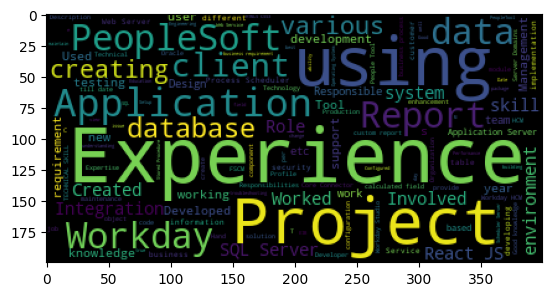

In [91]:
#WORDCLOUD
from wordcloud import WordCloud,STOPWORDS
stop=STOPWORDS
wc=WordCloud(background_color='black',stopwords=stop).generate(para)
plt.imshow(wc)

In [92]:
#part of speech tagging NER
from spacy import displacy

nlp =spacy.load('en_core_web_sm')
nlp.pipe_names


OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
nlp = spacy.load('en_core_web_sm') # English pipeline optimized for CPU. Components: tok2vec, tagger, parser, senter, ner, attribute_ruler, lemmatizer.
one_block = para[0:]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [ ]:
one_block

In [93]:
for token in doc_block[0:52]:
    print(token, token.pos_)

NameError: name 'doc_block' is not defined

In [94]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[0:52])

NameError: name 'doc_block' is not defined

In [95]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(nouns_verbs)
sum_words=x.sum(axis=0)
words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1], reverse=True)
wf_df=pd.DataFrame(words_freq)
wf_df.columns=['word','count']
wf_df[0:]

NameError: name 'nouns_verbs' is not defined

In [96]:
wf_df[0:52].plot.bar(x='word',figsize=(20,8),title='Word Count')

NameError: name 'wf_df' is not defined

In [ ]:
#df['Category'].value_counts().sort_index().plot(kind='bar',figsize=(12,8))

In [ ]:
# #pie chart
# from matplotlib.gridspec import GridSpec
# targetCounts=df['Category'].value_counts()
# targetLables=df['Category'].unique()
# plt.figure(1,figsize=(20,20))
# the_grid=GridSpec(2,2)
# cmap=plt.get_cmap('coolwarm')
# colors=[cmap(i) for i in np.linspace(0,1,6)]
# plt.subplot(the_grid[0,1],aspect=1,title="Category Distribution")
# pie=plt.pie(targetCounts,labels=targetLables,autopct='%1.1f%%',shadow=True,colors=colors) #autopct() adds and give % to chart
# plt.show()


# Working

In [97]:
import nltk # Natural Language Toolkit
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import matplotlib.pyplot as plt
import re # Regular Expression
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



# Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanjy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sanjy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sanjy\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [98]:
df=pd.read_csv('D:\exclerintsp2\Resume_clf\Resume (1).csv')
df

,Raw,Category
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft
1,Classification: Internal\n\nClassification: In...,PeopleSoft
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft
4,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft
5,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft
6,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft
7,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft
8,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft
9,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft


In [99]:
df['Category'].value_counts()


React         20
SQL           11
workday r     11
PeopleSoft    10
Name: Category, dtype: int64

<AxesSubplot: xlabel='count', ylabel='Category'>

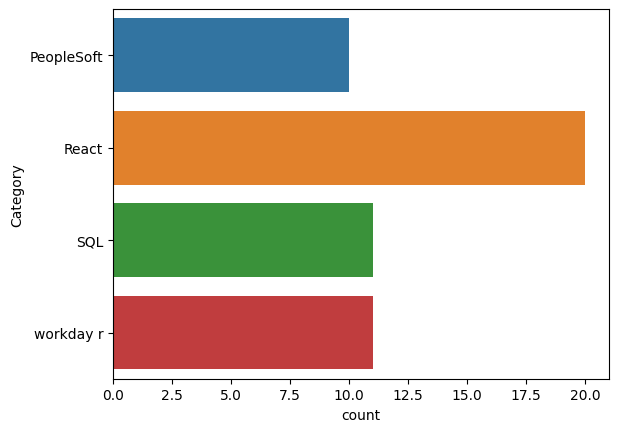

In [100]:
sns.countplot(data=df,y='Category') #how many times category is occuring

In [101]:
df['label']=df['Category'].map({'React':0,'SQL':1,'PeopleSoft':2,'workday r':3})

In [102]:
df

,Raw,Category,label
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,2
1,Classification: Internal\n\nClassification: In...,PeopleSoft,2
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft,2
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft,2
4,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft,2
5,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft,2
6,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft,2
7,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft,2
8,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft,2
9,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft,2


In [103]:
React=df[df['label']==0]
SQL=df[df['label']==1]
PeopleSoft=df[df['label']==2]
workday_r=df[df['label']==3]

In [104]:
SQL

,Raw,Category,label
30,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL,1
31,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL,1
32,BUDDHA VAMSI ...,SQL,1
33,KAMBALLA PRADEEP ...,SQL,1
34,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL,1
35,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL,1
36,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL,1
37,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL,1
38,resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...,SQL,1
39,Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...,SQL,1


In [105]:
React

,Raw,Category,label
10,Name: Ravali P \n\n\n\n ...,React,0
11,SUSOVAN BAG \n\nSeeking a challenging po...,React,0
12,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React,0
13,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React,0
14,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React,0
15,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React,0
16,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React,0
17,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React,0
18,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React,0
19,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React,0


In [106]:
PeopleSoft

,Raw,Category,label
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,2
1,Classification: Internal\n\nClassification: In...,PeopleSoft,2
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft,2
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft,2
4,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft,2
5,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft,2
6,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft,2
7,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft,2
8,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft,2
9,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft,2


In [107]:
workday_r

,Raw,Category,label
41,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,workday r,3
42,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,workday r,3
43,G Himaja\n\n ...,workday r,3
44,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,workday r,3
45,Mooraboyina Guravaiah\n\nWorkday Integration S...,workday r,3
46,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...,workday r,3
47,Workday HCM Techno functional Consultant ...,workday r,3
48,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,workday r,3
49,Srikanth (WORKDAY hCM Consultant)\t ...,workday r,3
50,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday r,3


array([[<AxesSubplot: title={'center': 'PeopleSoft'}>,
        <AxesSubplot: title={'center': 'React'}>],
       [<AxesSubplot: title={'center': 'SQL'}>,
        <AxesSubplot: title={'center': 'workday r'}>]], dtype=object)

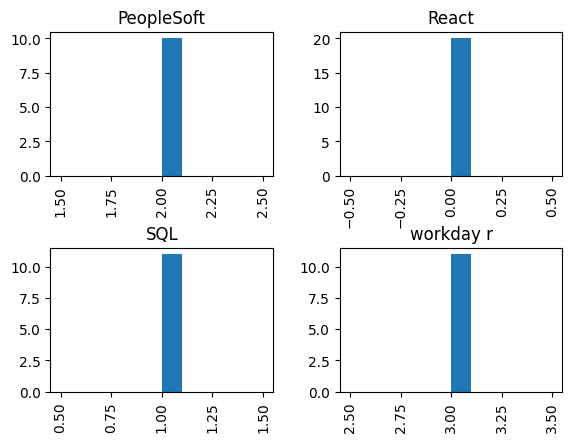

In [108]:
df.hist(column='label',by='Category')

In [109]:
def wrdcld(data,title):
  txt=' '.join(data['Raw'])
  txt=txt.lower()
  stop=STOPWORDS

  wc=WordCloud(background_color='black',stopwords=stop).generate(txt)

  plt.imshow(wc)
  plt.axis('off')
  plt.title('TITLE')
  plt.show()

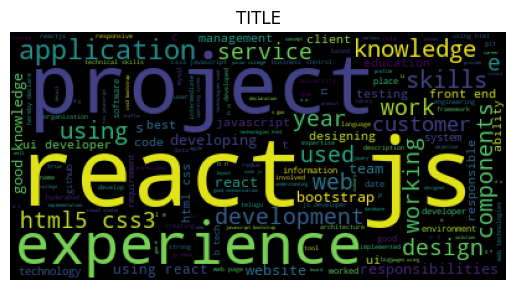

In [110]:
wrdcld(React,'React')

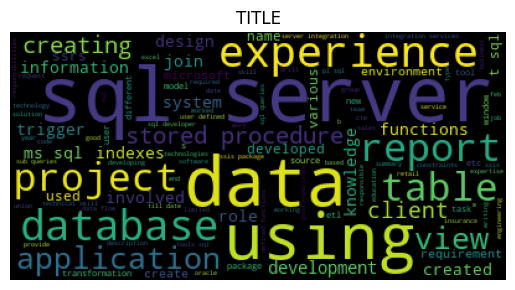

In [111]:
wrdcld(SQL,'SQL')

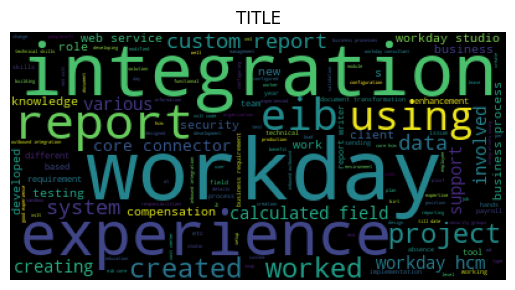

In [112]:
wrdcld(workday_r,'workday r')

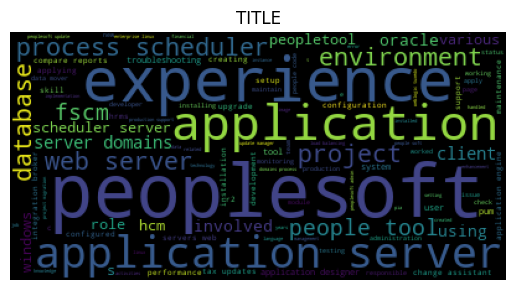

In [113]:
wrdcld(PeopleSoft,'PeopleSoft')

In [114]:
lemma=WordNetLemmatizer()


In [115]:
corpus1=[]
for i in range(len(df)):
  msg=re.sub('[^a-zA-Z]',' ',df['Raw'][i])
  msg=msg.lower()
  msg=msg.split()

  #list comprehension
  msg=[lemma.lemmatize(i) for i in msg if not i in stopwords.words('english')]

  msg=' '.join(msg)
  corpus1.append(msg)

In [116]:
corpus1

['anubhav kumar singh core competency scripting shell scripting application peoplesoft hcm financials operating system linux window web app server weblogic tuxedo rdbms oracle repository github core competency scripting shell scripting application peoplesoft hcm financials operating system linux window web app server weblogic tuxedo rdbms oracle repository github work globally competitive environment challenging assignment shall yield twin benefit job satisfaction steady paced professional growth professional experience current hcl current role system admin offshore skill shell scripting linux peoplesoft administration github managing peoplesoft hcm peoplesoft fscm production environment along support environment installed linux window o involved day day activity project migration database refresh system admin change tax update etc troubleshooting various server like application server web server process scheduler server applying tuxedo weblogic middleware cpu patch various application

In [117]:
cv=CountVectorizer()
x=cv.fit_transform(corpus1)
x=pd.DataFrame(x.toarray(),columns=cv.get_feature_names_out())
x

,abdul,ability,able,absence,abstract,abstraction,ac,academic,accept,acceptable,...,yagvalkya,year,yes,yield,yii,yogi,yonder,zero,zerozilla,zp
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,3,...,0,2,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
8,0,1,0,0,0,0,0,3,0,0,...,0,1,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [118]:
y=df['label']
y

0     2
1     2
2     2
3     2
4     2
5     2
6     2
7     2
8     2
9     2
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    3
42    3
43    3
44    3
45    3
46    3
47    3
48    3
49    3
50    3
51    3
Name: label, dtype: int64

In [119]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=45)

In [120]:
x_train

,abdul,ability,able,absence,abstract,abstraction,ac,academic,accept,acceptable,...,yagvalkya,year,yes,yield,yii,yogi,yonder,zero,zerozilla,zp
25,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
38,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
51,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
27,0,0,0,0,0,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0
36,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
33,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
43,0,1,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
26,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,2,0,0,0,0,0


In [121]:
x_test

,abdul,ability,able,absence,abstract,abstraction,ac,academic,accept,acceptable,...,yagvalkya,year,yes,yield,yii,yogi,yonder,zero,zerozilla,zp
16,0,2,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
49,0,1,0,7,0,0,0,0,1,0,...,0,3,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
39,0,2,0,0,2,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0
29,3,4,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [122]:
y_train

25    0
38    1
51    3
27    0
36    1
6     2
33    1
43    3
26    0
22    0
48    3
10    0
47    3
45    3
50    3
41    3
44    3
17    0
37    1
24    0
34    1
12    0
40    1
23    0
8     2
14    0
1     2
15    0
4     2
35    1
21    0
31    1
32    1
3     2
30    1
11    0
Name: label, dtype: int64

In [123]:
y_test

16    0
5     2
2     2
49    3
7     2
20    0
9     2
39    1
29    0
0     2
46    3
19    0
28    0
18    0
13    0
42    3
Name: label, dtype: int64

In [124]:
nb=MultinomialNB()
nb.fit(x_train,y_train)
ypred=nb.predict(x_test)
print(classification_report(y_test,ypred))
print(nb.score(x_train,y_train))
print(nb.score(x_test,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.50      1.00      0.67         1
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         3

    accuracy                           0.94        16
   macro avg       0.88      0.95      0.89        16
weighted avg       0.97      0.94      0.94        16

1.0
0.9375


In [125]:
#svm

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [126]:
clf = SVC(kernel='rbf',gamma=0.0001)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred)*100
print("Accuracy= ",acc)
cm=confusion_matrix(y_test,y_pred)
cm

Accuracy=  75.0


array([[7, 0, 0, 0],
       [0, 1, 0, 0],
       [4, 0, 1, 0],
       [0, 0, 0, 3]], dtype=int64)

In [127]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78         7
           1       1.00      1.00      1.00         1
           2       1.00      0.20      0.33         5
           3       1.00      1.00      1.00         3

    accuracy                           0.75        16
   macro avg       0.91      0.80      0.78        16
weighted avg       0.84      0.75      0.69        16



Text(50.722222222222214, 0.5, 'original')

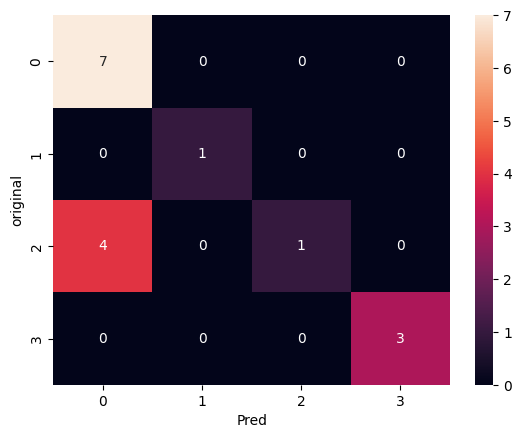

In [128]:
sns.heatmap(cm,annot=True)
plt.xlabel('Pred')
plt.ylabel('original')

In [129]:
import pickle

In [130]:
pickle.dump(clf,open('clf.pkl','wb'))